In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, LabelEncoder, PowerTransformer
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score, pairwise_distances
from sklearn.metrics.pairwise import euclidean_distances
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
from gower import gower_matrix

In [2]:
df=pd.read_csv(r"C:\Users\akshaya_gv\Desktop\Capstone\bank+marketing\bank\bank-full.csv",sep=';')
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [3]:
df.shape

(45211, 17)

In [4]:
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [5]:
df.tail()

age           job   marital  education default  balance housing loan  \
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no

In [6]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
df.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [8]:
df.describe(include=object)

job  marital  education default housing   loan   contact  \
count         45211    45211      45211   45211   45211  45211     45211   
unique           12        3          4       2       2      2         3   
top     blue-collar  married  secondary      no     yes     no  cellular   
freq           9732    27214      23202   44396   25130  37967     29285   

        month poutcome      y  
count   45211    45211  45211  
unique     12        4      2  
top       may  unknown     no  
freq    13766    36959  39922

In [9]:
df.job.replace({'unknown':'student'},inplace=True)
df.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student          1226
Name: job, dtype: int64

In [10]:
for i in df.job.unique():
    mode=list(df[df['job']==i].education.mode())
    df['education']=df.apply(lambda x:mode[0] if x.education=='unknown' and x.job==i else x.education, axis=1)

In [11]:
df.drop(['poutcome','contact'],axis=1,inplace=True)

In [12]:
df1=df.drop('y',axis=1)

In [13]:
sc=StandardScaler()
for i in df1.select_dtypes(np.number).columns:
    df1[i]=sc.fit_transform(df1[[i]])

In [14]:
df1.head()

age           job  marital  education default   balance housing loan  \
0  1.606965    management  married   tertiary      no  0.256419     yes   no   
1  0.288529    technician   single  secondary      no -0.437895     yes   no   
2 -0.747384  entrepreneur  married  secondary      no -0.446762     yes  yes   
3  0.571051   blue-collar  married  secondary      no  0.047205     yes   no   
4 -0.747384       student   single  secondary      no -0.447091      no   no   

        day month  duration  campaign     pdays  previous  
0 -1.298476   may  0.011016 -0.569351 -0.411453  -0.25194  
1 -1.298476   may -0.416127 -0.569351 -0.411453  -0.25194  
2 -1.298476   may -0.707361 -0.569351 -0.411453  -0.25194  
3 -1.298476   may -0.645231 -0.569351 -0.411453  -0.25194  
4 -1.298476   may -0.233620 -0.569351 -0.411453  -0.25194

In [15]:
n=df1.select_dtypes(np.number)
n

age   balance       day  duration  campaign     pdays  previous
0      1.606965  0.256419 -1.298476  0.011016 -0.569351 -0.411453 -0.251940
1      0.288529 -0.437895 -1.298476 -0.416127 -0.569351 -0.411453 -0.251940
2     -0.747384 -0.446762 -1.298476 -0.707361 -0.569351 -0.411453 -0.251940
3      0.571051  0.047205 -1.298476 -0.645231 -0.569351 -0.411453 -0.251940
4     -0.747384 -0.447091 -1.298476 -0.233620 -0.569351 -0.411453 -0.251940
...         ...       ...       ...       ...       ...       ...       ...
45206  0.947747 -0.176460  0.143418  2.791329  0.076230 -0.411453 -0.251940
45207  2.831227  0.120447  0.143418  0.768224 -0.246560 -0.411453 -0.251940
45208  2.925401  1.429593  0.143418  3.373797  0.721811  1.436189  1.050473
45209  1.512791 -0.228024  0.143418  0.970146  0.399020 -0.411453 -0.251940
45210 -0.370689  0.528364  0.143418  0.399328 -0.246560  1.476138  4.523577

[45211 rows x 7 columns]

## Clustering based on Age and Balance

In [16]:
wcss_ab=[]
sil_score_ab=[]
for i in range(2,20):
    kmeans=KMeans(n_clusters=i,random_state=1)
    kmeans.fit(n[['age','balance']])
    wcss_ab.append(kmeans.inertia_)
    sil_score_ab.append(silhouette_score(n[['age','balance']],kmeans.labels_))
    
n_ab=pd.DataFrame({'num':[i for i in range(2,20)], 'sil': sil_score_ab})
n_ab

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\akshaya_gv\Anacondas\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\akshaya_gv\AppData\Local\Temp\ipykernel_27660\1865429650.py", line 7, in <module>
    sil_score_ab.append(silhouette_score(n[['age','balance']],kmeans.labels_))
  File "C:\Users\akshaya_gv\Anacondas\lib\site-packages\sklearn\metrics\cluster\_unsupervised.py", line 117, in silhouette_score
    return np.mean(silhouette_samples(X, labels, metric=metric, **kwds))
  File "C:\Users\akshaya_gv\Anacondas\lib\site-packages\sklearn\metrics\cluster\_unsupervised.py", line 233, in silhouette_samples
    results = zip(*pairwise_distances_chunked(X, reduce_func=reduce_func, **kwds))
  File "C:\Users\akshaya_gv\Anacondas\lib\site-packages\sklearn\metrics\pairwise.py", line 1717, in pairwise_distances_chunked
    D_chunk = pairwise_distances(X_chunk, Y, metric=metric, n_jobs=n_jobs, *

TypeError: object of type 'NoneType' has no len()

In [ ]:
n_ab.sort_values(by='sil',ascending=False).head(1)

In [17]:
kmeans_ab_opt=KMeans(n_clusters=4,random_state=1)
kmeans_ab_opt.fit(n[['age','balance']])
df['kmean_ab']=kmeans_ab_opt.labels_
silhouette_score(n[['age','balance']],kmeans_ab_opt.labels_)

0.5224483284538749

In [ ]:
plt.figure(figsize=(50,50))
plt.style.use('ggplot')
z=linkage(n[['age','balance']],method='ward')
dendrogram(z)
plt.show()

## Clustering based on Duration and Campaign

In [ ]:
wcss_dc=[]
sil_score_dc=[]
for i in range(2,20):
    kmeans=KMeans(n_clusters=i,random_state=1)
    kmeans.fit(n[['duration','campaign']])
    wcss_dc.append(kmeans.inertia_)
    sil_score_dc.append(silhouette_score(n[['duration','campaign']],kmeans.labels_))
    
n_dc=pd.DataFrame({'num':[i for i in range(2,20)], 'sil': sil_score_dc})
n_dc

In [ ]:
n_dc.sort_values(by='sil',ascending=False).head(1)

In [19]:
kmeans_dc_opt=KMeans(n_clusters=3,random_state=1)
kmeans_dc_opt.fit(n[['duration','campaign']])
df['kmean_dc']=kmeans_dc_opt.labels_
silhouette_score(n[['duration','campaign']],kmeans_dc_opt.labels_)

0.612272234150118

In [ ]:
plt.figure(figsize=(50,50))
plt.style.use('ggplot')
z=linkage(n[['duration','campaign']],method='ward')
dendrogram(z)
plt.show()

## Clustering based on previous and pdays

In [ ]:
wcss_pp=[]
sil_score_pp=[]
for i in range(2,20):
    kmeans=KMeans(n_clusters=i,random_state=1)
    kmeans.fit(n[['pdays','previous']])
    wcss_pp.append(kmeans.inertia_)
    sil_score_pp.append(silhouette_score(n[['pdays','previous']],kmeans.labels_))
    
n_pp=pd.DataFrame({'num':[i for i in range(2,20)], 'sil': sil_score_pp})
n_pp

In [ ]:
n_pp.sort_values(by='sil',ascending=False).head(1) #19 cluster

## KMeans Clustering on all scaled numbers

In [19]:
wcss_full=[]
sil_score_full=[]
for i in range(2,20):
    kmeans=KMeans(n_clusters=i,random_state=1)
    kmeans.fit(n)
    wcss_full.append(kmeans.inertia_)
    sil_score_full.append(silhouette_score(n,kmeans.labels_))
    
n_full=pd.DataFrame({'num':[i for i in range(2,20)], 'sil': sil_score_full})
n_full

num       sil
0     2  0.334734
1     3  0.187660
2     4  0.198204
3     5  0.210884
4     6  0.224240
5     7  0.224672
6     8  0.225237
7     9  0.233725
8    10  0.218967
9    11  0.222942
10   12  0.225839
11   13  0.221373
12   14  0.221141
13   15  0.222521
14   16  0.191355
15   17  0.196149
16   18  0.196412
17   19  0.198249

In [21]:
n_full.sort_values(by='sil',ascending=False).head(1)

num       sil
0    2  0.334734

In [20]:
kmean_full_opt=KMeans(n_clusters=2,random_state=1)
kmean_full_opt.fit(n)
df['kmean_full']=kmean_full_opt.labels_
silhouette_score(n,kmean_full_opt.labels_)

0.3347341595877947

## Creating PCA and performing clustering using KMeans

In [21]:
cov_m=np.cov(np.transpose(n))

In [22]:
eig_val,eig_vec=np.linalg.eig(cov_m)

In [23]:
eig_vec.dot(np.transpose(n))

array([[-0.186191  ,  0.16362551,  0.38837083, ..., -2.08469686,
        -0.89379197,  2.59461957],
       [-0.11361761,  0.15400783,  0.32639253, ..., -2.69482512,
        -0.42207971, -3.21487719],
       [ 0.21200425,  0.65234628,  0.9708434 , ..., -1.93892906,
        -0.14310314, -1.09512422],
       ...,
       [-0.03285631,  0.41051379,  0.71190306, ..., -0.11541446,
        -0.85513952,  1.5505225 ],
       [ 1.13889785,  0.75950873,  0.07850512, ...,  0.86689758,
         1.15684317, -0.63488791],
       [ 1.4995064 ,  0.20772838, -0.43798603, ...,  2.7041625 ,
         0.71023697,  0.33468172]])

In [25]:
len(n.columns)

7

In [26]:
pc=pd.DataFrame(eig_vec.dot(np.transpose(n)).T,columns=['PC'+str(i) for i in range(7)])
pc

PC0       PC1       PC2       PC3       PC4       PC5       PC6
0     -0.186191 -0.113618  0.212004 -1.118914 -0.032856  1.138898  1.499506
1      0.163626  0.154008  0.652346 -1.194386  0.410514  0.759509  0.207728
2      0.388371  0.326393  0.970843 -1.263648  0.711903  0.078505 -0.437986
3      0.298407  0.314546  0.585204 -1.194050  0.329875  0.605820  0.745371
4      0.060526 -0.002123  0.910435 -1.250598  0.652371  0.071970 -0.478224
...         ...       ...       ...       ...       ...       ...       ...
45206 -2.065581 -1.750152 -0.377462  0.102834 -0.983921  0.700768  0.195300
45207 -0.639825 -0.345440 -0.795649 -0.110501 -1.272547  1.759268  1.745358
45208 -2.084697 -2.694825 -1.938929  1.499035 -0.115414  0.866898  2.704162
45209 -0.893792 -0.422080 -0.143103  0.350413 -0.855140  1.156843  0.710237
45210  2.594620 -3.214877 -1.095124  1.453661  1.550522 -0.634888  0.334682

[45211 rows x 7 columns]

In [27]:
eig_val

array([1.50932686, 0.54013221, 1.15503984, 1.09704035, 0.97500185,
       0.82617914, 0.89743459])

In [29]:
pc.iloc[:,[0,2,3]].var() #kaiser criterion

PC0    0.896101
PC2    0.907614
PC3    1.092278
dtype: float64

In [30]:
eigval=eig_val.tolist() # Scree plot
eigval.sort(reverse=True)

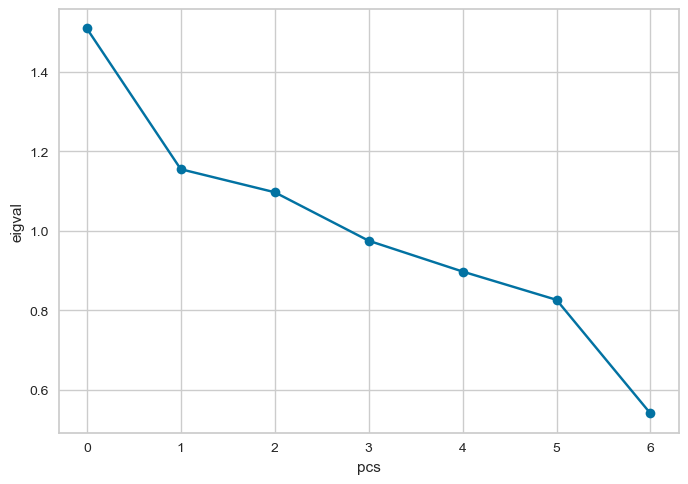

In [31]:
plt.plot(eigval,marker='o')
plt.xlabel('pcs')
plt.ylabel('eigval')
plt.show()

In [32]:
exv=[]
for i in eigval:
    exv.append((i/sum(eigval))*100)
    
np.cumsum(exv)

array([ 21.56133543,  38.06153963,  53.73319796,  67.66148771,
        80.48169823,  92.28399627, 100.        ])

In [33]:
pca=PCA(n_components=5)
pca_df=pd.DataFrame(pca.fit_transform(n),columns=['PCA'+str(i) for i in range(5)])

In [34]:
wcss_pca=[]
sil_score_pca=[]
for i in range(2,20):
    kmeans=KMeans(n_clusters=i,random_state=1)
    kmeans.fit(pca_df)
    wcss_pca.append(kmeans.inertia_)
    sil_score_pca.append(silhouette_score(pca_df,kmeans.labels_))
    
n_pca=pd.DataFrame({'num':[i for i in range(2,20)], 'sil': sil_score_pca})
n_pca

num       sil
0     2  0.348758
1     3  0.235655
2     4  0.250590
3     5  0.248574
4     6  0.258103
5     7  0.241484
6     8  0.242490
7     9  0.248008
8    10  0.240339
9    11  0.237954
10   12  0.237790
11   13  0.240304
12   14  0.219295
13   15  0.213404
14   16  0.221522
15   17  0.215412
16   18  0.203329
17   19  0.197373

In [35]:
n_pca.sort_values(by='sil',ascending=False).head(1)

num       sil
0    2  0.348758

PCA results in 2 clusters same as full kmean

In [45]:
kmean_pca_opt=KMeans(n_clusters=2,random_state=1)
kmean_pca_opt.fit(pca_df)
df['kmean_pca']=kmean_pca_opt.labels_

In [36]:
df.head()

age           job  marital  education default  balance housing loan  day  \
0   58    management  married   tertiary      no     2143     yes   no    5   
1   44    technician   single  secondary      no       29     yes   no    5   
2   33  entrepreneur  married  secondary      no        2     yes  yes    5   
3   47   blue-collar  married  secondary      no     1506     yes   no    5   
4   33       student   single  secondary      no        1      no   no    5   

  month  duration  campaign  pdays  previous   y  kmean_ab  kmean_dc  \
0   may       261         1     -1         0  no         0         0   
1   may       151         1     -1         0  no         0         0   
2   may        76         1     -1         0  no         1         0   
3   may        92         1     -1         0  no         0         0   
4   may       198         1     -1         0  no         1         0   

   kmean_full  
0           0  
1           0  
2           0  
3           0  
4           0

In [38]:
df1.select_dtypes(object).columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'month'], dtype='object')

## KModes for default, housing, loan

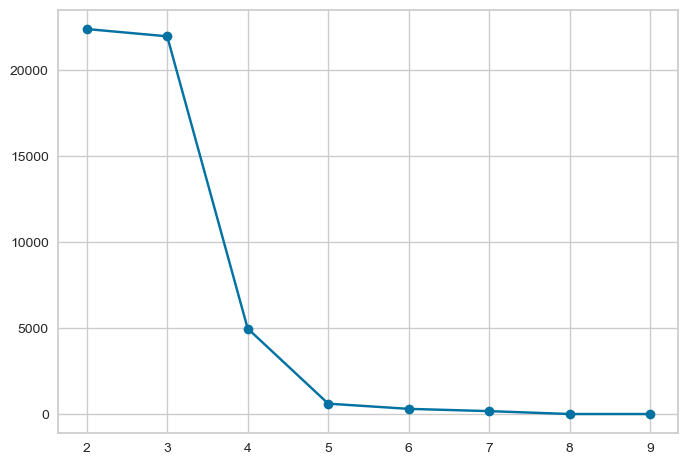

In [40]:
cat=df1.select_dtypes(object)
co=[]
for i in range(2,10):
    kmode=KModes(n_clusters=i,random_state=1)
    kmode.fit_predict(cat[['default','housing','loan']])
    co.append(kmode.cost_)

plt.plot(range(2,10),co,marker='o')

plt.show()

In [16]:
cat=df1.select_dtypes(object)
kmode_opt=KModes(n_clusters=4,random_state=1)
kmode_opt.fit_predict(cat[['default','housing','loan']])
df['kmode_opt']=kmode_opt.labels_

In [19]:
gower_dist_matrix = gower_matrix(cat)
gower_dist_matrix

array([[0.        , 0.42857143, 0.42857143, ..., 0.5714286 , 0.5714286 ,
        0.5714286 ],
       [0.42857143, 0.        , 0.42857143, ..., 0.5714286 , 0.5714286 ,
        0.5714286 ],
       [0.42857143, 0.42857143, 0.        , ..., 0.5714286 , 0.5714286 ,
        0.42857143],
       ...,
       [0.5714286 , 0.5714286 , 0.5714286 , ..., 0.        , 0.14285715,
        0.14285715],
       [0.5714286 , 0.5714286 , 0.5714286 , ..., 0.14285715, 0.        ,
        0.14285715],
       [0.5714286 , 0.5714286 , 0.42857143, ..., 0.14285715, 0.14285715,
        0.        ]], dtype=float32)

In [20]:
silhouette_score(gower_dist_matrix,kmode_opt.labels_)

0.21880722

In [16]:
df2=pd.read_csv(r"C:\Users\akshaya_gv\Desktop\Capstone\bank+marketing\bank\bank-full.csv",sep=';')
df2.job.replace({'unknown':'student'},inplace=True)
for i in df2.job.unique():
    mode=list(df2[df2['job']==i].education.mode())
    df2['education']=df2.apply(lambda x:mode[0] if x.education=='unknown' and x.job==i else x.education, axis=1)
df2.drop(['poutcome','contact'],axis=1,inplace=True)
kprot_data=df2.drop('y',axis=1)
for i in df2.select_dtypes(exclude='object').columns:
    pt = PowerTransformer()
    kprot_data[i] =  pt.fit_transform(np.array(kprot_data[i]).reshape(-1, 1))

In [54]:
kprot_data

age           job   marital  education default   balance housing  \
0      1.473637    management   married   tertiary      no  0.414773     yes   
1      0.429379    technician    single  secondary      no -0.410774     yes   
2     -0.709873  entrepreneur   married  secondary      no -0.431122     yes   
3      0.683128   blue-collar   married  secondary      no  0.197685     yes   
4     -0.709873       student    single  secondary      no -0.432119      no   
...         ...           ...       ...        ...     ...       ...     ...   
45206  0.993503    technician   married   tertiary      no -0.052398      no   
45207  2.207438       retired  divorced    primary      no  0.275122      no   
45208  2.257237       retired   married  secondary      no  1.495765      no   
45209  1.409327   blue-collar   married  secondary      no -0.114235      no   
45210 -0.250469  entrepreneur   married  secondary      no  0.681838      no   

      loan       day month  duration  campaign     pdays  previous  
0       no -1.351873   may  0.386077 -1.108191 -0.472533 -0.472500  
1       no -1.351873   may -0.223033 -1.108191 -0.472533 -0.472500  
2      yes -1.351873   may -0.923854 -1.108191 -0.472533 -0.472500  
3       no -1.351873   may -0.735678 -1.108191 -0.472533 -0.472500  
4       no -1.351873   may  0.072812 -1.108191 -0.472533 -0.472500  
...    ...       ...   ...       ...       ...       ...       ...  
45206   no  0.220403   nov  2.057767  0.737650 -0.472533 -0.472500  
45207   no  0.220403   nov  1.056254  0.134537 -0.472533 -0.472500  
45208   no  0.220403   nov  2.257271  1.323745  2.122381  2.166630  
45209   no  0.220403   nov  1.191963  1.091724 -0.472533 -0.472500  
45210   no  0.220403   nov  0.769421  0.134537  2.123051  2.175519  

[45211 rows x 14 columns]

In [55]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   day        45211 non-null  int64 
 9   month      45211 non-null  object
 10  duration   45211 non-null  int64 
 11  campaign   45211 non-null  int64 
 12  pdays      45211 non-null  int64 
 13  previous   45211 non-null  int64 
 14  y          45211 non-null  object
dtypes: int64(7), object(8)
memory usage: 5.2+ MB


In [58]:
costs = []

for i in range(2, 10):
    kproto = KPrototypes(n_clusters= i, init='Cao', verbose=2)
    clusters = kproto.fit_predict(kprot_data, categorical=[1,2,3,4,6,7,9])
    costs.append(kproto.cost_)

        


Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 5172, ncost: 352931.94865713094
Run: 1, iteration: 2/100, moves: 6898, ncost: 339835.37736830866
Run: 1, iteration: 3/100, moves: 6353, ncost: 313666.30295469397
Run: 1, iteration: 4/100, moves: 4671, ncost: 291755.7787909058
Run: 1, iteration: 5/100, moves: 18, ncost: 291750.806469365
Run: 1, iteration: 6/100, moves: 0, ncost: 291750.806469365
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 13774, ncost: 300233.1083582302
Run: 2, iteration: 2/100, moves: 2641, ncost: 291753.80430580303
Run: 2, iteration: 3/100, moves: 13, ncost: 291750.8064693645
Run: 2, iteration: 4/100, moves: 0, ncost: 291750.8064693645
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 5807, ncost: 33947

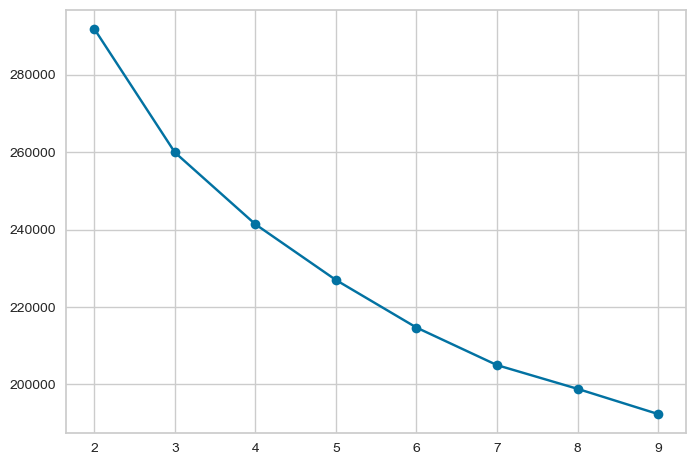

In [59]:
plt.plot(range(2,10),costs,marker='o')
plt.show() # optimal is 4

In [60]:
kproto = KPrototypes(n_clusters= 4, init='Cao', verbose=2)
kproto.fit_predict(kprot_data, categorical=[1,2,3,4,6,7,9])
df['kproto_full']=kproto.labels_

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 8383, ncost: 248993.52881955585
Run: 1, iteration: 2/100, moves: 4984, ncost: 245264.5332508608
Run: 1, iteration: 3/100, moves: 2086, ncost: 244644.50831303245
Run: 1, iteration: 4/100, moves: 860, ncost: 244518.3222018725
Run: 1, iteration: 5/100, moves: 403, ncost: 244486.5162860539
Run: 1, iteration: 6/100, moves: 221, ncost: 244475.16624537195
Run: 1, iteration: 7/100, moves: 124, ncost: 244472.28480199305
Run: 1, iteration: 8/100, moves: 78, ncost: 244470.8931767442
Run: 1, iteration: 9/100, moves: 61, ncost: 244469.73384326082
Run: 1, iteration: 10/100, moves: 30, ncost: 244469.23686925526
Run: 1, iteration: 11/100, moves: 17, ncost: 244469.11694350792
Run: 1, iteration: 12/100, moves: 12, ncost: 244469.04358480326
Run: 1, iteration: 13/100, moves: 3, ncost: 244469.03068679397
Run: 1, iteratio

In [ ]:
gower_dist_matrix_kpro = gower_matrix(kprot_data)
gower_dist_matrix_kpro

In [18]:
silhouette_score()

ValueError: could not convert string to float: 'management'

In [61]:
filename="labeled.xlsx"
df.to_excel(filename)
print('Excel created successfully')

Excel created successfully


In [18]:
df_lab=pd.read_excel("labeled.xlsx",index_col=[0])
df_lab.head()

age           job  marital  education default  balance housing loan  day  \
0   58    management  married   tertiary      no     2143     yes   no    5   
1   44    technician   single  secondary      no       29     yes   no    5   
2   33  entrepreneur  married  secondary      no        2     yes  yes    5   
3   47   blue-collar  married  secondary      no     1506     yes   no    5   
4   33       student   single  secondary      no        1      no   no    5   

  month  ...  campaign  pdays  previous   y kmean_ab  kmean_dc  kmean_full  \
0   may  ...         1     -1         0  no        0         0           0   
1   may  ...         1     -1         0  no        0         0           0   
2   may  ...         1     -1         0  no        1         0           0   
3   may  ...         1     -1         0  no        0         0           0   
4   may  ...         1     -1         0  no        1         0           0   

   kmode_opt  kmean_pca  kproto_full  
0          0          0            2  
1          0          0            2  
2          0          0            2  
3          0          0            2  
4          3          0            1  

[5 rows x 21 columns]

In [5]:
df_lab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          45211 non-null  object
 2   marital      45211 non-null  object
 3   education    45211 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   day          45211 non-null  int64 
 9   month        45211 non-null  object
 10  duration     45211 non-null  int64 
 11  campaign     45211 non-null  int64 
 12  pdays        45211 non-null  int64 
 13  previous     45211 non-null  int64 
 14  y            45211 non-null  object
 15  kmean_ab     45211 non-null  int64 
 16  kmean_dc     45211 non-null  int64 
 17  kmean_full   45211 non-null  int64 
 18  kmode_opt    45211 non-null  int64 
 19  kmean_pca    45211 non-nu

In [6]:
df_lab['kmean_ab'].unique()

array([0, 1, 2, 3], dtype=int64)

In [7]:
df_lab['kmean_dc'].unique()

array([0, 2, 1], dtype=int64)

In [8]:
df_lab['kmean_full'].unique()

array([0, 1], dtype=int64)

In [9]:
df_lab['kmean_pca'].unique()

array([0, 1], dtype=int64)

In [10]:
df_lab['kmode_opt'].unique()

array([0, 3, 1, 2], dtype=int64)

In [11]:
df_lab['kproto_full'].unique()

array([2, 1, 3, 0], dtype=int64)

In [12]:
df_lab[df_lab['kmean_ab']==0].describe()

age       balance           day      duration      campaign  \
count  15599.000000  15599.000000  15599.000000  15599.000000  15599.000000   
mean      52.422976    930.614719     15.794089    252.257581      2.791012   
std        6.961626   1223.477575      8.352207    257.060452      2.913691   
min       43.000000  -6847.000000      1.000000      0.000000      1.000000   
25%       47.000000     74.000000      8.000000    100.000000      1.000000   
50%       51.000000    473.000000     16.000000    173.000000      2.000000   
75%       56.000000   1399.500000     21.000000    307.000000      3.000000   
max       95.000000   8304.000000     31.000000   3881.000000     44.000000   

              pdays      previous  kmean_ab      kmean_dc    kmean_full  \
count  15599.000000  15599.000000   15599.0  15599.000000  15599.000000   
mean      35.192961      0.539650       0.0      0.273479      0.141483   
std       92.556761      1.824089       0.0      0.650945      0.348531   
min       -1.000000      0.000000       0.0      0.000000      0.000000   
25%       -1.000000      0.000000       0.0      0.000000      0.000000   
50%       -1.000000      0.000000       0.0      0.000000      0.000000   
75%       -1.000000      0.000000       0.0      0.000000      0.000000   
max      871.000000     58.000000       0.0      2.000000      1.000000   

          kmode_opt     kmean_pca   kproto_full  
count  15599.000000  15599.000000  15599.000000  
mean       1.464966      0.140201      1.986153  
std        1.437072      0.347207      1.007887  
min        0.000000      0.000000      0.000000  
25%        0.000000      0.000000      2.000000  
50%        1.000000      0.000000      2.000000  
75%        3.000000      0.000000      3.000000  
max        3.000000      1.000000      3.000000

In [13]:
df_lab[df_lab['kmean_ab']==0].describe(include=object)

job  marital  education default housing   loan  month      y
count         15599    15599      15599   15599   15599  15599  15599  15599
unique           11        3          3       2       2      2     12      2
top     blue-collar  married  secondary      no      no     no    may     no
freq           3227    11588       8111   15329    8545  12932   3862  13765

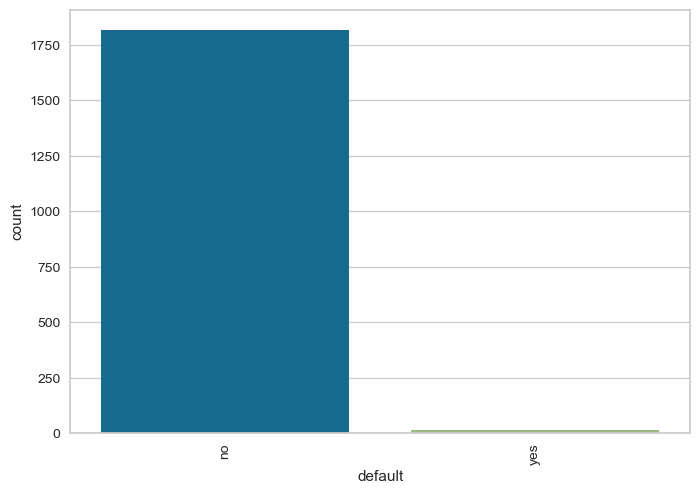

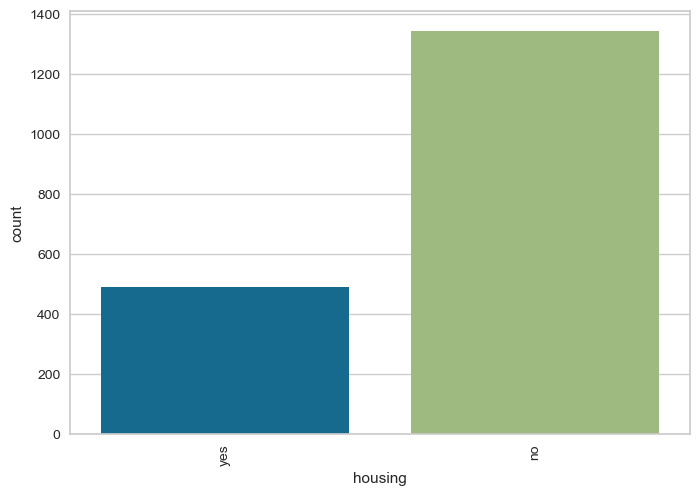

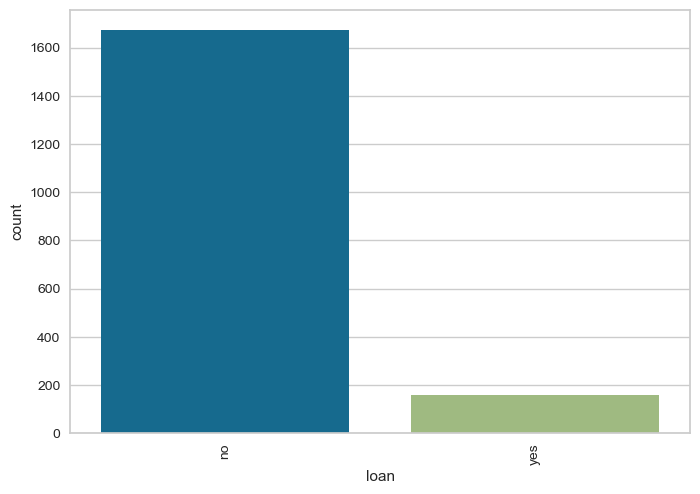

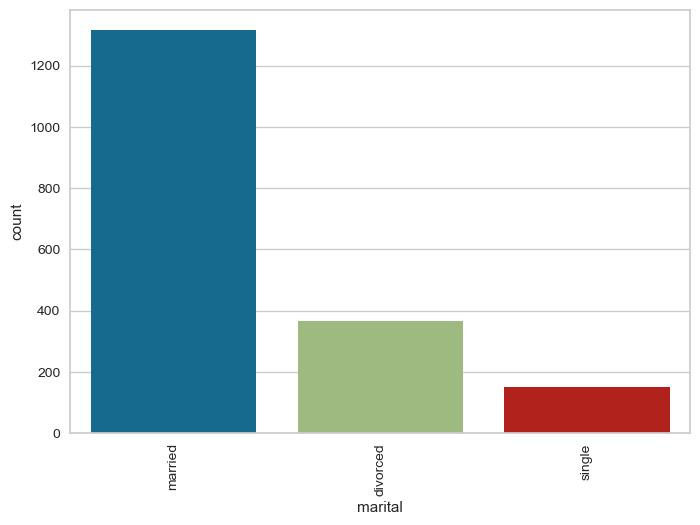

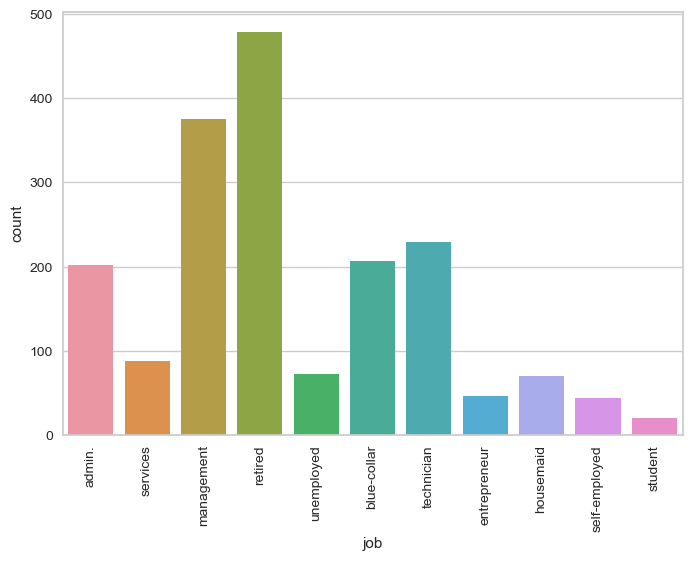

In [14]:
s=df_lab[(df_lab['kmean_ab']==0)&(df_lab['y']=='yes')]
for i in ['default','housing','loan','marital','job']:
    sns.countplot(x=s[i])
    plt.xticks(rotation=90)
    plt.show()

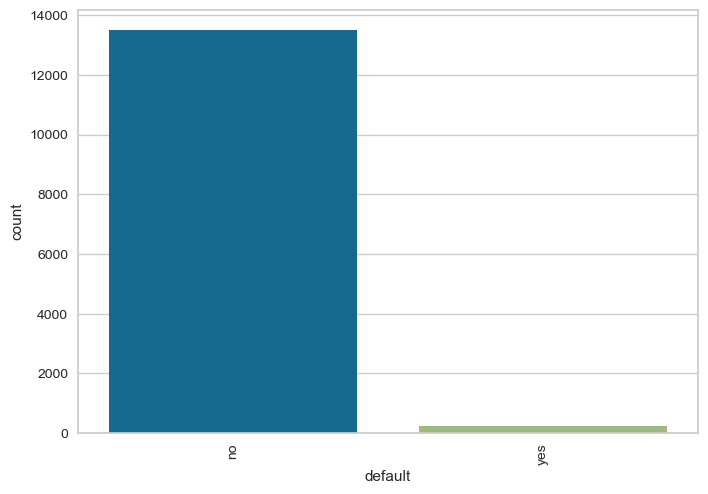

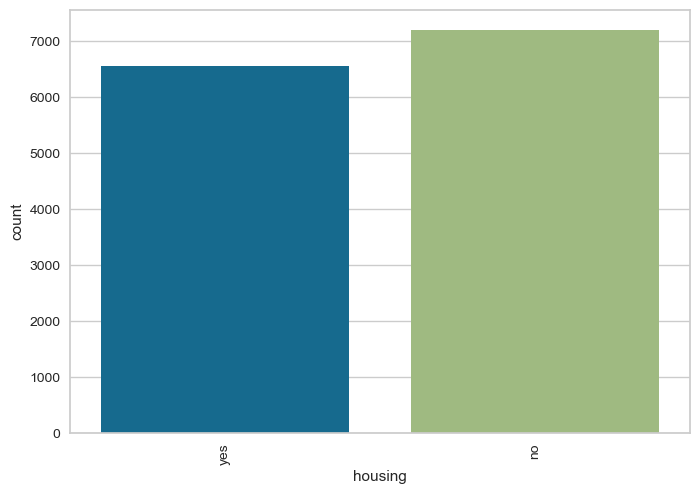

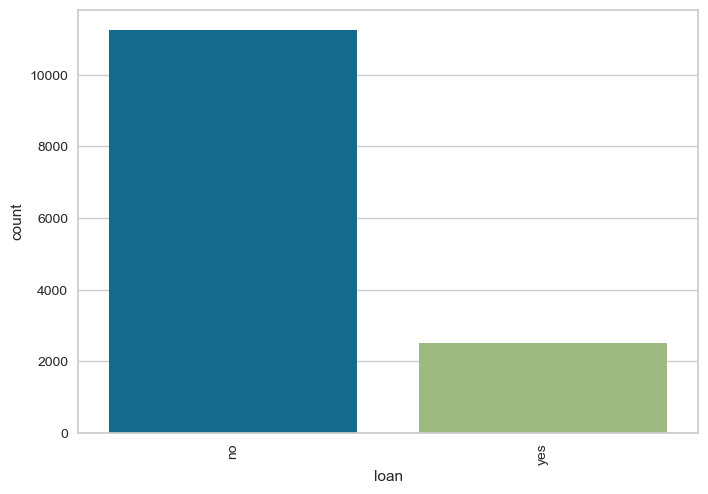

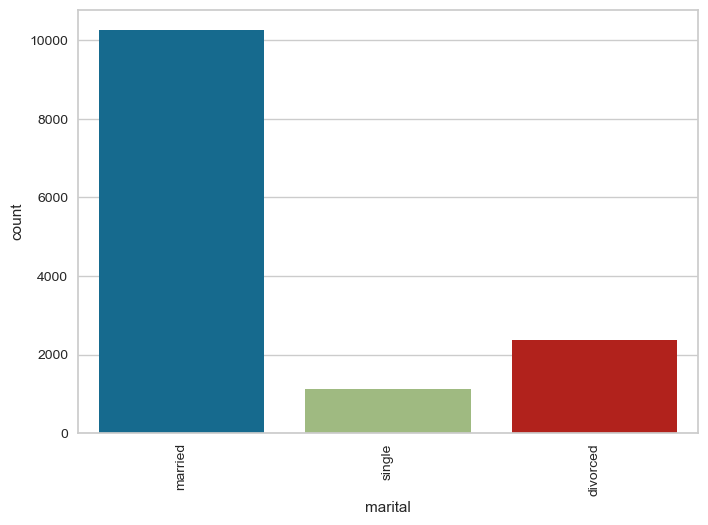

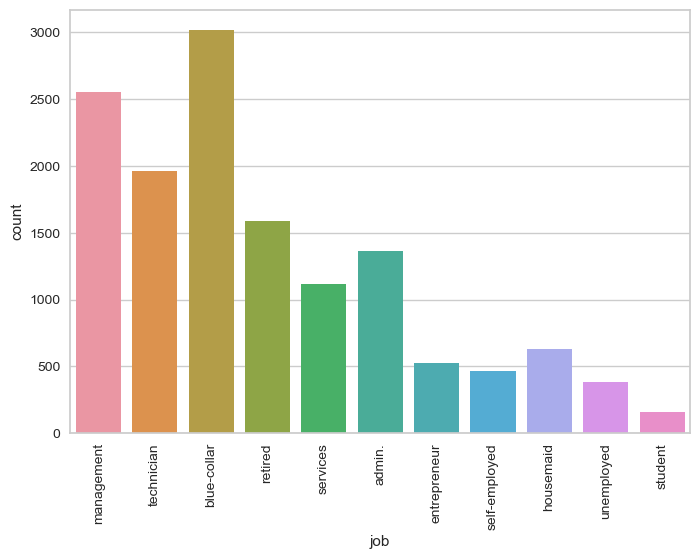

In [15]:
s=df_lab[(df_lab['kmean_ab']==0)&(df_lab['y']=='no')]
for i in ['default','housing','loan','marital','job']:
    sns.countplot(x=s[i])
    plt.xticks(rotation=90)
    plt.show()

In [16]:
df_lab[df_lab['kmean_ab']==1].describe()

age       balance           day      duration      campaign  \
count  26522.000000  26522.000000  26522.000000  26522.000000  26522.000000   
mean      33.993402    684.007013     15.771850    260.217970      2.756127   
std        5.093129    979.032962      8.352668    255.551469      3.200045   
min       18.000000  -8019.000000      1.000000      0.000000      1.000000   
25%       30.000000     46.000000      8.000000    104.000000      1.000000   
50%       34.000000    340.000000     16.000000    184.000000      2.000000   
75%       38.000000    966.750000     21.000000    323.000000      3.000000   
max       43.000000   5482.000000     31.000000   3422.000000     58.000000   

              pdays      previous  kmean_ab      kmean_dc    kmean_full  \
count  26522.000000  26522.000000   26522.0  26522.000000  26522.000000   
mean      43.183169      0.593319       1.0      0.287573      0.160471   
std      105.044567      2.551543       0.0      0.665041      0.367049   
min       -1.000000      0.000000       1.0      0.000000      0.000000   
25%       -1.000000      0.000000       1.0      0.000000      0.000000   
50%       -1.000000      0.000000       1.0      0.000000      0.000000   
75%       -1.000000      0.000000       1.0      0.000000      0.000000   
max      854.000000    275.000000       1.0      2.000000      1.000000   

          kmode_opt     kmean_pca   kproto_full  
count  26522.000000  26522.000000  26522.000000  
mean       1.012367      0.162544      1.411771  
std        1.375969      0.368956      1.038747  
min        0.000000      0.000000      0.000000  
25%        0.000000      0.000000      1.000000  
50%        0.000000      0.000000      1.000000  
75%        3.000000      0.000000      2.000000  
max        3.000000      1.000000      3.000000

In [17]:
df_lab[df_lab['kmean_ab']==1].describe(include=object)

job  marital  education default housing   loan  month      y
count         26522    26522      26522   26522   26522  26522  26522  26522
unique           11        3          3       2       2      2     12      2
top     blue-collar  married  secondary      no     yes     no    may     no
freq           6002    13660      15159   25980   16563  22181   9205  23521

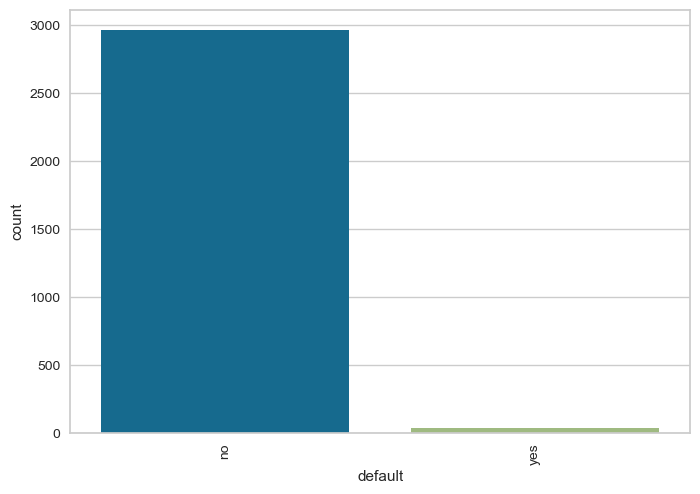

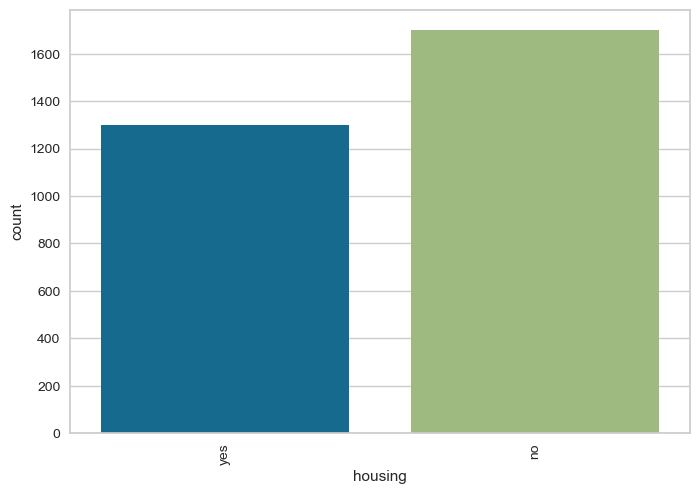

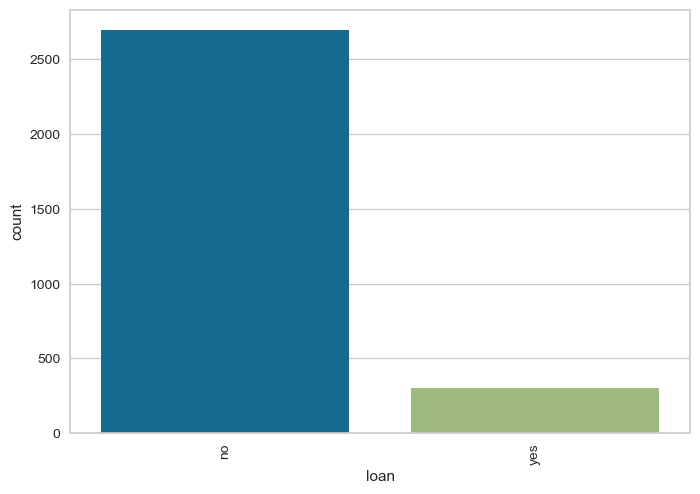

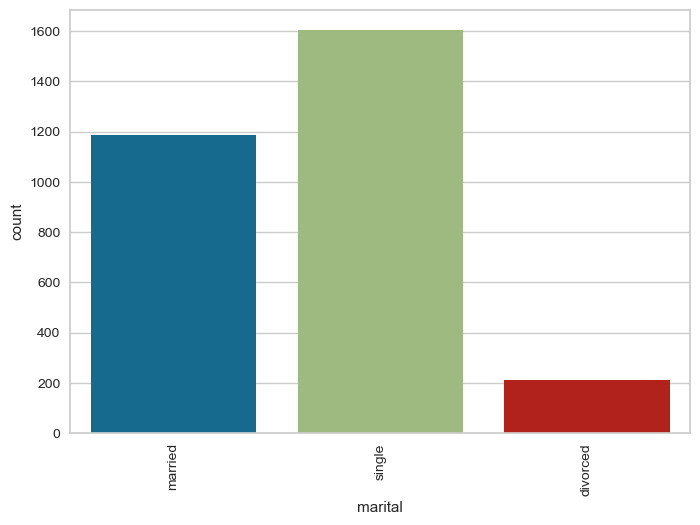

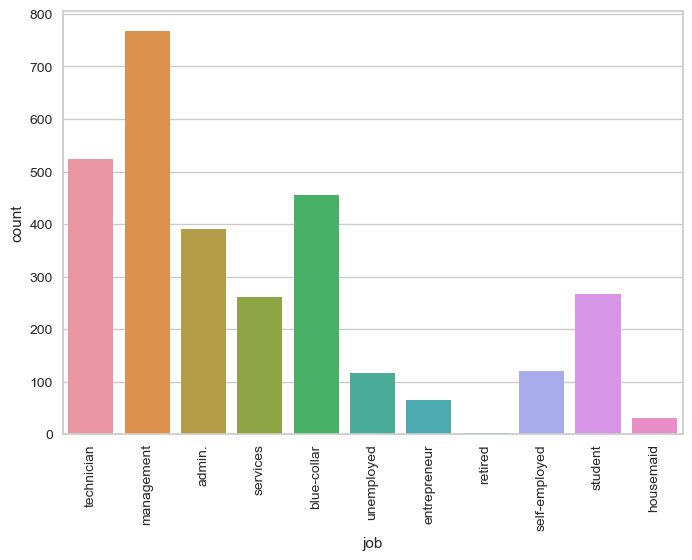

In [18]:
s=df_lab[(df_lab['kmean_ab']==1)&(df_lab['y']=='yes')]
for i in ['default','housing','loan','marital','job']:
    sns.countplot(x=s[i])
    plt.xticks(rotation=90)
    plt.show()

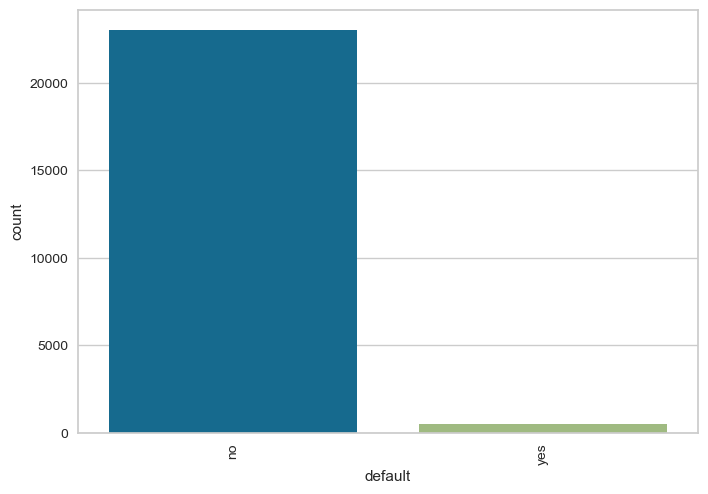

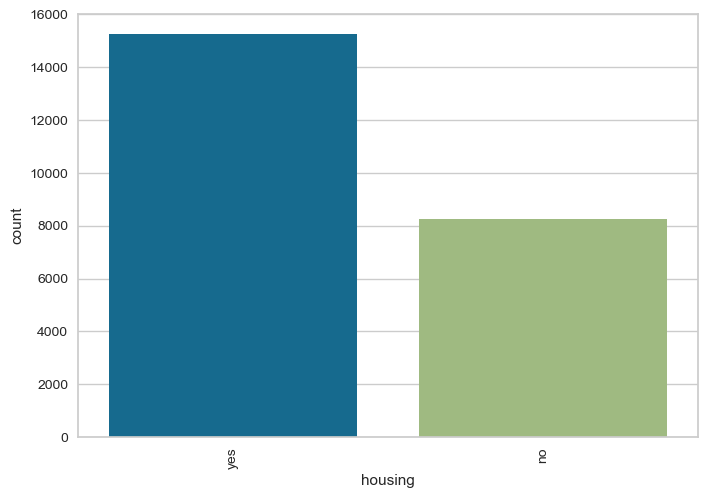

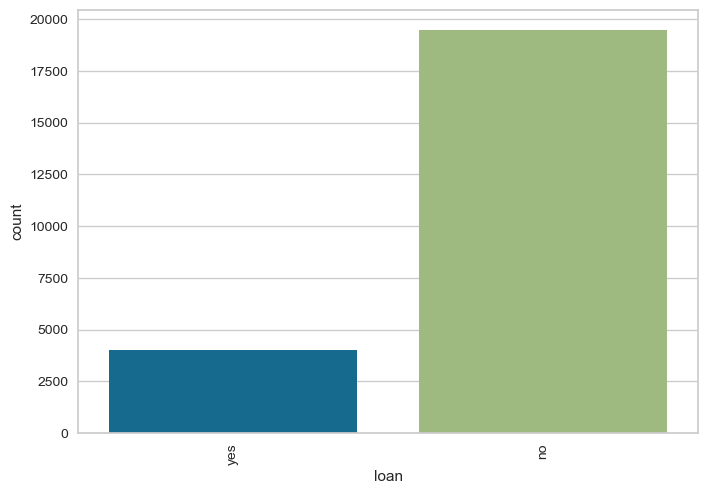

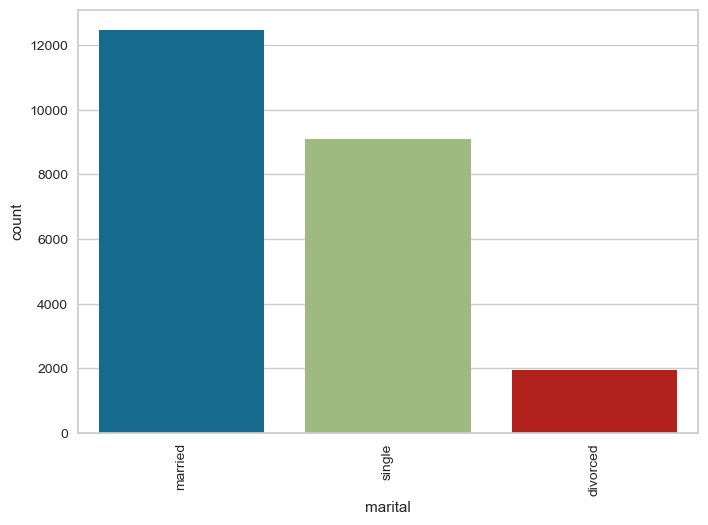

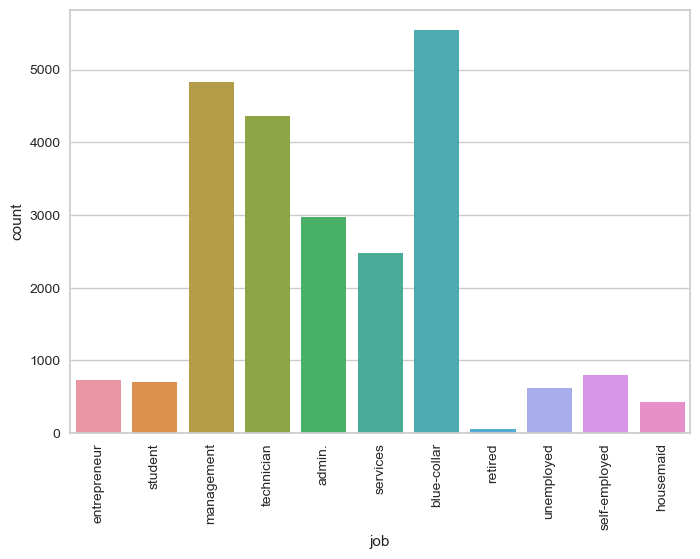

In [19]:
s=df_lab[(df_lab['kmean_ab']==1)&(df_lab['y']=='no')]
for i in ['default','housing','loan','marital','job']:
    sns.countplot(x=s[i])
    plt.xticks(rotation=90)
    plt.show()

In [20]:
df_lab[df_lab['kmean_ab']==2].describe()

age       balance          day     duration     campaign  \
count  2868.000000   2868.000000  2868.000000  2868.000000  2868.000000   
mean     42.241980   7859.404463    16.192120   271.483264     2.692817   
std       9.750749   3126.112562     7.881427   277.003678     3.104638   
min      20.000000   3917.000000     1.000000     0.000000     1.000000   
25%      34.000000   5495.750000     9.000000   105.000000     1.000000   
50%      41.000000   6912.000000    18.000000   185.000000     2.000000   
75%      49.000000   9299.500000    21.000000   334.000000     3.000000   
max      85.000000  18347.000000    31.000000  4918.000000    63.000000   

             pdays     previous  kmean_ab     kmean_dc   kmean_full  \
count  2868.000000  2868.000000    2868.0  2868.000000  2868.000000   
mean     40.377964     0.682357       2.0     0.309972     0.176430   
std      92.307542     2.239857       0.0     0.689610     0.381252   
min      -1.000000     0.000000       2.0     0.000000     0.000000   
25%      -1.000000     0.000000       2.0     0.000000     0.000000   
50%      -1.000000     0.000000       2.0     0.000000     0.000000   
75%      -1.000000     0.000000       2.0     0.000000     0.000000   
max     779.000000    40.000000       2.0     2.000000     1.000000   

         kmode_opt    kmean_pca  kproto_full  
count  2868.000000  2868.000000  2868.000000  
mean      1.451883     0.178522     1.651325  
std       1.482647     0.383018     1.060323  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.000000     1.000000  
50%       1.000000     0.000000     2.000000  
75%       3.000000     0.000000     2.000000  
max       3.000000     1.000000     3.000000

In [21]:
df_lab[df_lab['kmean_ab']==2].describe(include=object)

job  marital  education default housing  loan month     y
count         2868     2868       2868    2868    2868  2868  2868  2868
unique          11        3          3       2       2     2    12     2
top     management  married  secondary      no      no    no   may    no
freq           844     1826       1312    2865    1436  2643   659  2447

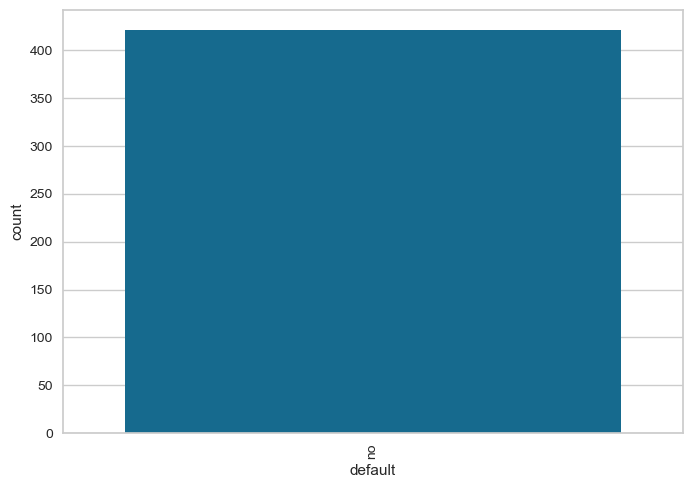

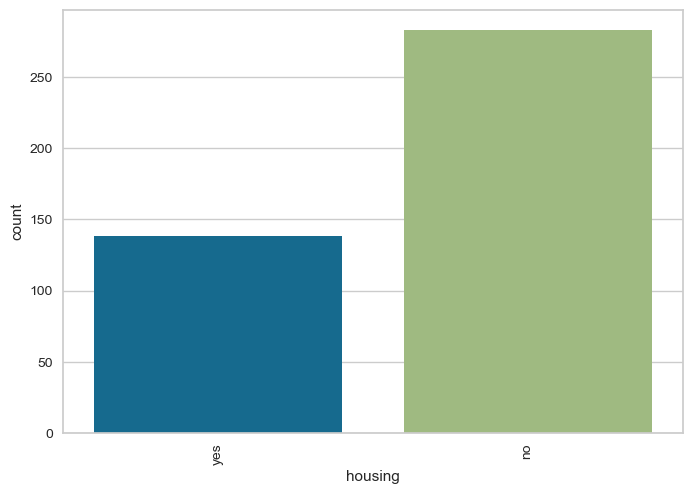

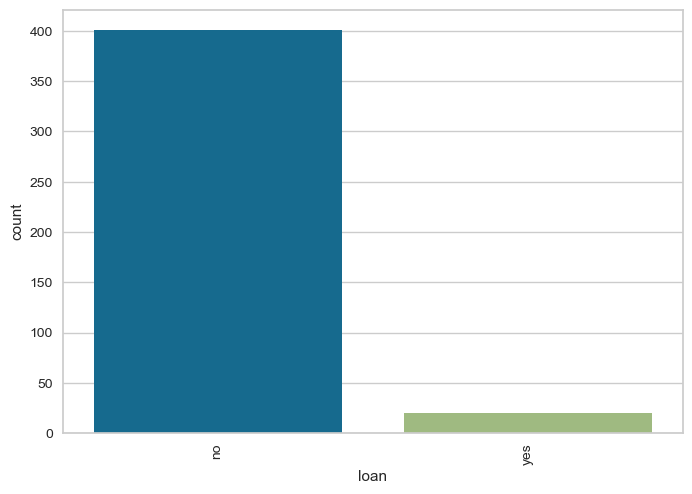

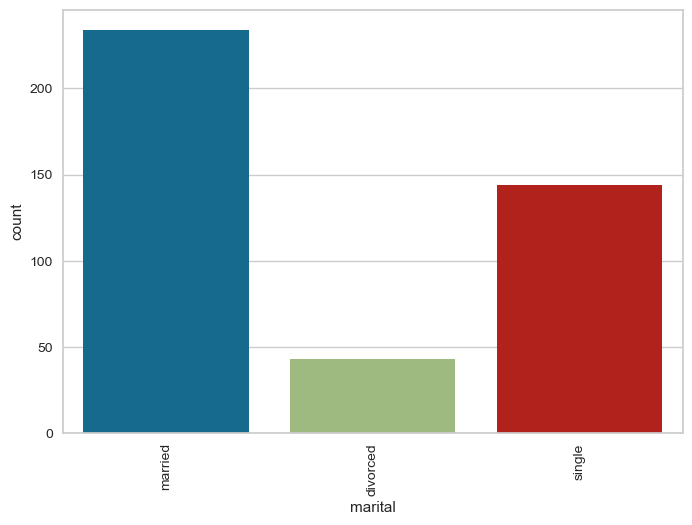

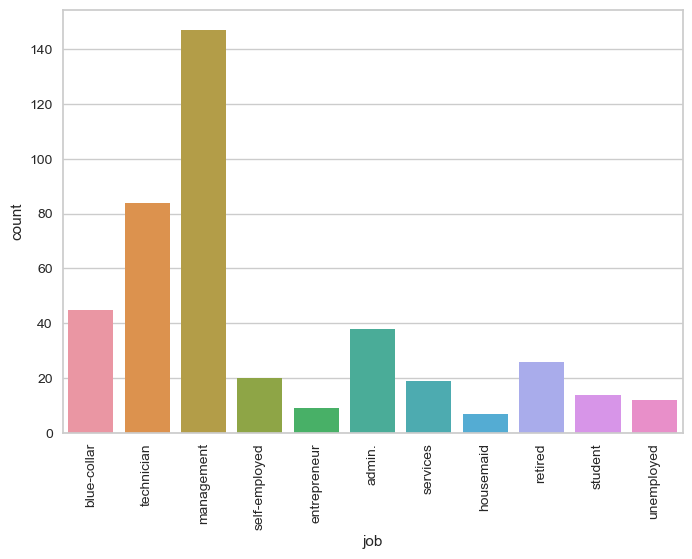

In [22]:
s=df_lab[(df_lab['kmean_ab']==2)&(df_lab['y']=='yes')]
for i in ['default','housing','loan','marital','job']:
    sns.countplot(x=s[i])
    plt.xticks(rotation=90)
    plt.show()

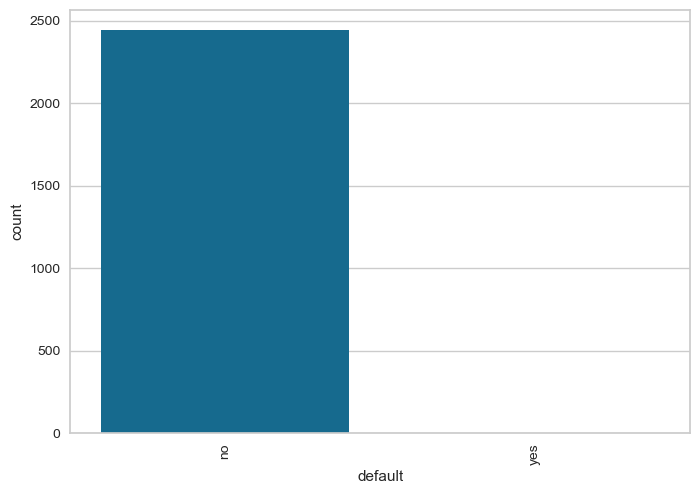

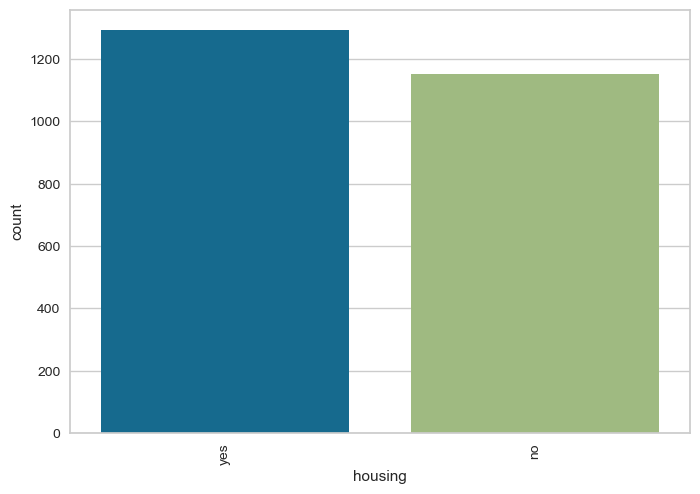

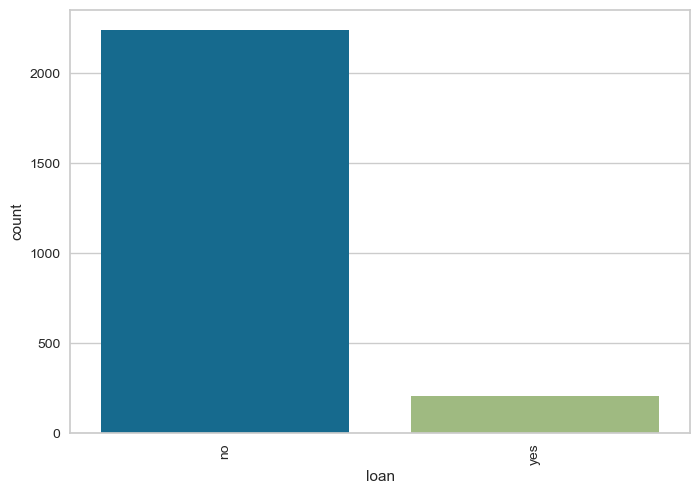

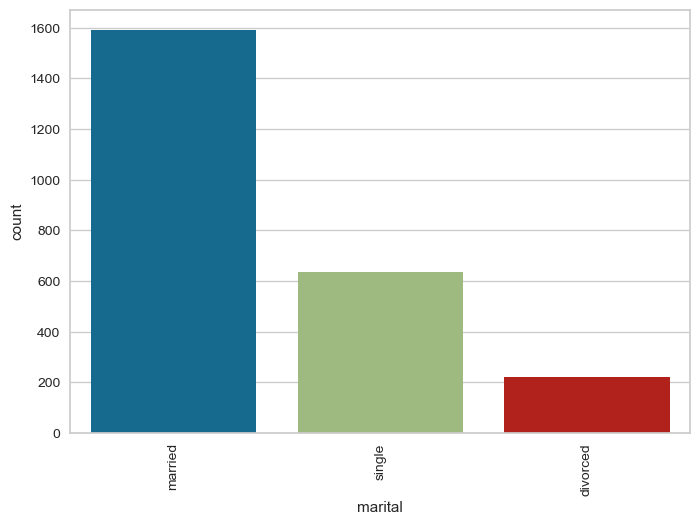

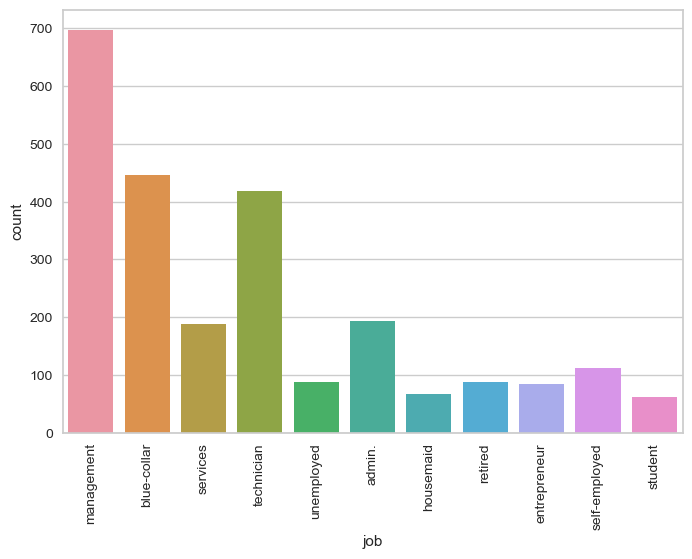

In [23]:
s=df_lab[(df_lab['kmean_ab']==2)&(df_lab['y']=='no')]
for i in ['default','housing','loan','marital','job']:
    sns.countplot(x=s[i])
    plt.xticks(rotation=90)
    plt.show()

In [24]:
df_lab[df_lab['kmean_ab']==3].describe()

age        balance         day     duration    campaign  \
count  222.000000     222.000000  222.000000   222.000000  222.000000   
mean    46.387387   28788.364865   15.819820   255.540541    2.693694   
std     12.251269   13314.239569    8.088535   256.029120    3.188761   
min     23.000000   18268.000000    1.000000     8.000000    1.000000   
25%     36.000000   21040.000000    9.000000    88.500000    1.000000   
50%     45.000000   23897.500000   17.500000   177.000000    2.000000   
75%     55.000000   29382.750000   21.000000   312.000000    3.000000   
max     84.000000  102127.000000   31.000000  1623.000000   31.000000   

            pdays    previous  kmean_ab    kmean_dc  kmean_full   kmode_opt  \
count  222.000000  222.000000     222.0  222.000000  222.000000  222.000000   
mean    32.887387    0.567568       3.0    0.306306    0.148649    1.851351   
std     93.462655    1.986933       0.0    0.683255    0.356546    1.442871   
min     -1.000000    0.000000       3.0    0.000000    0.000000    0.000000   
25%     -1.000000    0.000000       3.0    0.000000    0.000000    0.000000   
50%     -1.000000    0.000000       3.0    0.000000    0.000000    3.000000   
75%     -1.000000    0.000000       3.0    0.000000    0.000000    3.000000   
max    589.000000   23.000000       3.0    2.000000    1.000000    3.000000   

        kmean_pca  kproto_full  
count  222.000000   222.000000  
mean     0.153153     1.774775  
std      0.360949     0.938707  
min      0.000000     0.000000  
25%      0.000000     2.000000  
50%      0.000000     2.000000  
75%      0.000000     2.000000  
max      1.000000     3.000000

In [25]:
df_lab[df_lab['kmean_ab']==3].describe(include=object)

job  marital education default housing loan month    y
count          222      222       222     222     222  222   222  222
unique          11        3         3       1       2    2    12    2
top     management  married  tertiary      no      no   no   nov   no
freq            92      140       128     222     141  211    52  189

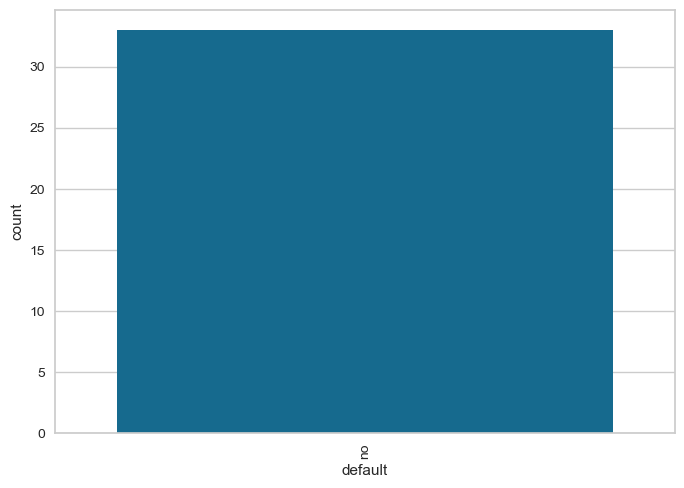

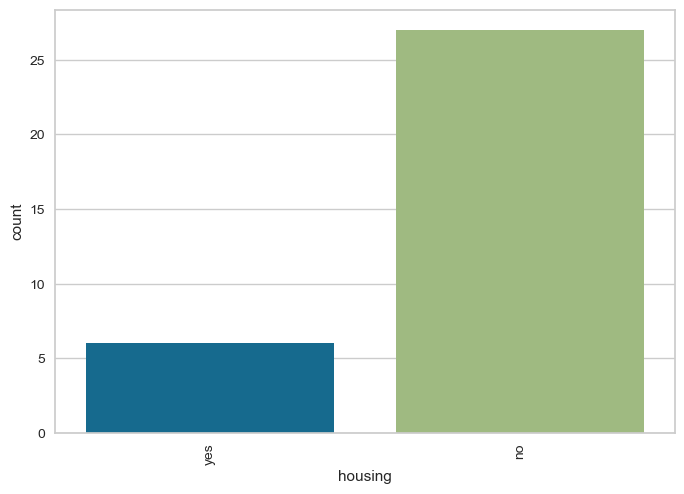

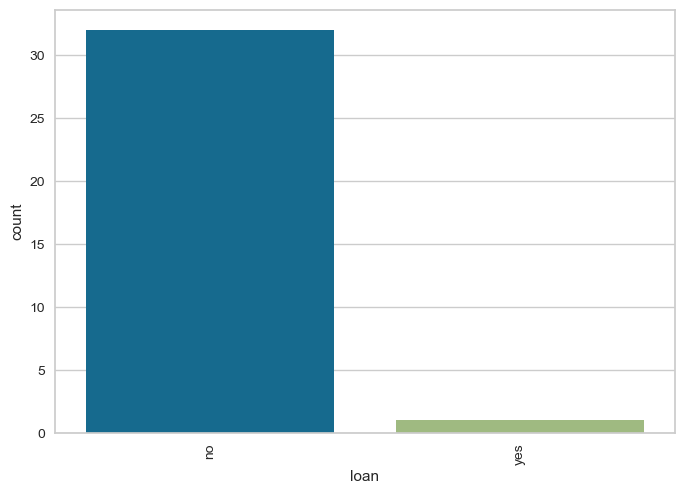

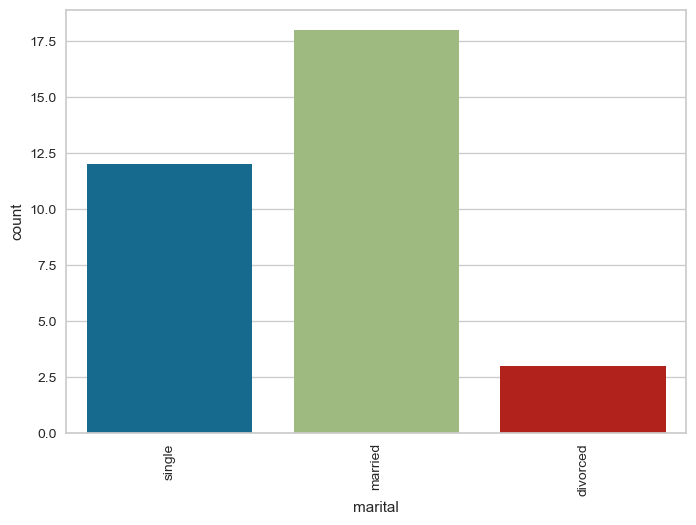

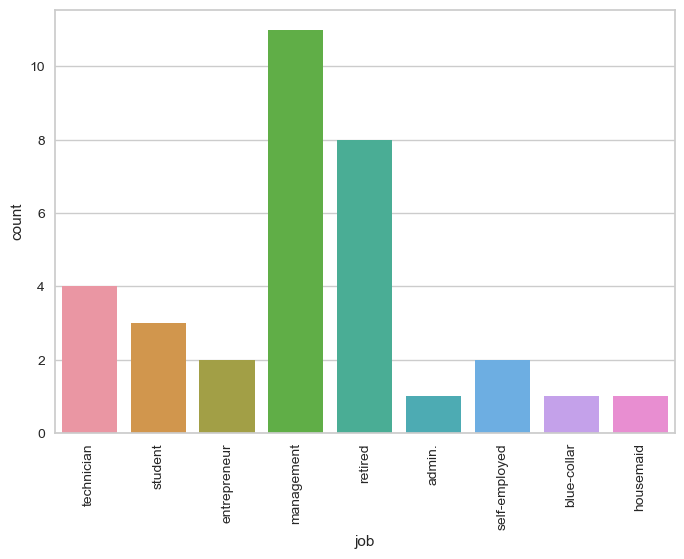

In [26]:
s=df_lab[(df_lab['kmean_ab']==3)&(df_lab['y']=='yes')]
for i in ['default','housing','loan','marital','job']:
    sns.countplot(x=s[i])
    plt.xticks(rotation=90)
    plt.show()

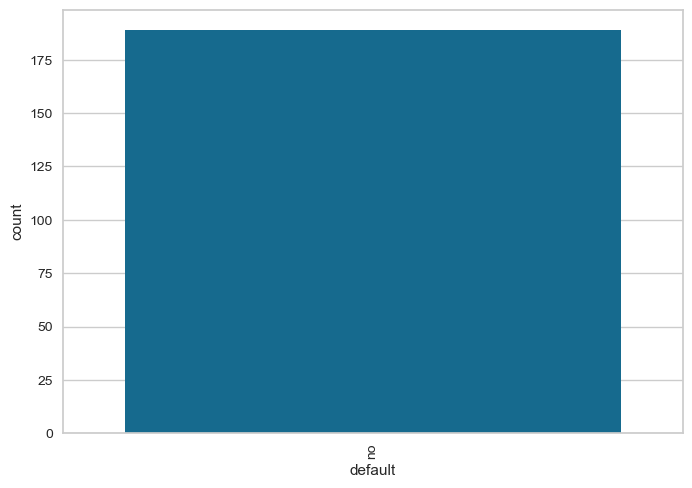

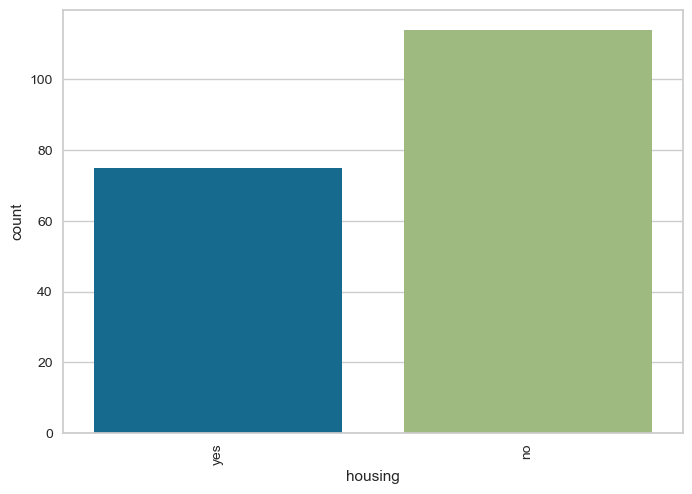

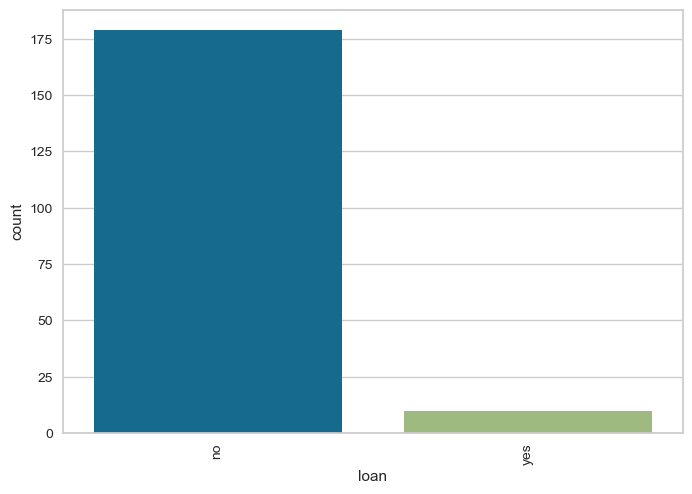

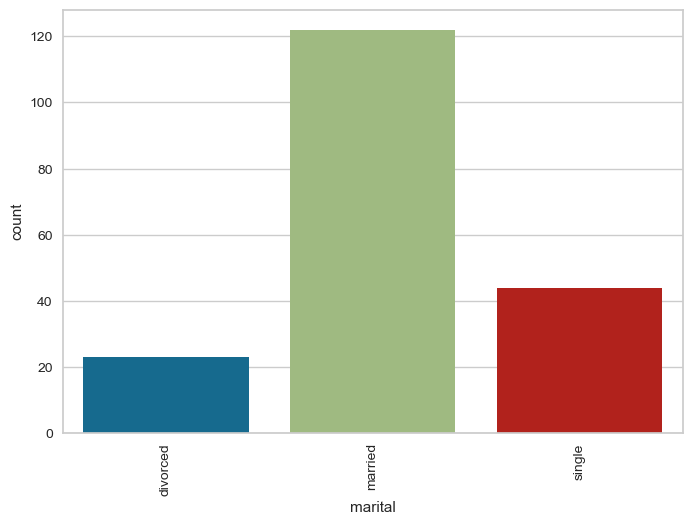

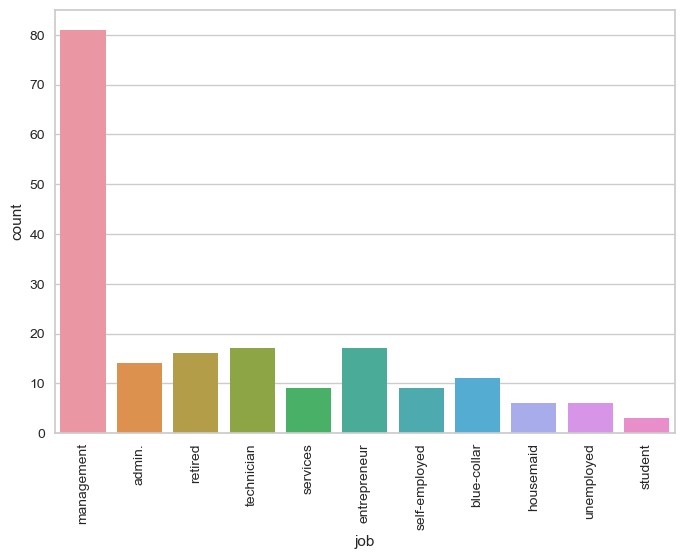

In [27]:
s=df_lab[(df_lab['kmean_ab']==3)&(df_lab['y']=='no')]
for i in ['default','housing','loan','marital','job']:
    sns.countplot(x=s[i])
    plt.xticks(rotation=90)
    plt.show()

In [28]:
df_lab[df_lab['kmean_dc']==0].describe()

age        balance           day      duration      campaign  \
count  37667.000000   37667.000000  37667.000000  37667.000000  37667.000000   
mean      40.941514    1347.649508     15.554517    187.409058      2.216051   
std       10.597914    3037.574022      8.277310    114.441108      1.458407   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      73.000000      8.000000     99.000000      1.000000   
50%       39.000000     443.000000     16.000000    163.000000      2.000000   
75%       48.000000    1410.000000     21.000000    257.000000      3.000000   
max       95.000000  102127.000000     31.000000    499.000000      7.000000   

              pdays      previous      kmean_ab  kmean_dc    kmean_full  \
count  37667.000000  37667.000000  37667.000000   37667.0  37667.000000   
mean      42.198795      0.599596      0.724693       0.0      0.161521   
std      102.334524      2.369176      0.594562       0.0      0.368015   
min       -1.000000      0.000000      0.000000       0.0      0.000000   
25%       -1.000000      0.000000      0.000000       0.0      0.000000   
50%       -1.000000      0.000000      1.000000       0.0      0.000000   
75%       -1.000000      0.000000      1.000000       0.0      0.000000   
max      871.000000    275.000000      3.000000       0.0      1.000000   

          kmode_opt     kmean_pca   kproto_full  
count  37667.000000  37667.000000  37667.000000  
mean       1.197494      0.162848      1.603154  
std        1.422318      0.369232      1.060030  
min        0.000000      0.000000      0.000000  
25%        0.000000      0.000000      1.000000  
50%        0.000000      0.000000      2.000000  
75%        3.000000      0.000000      3.000000  
max        3.000000      1.000000      3.000000

In [29]:
df_lab[df_lab['kmean_dc']==0].describe(include=object)

job  marital  education default housing   loan  month      y
count         37667    37667      37667   37667   37667  37667  37667  37667
unique           11        3          3       2       2      2     12      2
top     blue-collar  married  secondary      no     yes     no    may     no
freq           8041    22740      20597   36997   20989  31613  11716  34697

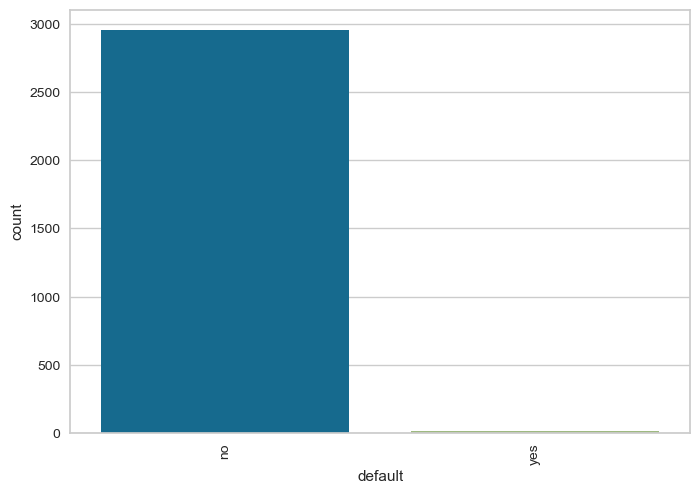

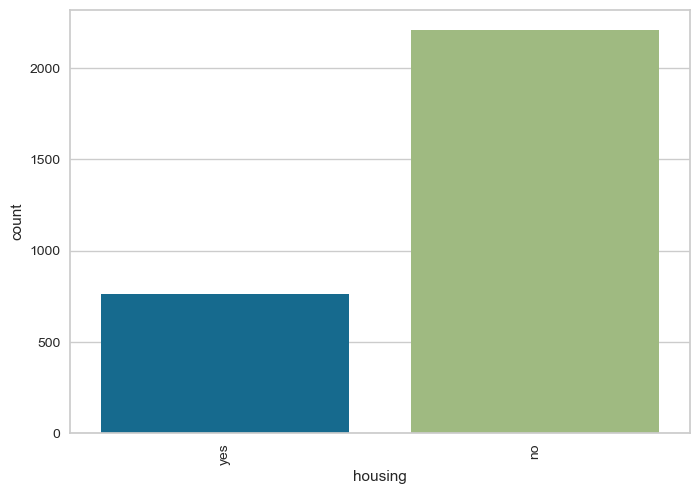

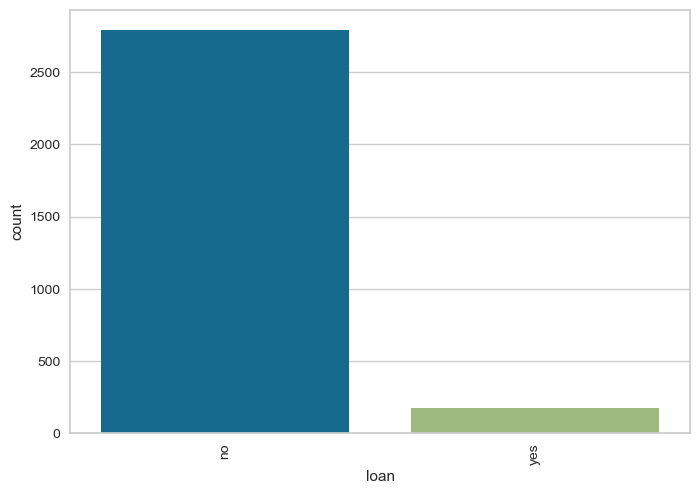

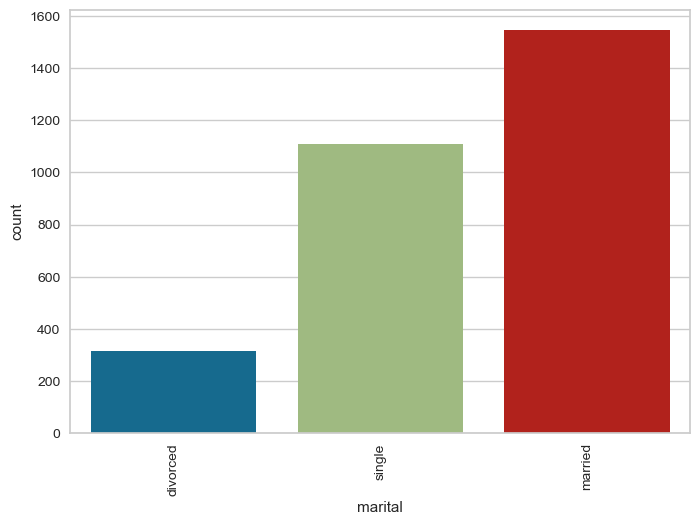

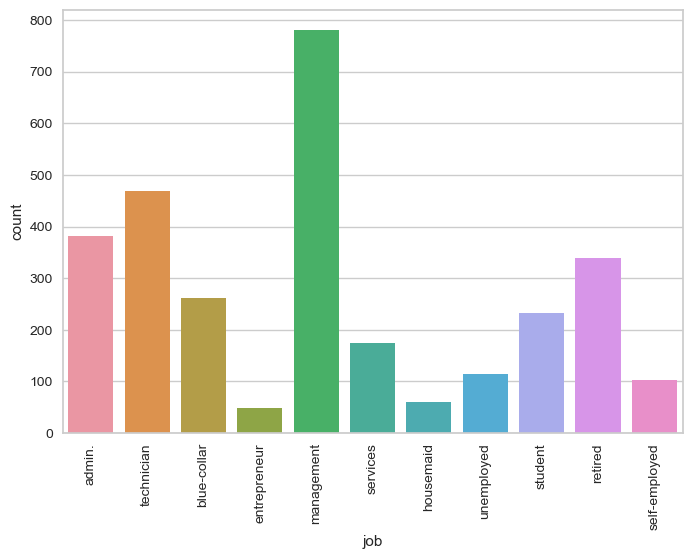

In [30]:
s=df_lab[(df_lab['kmean_dc']==0)&(df_lab['y']=='yes')]
for i in ['default','housing','loan','marital','job']:
    sns.countplot(x=s[i])
    plt.xticks(rotation=90)
    plt.show()

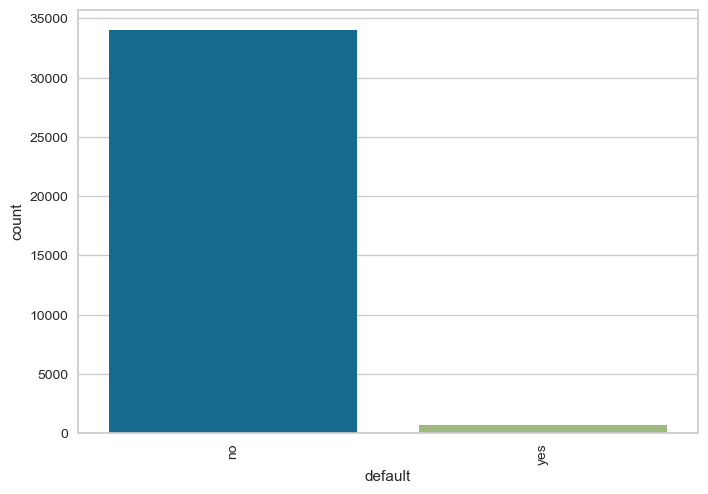

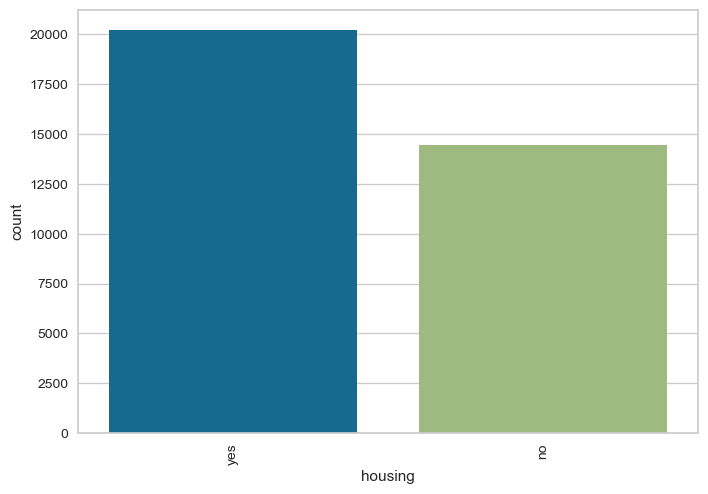

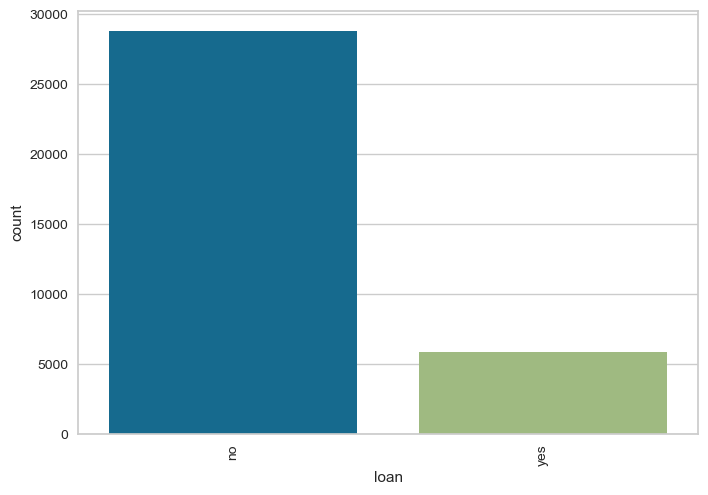

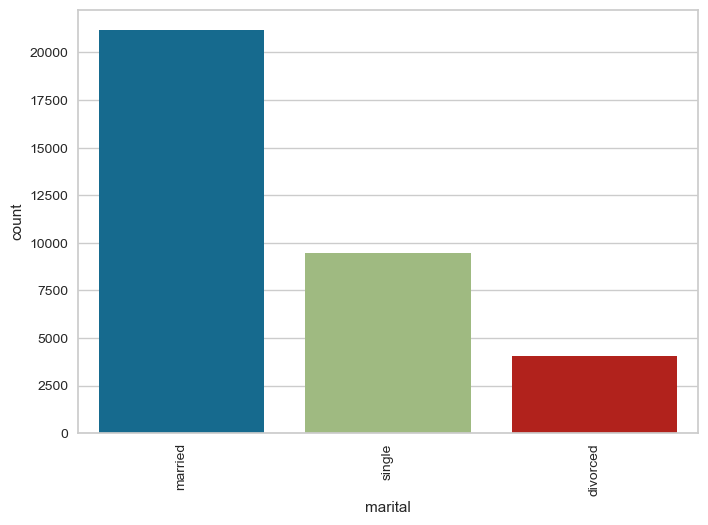

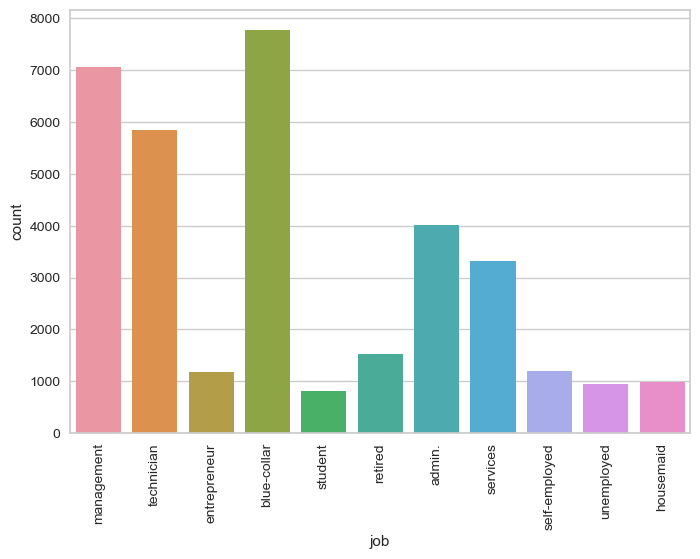

In [31]:
s=df_lab[(df_lab['kmean_dc']==0)&(df_lab['y']=='no')]
for i in ['default','housing','loan','marital','job']:
    sns.countplot(x=s[i])
    plt.xticks(rotation=90)
    plt.show()

In [32]:
df_lab[df_lab['kmean_dc']==1].describe()

age       balance          day     duration     campaign  \
count  2238.000000   2238.000000  2238.000000  2238.000000  2238.000000   
mean     40.849419   1252.773458    20.447274   145.909741    13.054960   
std       9.572448   3055.580767     8.256810   167.752510     6.343619   
min      19.000000  -1613.000000     1.000000     0.000000     8.000000   
25%      33.000000     23.250000    15.000000    28.000000     9.000000   
50%      39.000000    340.500000    21.000000    91.500000    11.000000   
75%      48.000000   1244.250000    28.000000   191.500000    15.000000   
max      95.000000  52527.000000    31.000000  1484.000000    63.000000   

             pdays     previous     kmean_ab  kmean_dc   kmean_full  \
count  2238.000000  2238.000000  2238.000000    2238.0  2238.000000   
mean     11.437891     0.253798     0.735031       1.0     0.043342   
std      60.155182     1.787535     0.592711       0.0     0.203672   
min      -1.000000     0.000000     0.000000       1.0     0.000000   
25%      -1.000000     0.000000     0.000000       1.0     0.000000   
50%      -1.000000     0.000000     1.000000       1.0     0.000000   
75%      -1.000000     0.000000     1.000000       1.0     0.000000   
max     511.000000    38.000000     3.000000       1.0     1.000000   

         kmode_opt    kmean_pca  kproto_full  
count  2238.000000  2238.000000  2238.000000  
mean      1.313226     0.042002     2.777480  
std       1.430467     0.200638     0.731556  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.000000     3.000000  
50%       0.000000     0.000000     3.000000  
75%       3.000000     0.000000     3.000000  
max       3.000000     1.000000     3.000000

In [33]:
df_lab[df_lab['kmean_dc']==1].describe(include=object)

job  marital  education default housing  loan month     y
count         2238     2238       2238    2238    2238  2238  2238  2238
unique          11        3          3       2       2     2    11     2
top     management  married  secondary      no     yes    no   aug    no
freq           506     1402       1197    2176    1138  1861   674  2165

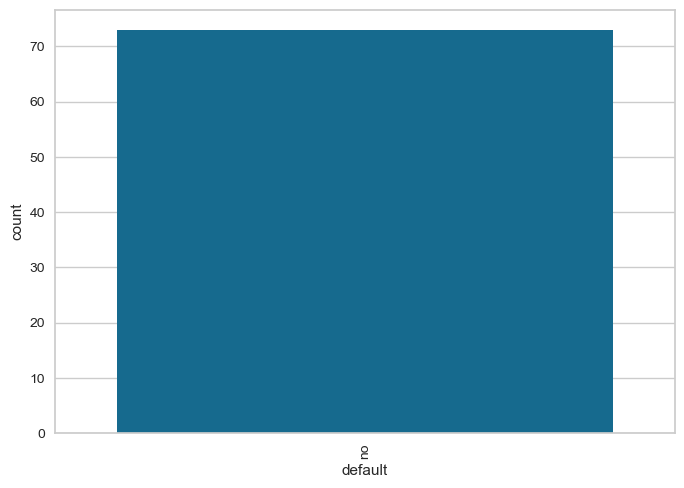

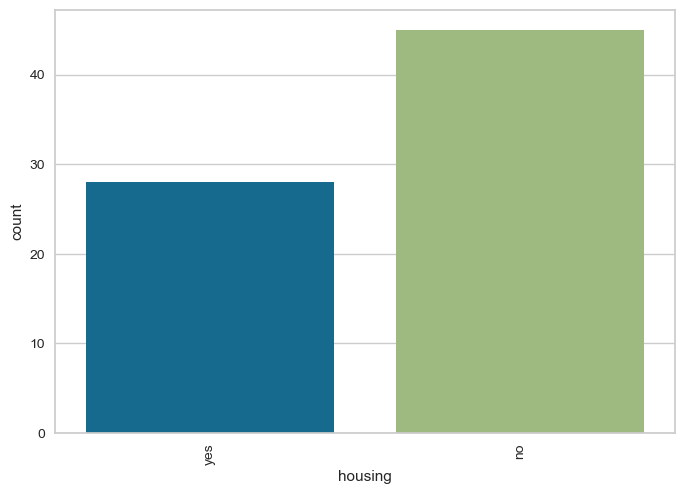

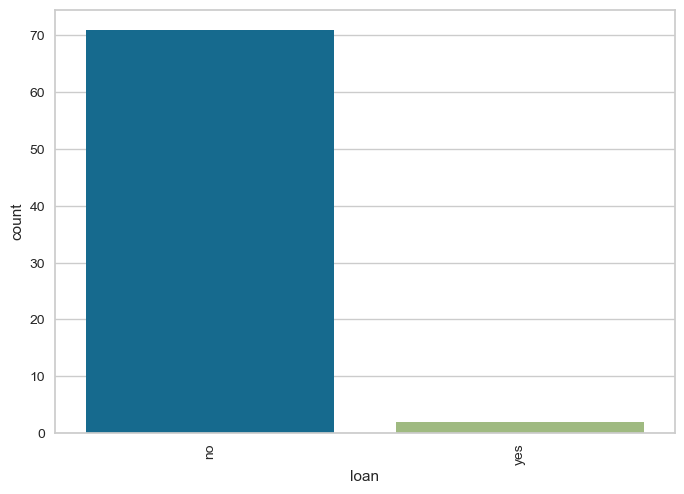

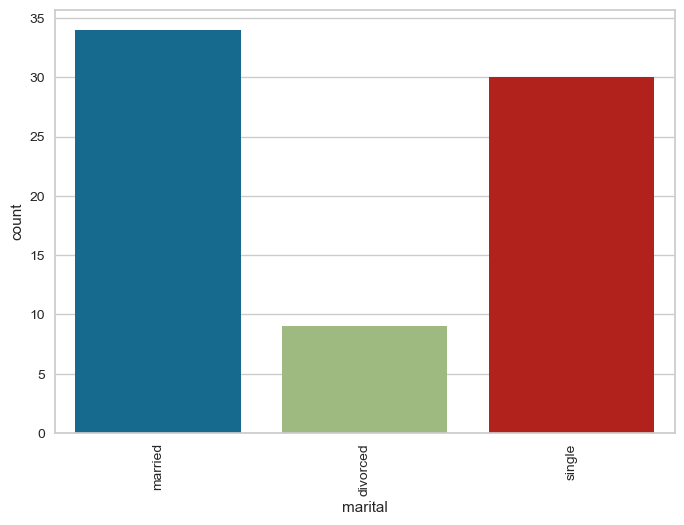

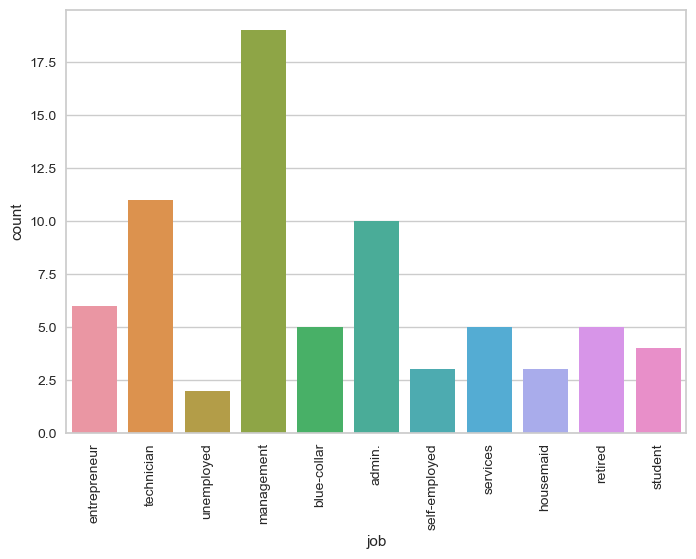

In [34]:
s=df_lab[(df_lab['kmean_dc']==1)&(df_lab['y']=='yes')]
for i in ['default','housing','loan','marital','job']:
    sns.countplot(x=s[i])
    plt.xticks(rotation=90)
    plt.show()

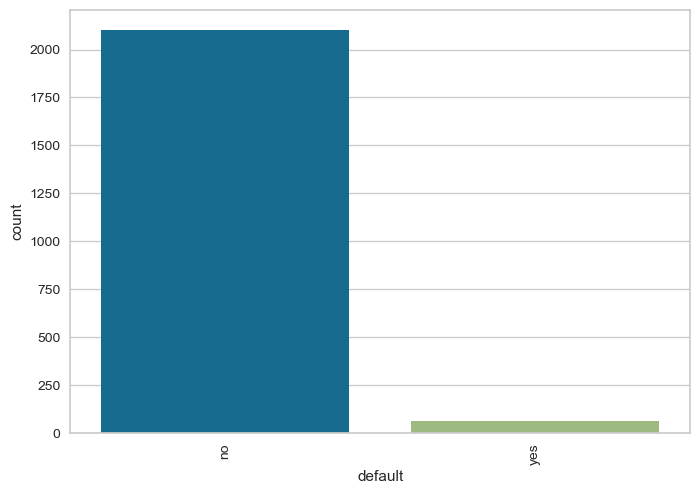

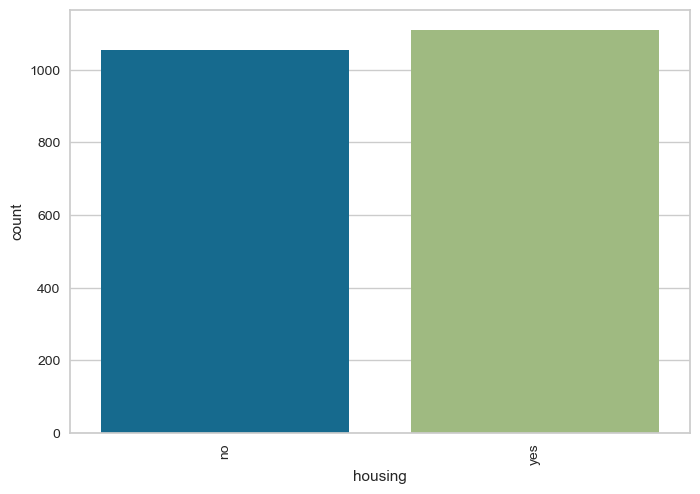

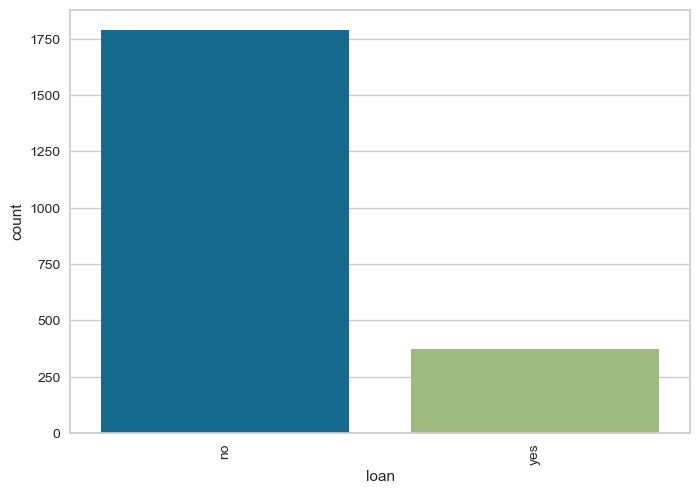

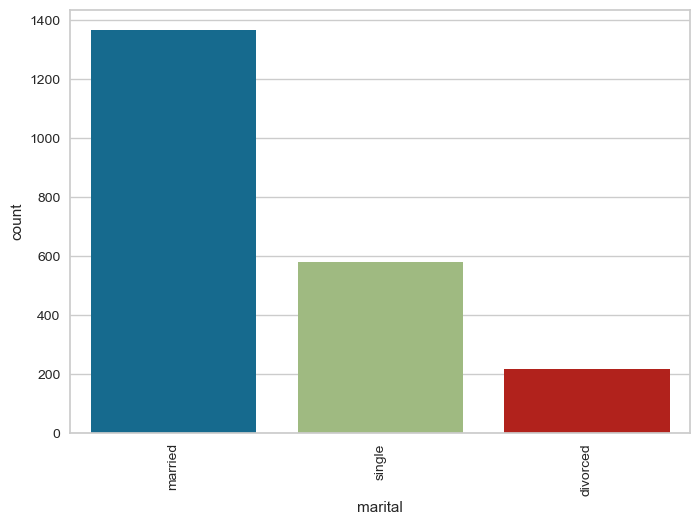

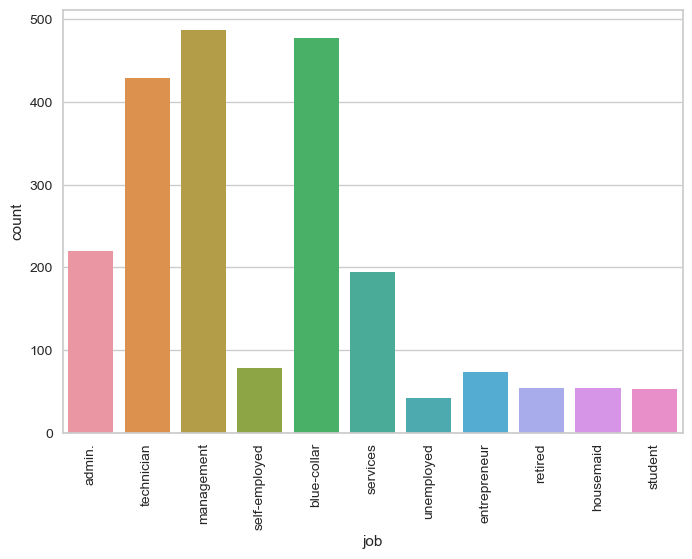

In [35]:
s=df_lab[(df_lab['kmean_dc']==1)&(df_lab['y']=='no')]
for i in ['default','housing','loan','marital','job']:
    sns.countplot(x=s[i])
    plt.xticks(rotation=90)
    plt.show()

In [36]:
df_lab[df_lab['kmean_dc']==2].describe()

age       balance          day     duration     campaign  \
count  5306.000000   5306.000000  5306.000000  5306.000000  5306.000000   
mean     40.935168   1512.261779    15.637203   807.788918     2.311911   
std      11.173465   3086.709560     8.093639   342.538793     1.645992   
min      20.000000  -3058.000000     1.000000   493.000000     1.000000   
25%      32.000000    100.250000     8.000000   580.000000     1.000000   
50%      39.000000    541.500000    16.000000   699.000000     2.000000   
75%      48.000000   1650.750000    21.000000   918.000000     3.000000   
max      93.000000  81204.000000    31.000000  4918.000000    16.000000   

             pdays     previous     kmean_ab  kmean_dc   kmean_full  \
count  5306.000000  5306.000000  5306.000000    5306.0  5306.000000   
mean     38.123634     0.581229     0.750471       2.0     0.154730   
std      95.806000     1.992327     0.600286       0.0     0.361682   
min      -1.000000     0.000000     0.000000       2.0     0.000000   
25%      -1.000000     0.000000     0.000000       2.0     0.000000   
50%      -1.000000     0.000000     1.000000       2.0     0.000000   
75%      -1.000000     0.000000     1.000000       2.0     0.000000   
max     784.000000    58.000000     3.000000       2.0     1.000000   

         kmode_opt    kmean_pca  kproto_full  
count  5306.000000  5306.000000  5306.000000  
mean      1.174519     0.153788     1.310403  
std       1.419163     0.360780     0.878024  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.000000     1.000000  
50%       0.000000     0.000000     1.000000  
75%       3.000000     0.000000     2.000000  
max       3.000000     1.000000     3.000000

In [37]:
df_lab[df_lab['kmean_dc']==2].describe(include=object)

job  marital  education default housing  loan month     y
count          5306     5306       5306    5306    5306  5306  5306  5306
unique           11        3          3       2       2     2    12     2
top     blue-collar  married  secondary      no     yes    no   may    no
freq           1209     3072       2863    5223    3003  4493  1603  3060

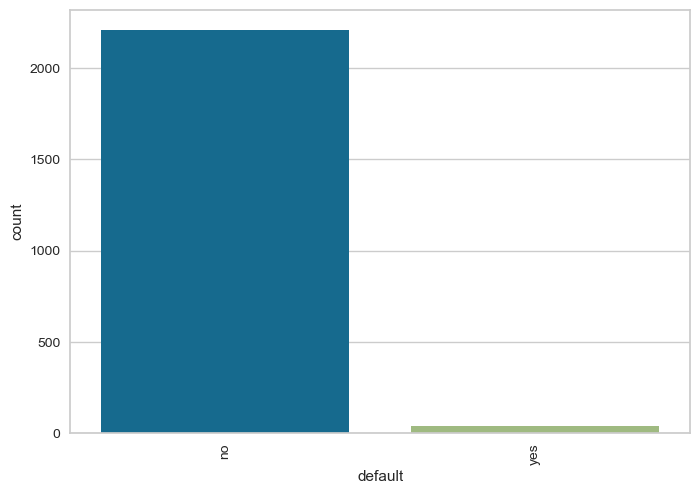

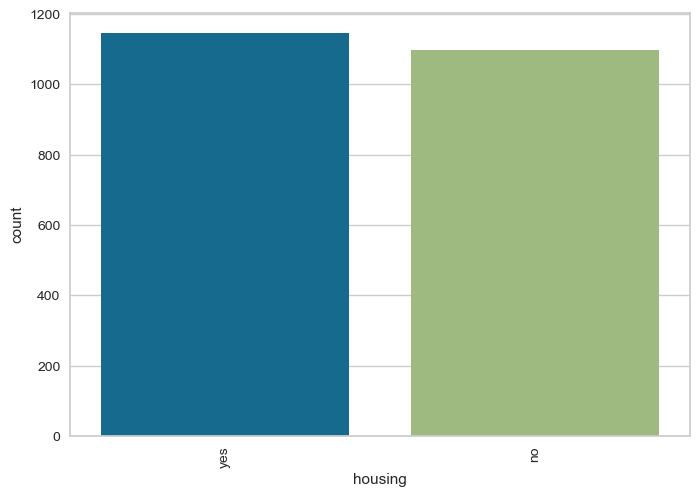

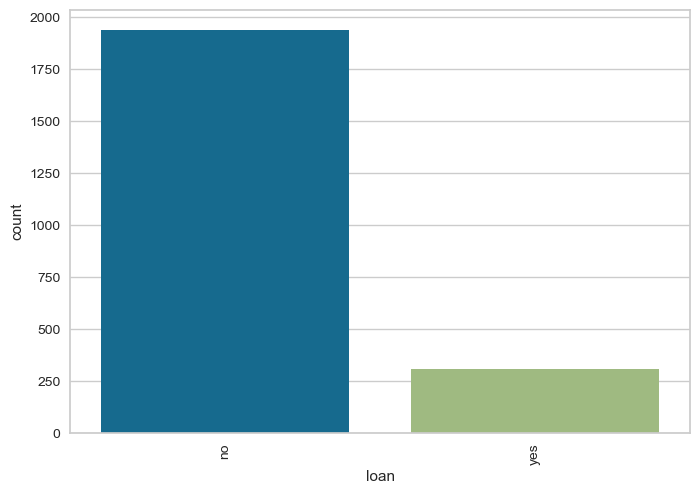

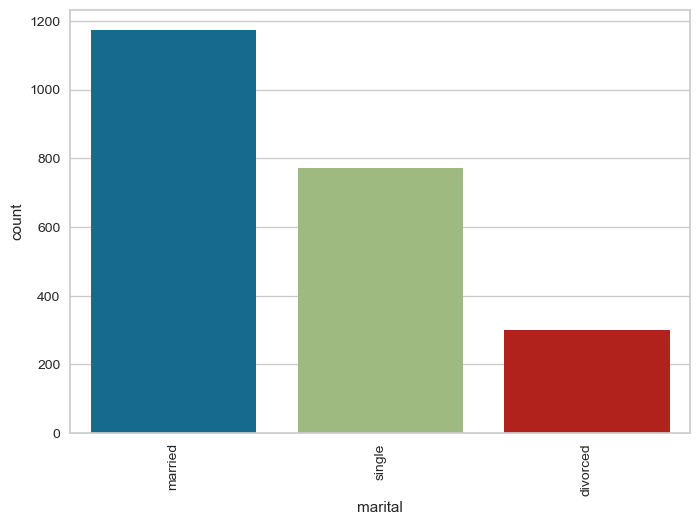

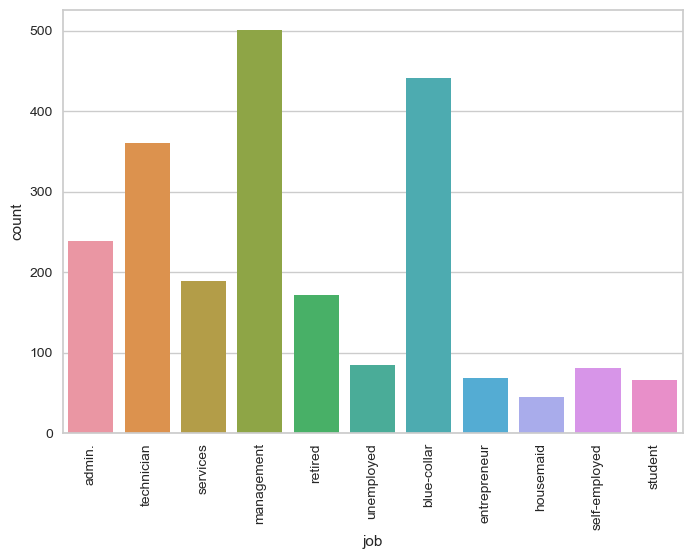

In [38]:
s=df_lab[(df_lab['kmean_dc']==2)&(df_lab['y']=='yes')]
for i in ['default','housing','loan','marital','job']:
    sns.countplot(x=s[i])
    plt.xticks(rotation=90)
    plt.show()

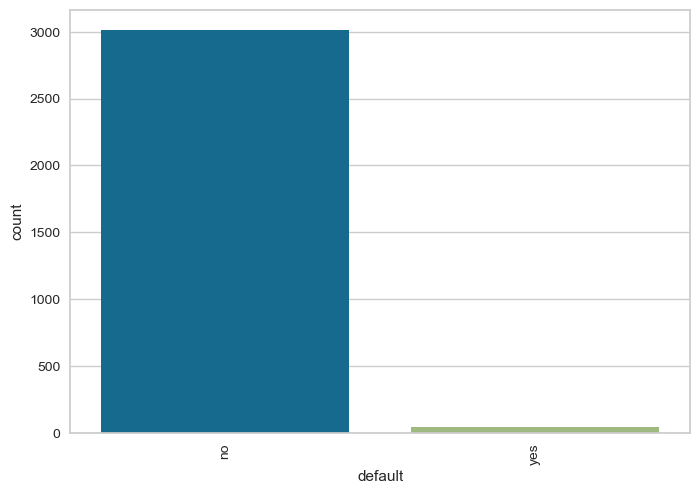

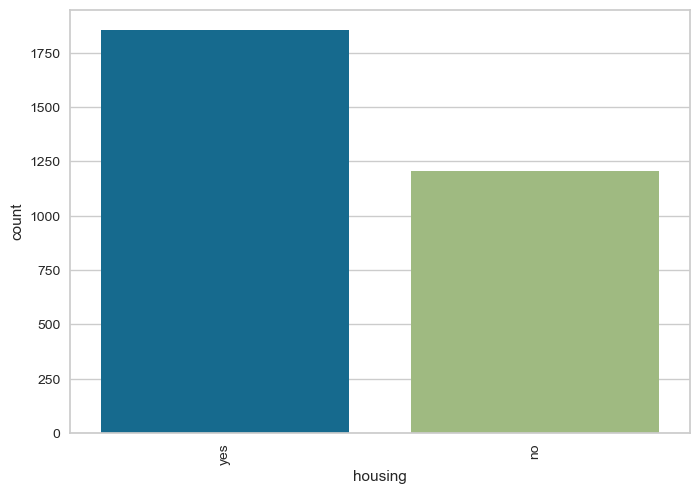

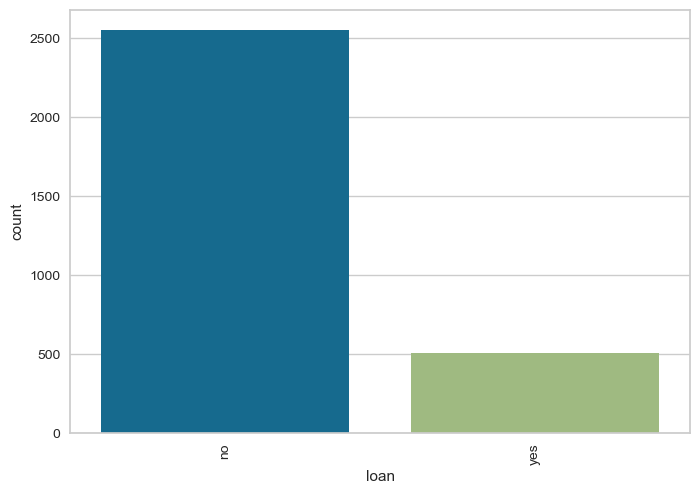

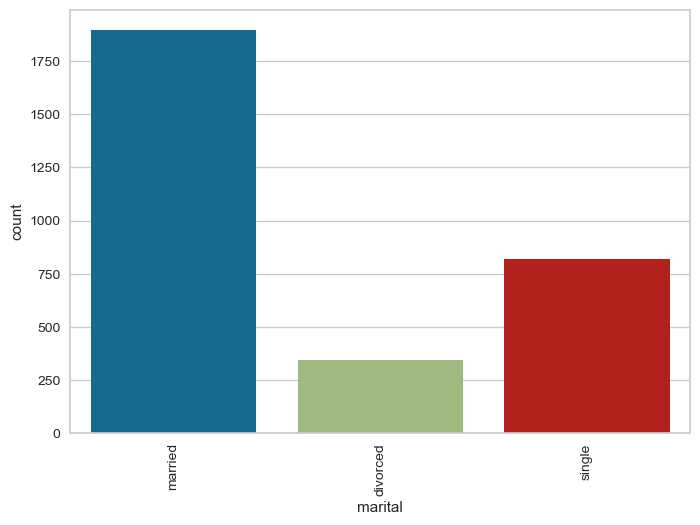

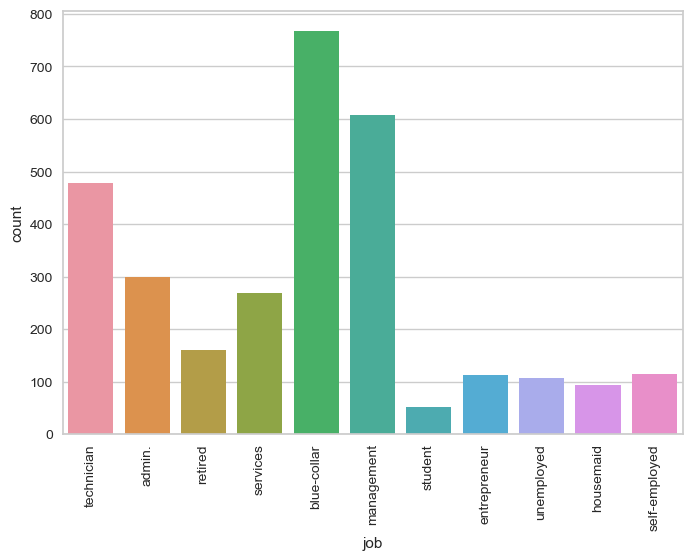

In [39]:
s=df_lab[(df_lab['kmean_dc']==2)&(df_lab['y']=='no')]
for i in ['default','housing','loan','marital','job']:
    sns.countplot(x=s[i])
    plt.xticks(rotation=90)
    plt.show()

In [40]:
df_lab[df_lab['kmean_full']==0].describe()

age        balance           day      duration      campaign  \
count  38209.000000   38209.000000  38209.000000  38209.000000  38209.000000   
mean      40.958832    1331.253186     16.136565    257.564841      2.886152   
std       10.530443    3030.854836      8.398727    261.088597      3.286456   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      60.000000      8.000000    102.000000      1.000000   
50%       39.000000     424.000000     17.000000    178.000000      2.000000   
75%       49.000000    1381.000000     22.000000    317.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous      kmean_ab      kmean_dc  kmean_full  \
count  38209.000000  38209.000000  38209.000000  38209.000000     38209.0   
mean       1.772828      0.055746      0.721218      0.290795         0.0   
std       16.323782      0.343005      0.595304      0.664083         0.0   
min       -1.000000      0.000000      0.000000      0.000000         0.0   
25%       -1.000000      0.000000      0.000000      0.000000         0.0   
50%       -1.000000      0.000000      1.000000      0.000000         0.0   
75%       -1.000000      0.000000      1.000000      0.000000         0.0   
max      172.000000      7.000000      3.000000      2.000000         0.0   

          kmode_opt     kmean_pca   kproto_full  
count  38209.000000  38209.000000  38209.000000  
mean       1.253788      0.004214      1.925070  
std        1.428155      0.064777      0.874154  
min        0.000000      0.000000      0.000000  
25%        0.000000      0.000000      1.000000  
50%        0.000000      0.000000      2.000000  
75%        3.000000      0.000000      3.000000  
max        3.000000      1.000000      3.000000

In [41]:
df_lab[df_lab['kmean_full']==0].describe(include=object)

job  marital  education default housing   loan  month      y
count         38209    38209      38209   38209   38209  38209  38209  38209
unique           11        3          3       2       2      2     12      2
top     blue-collar  married  secondary      no     yes     no    may     no
freq           8219    23162      20756   37447   20401  31967  11409  34404

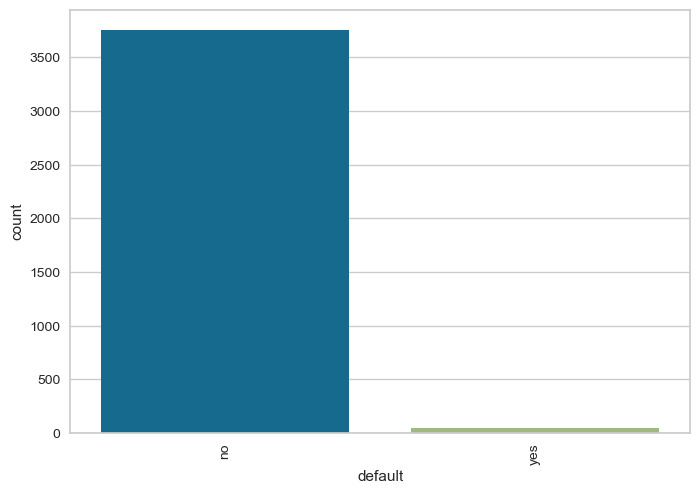

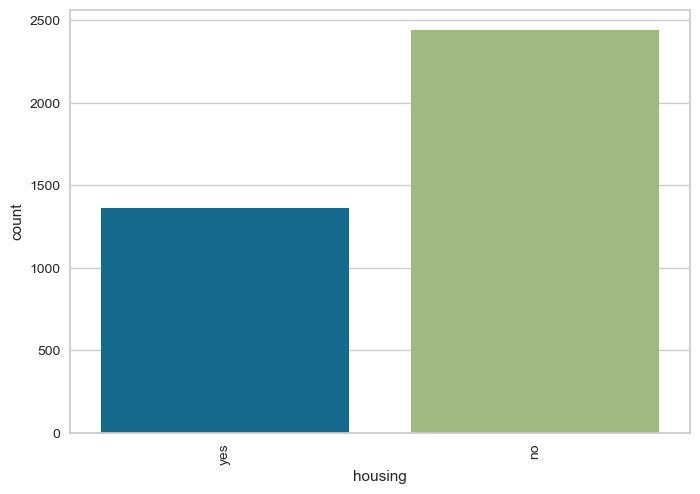

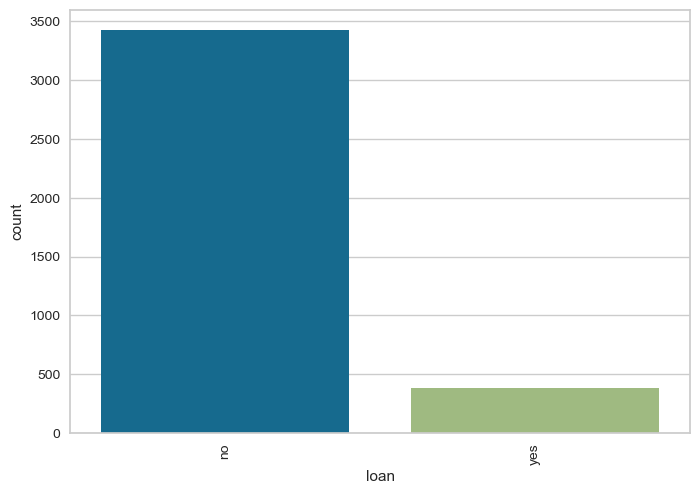

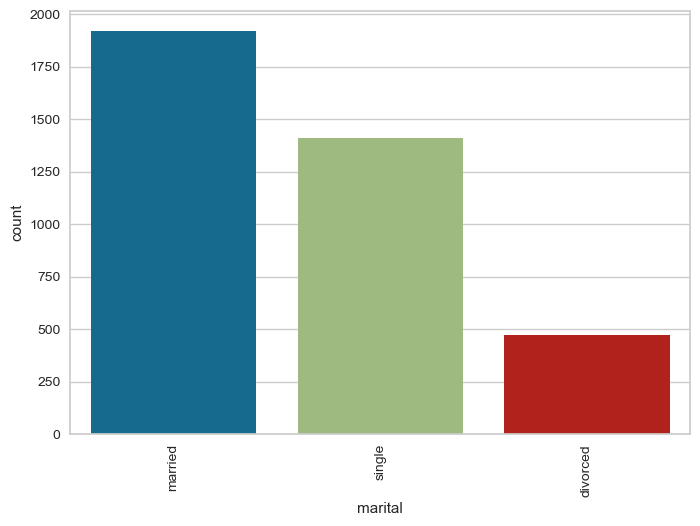

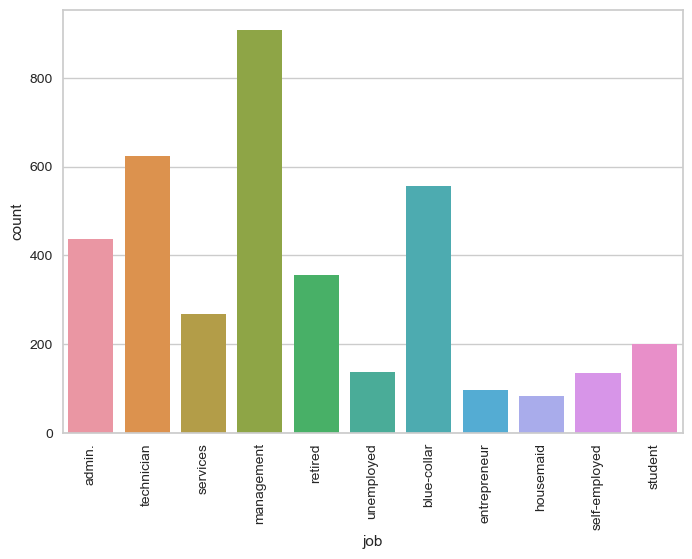

In [42]:
s=df_lab[(df_lab['kmean_full']==0)&(df_lab['y']=='yes')]
for i in ['default','housing','loan','marital','job']:
    sns.countplot(x=s[i])
    plt.xticks(rotation=90)
    plt.show()

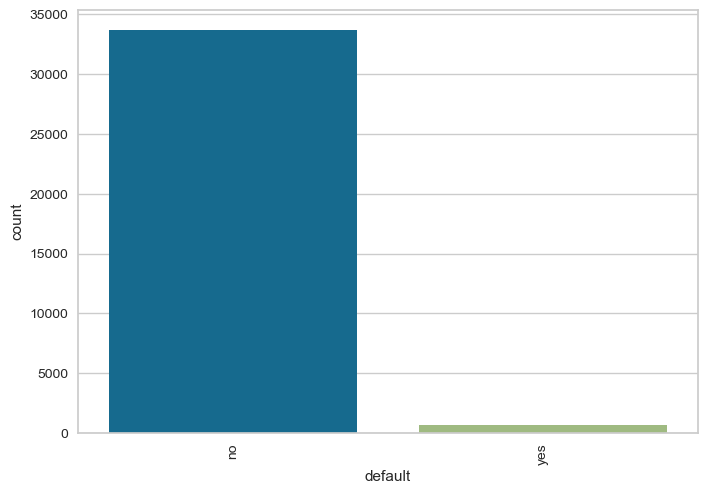

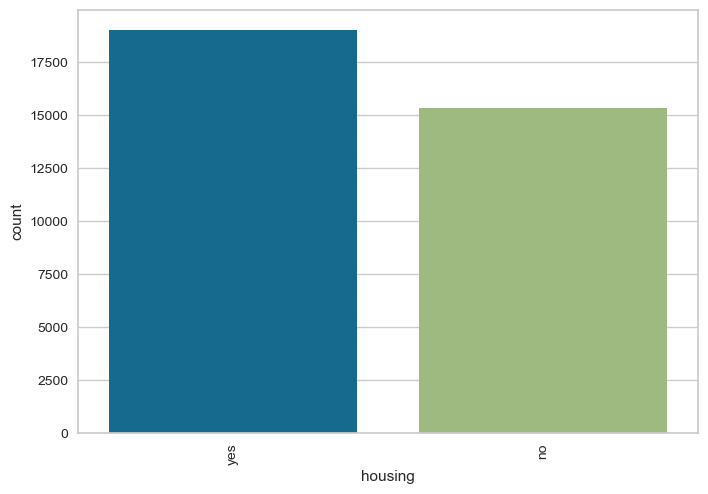

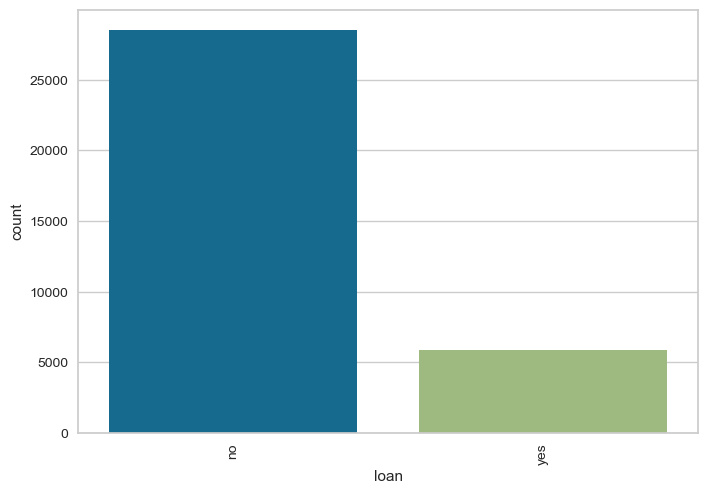

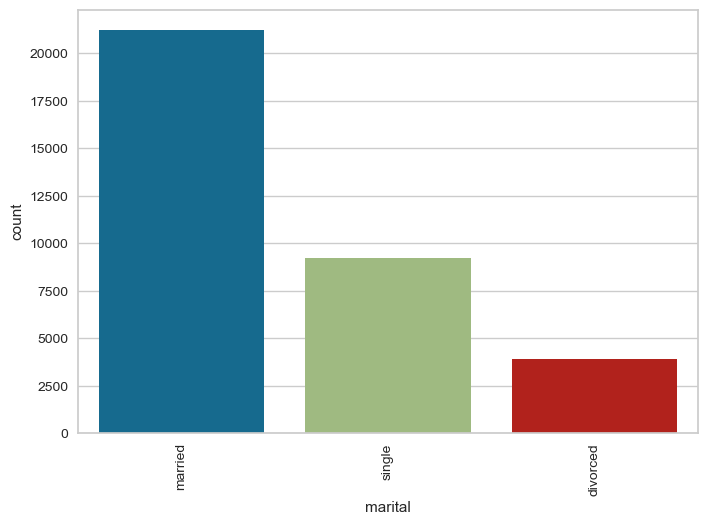

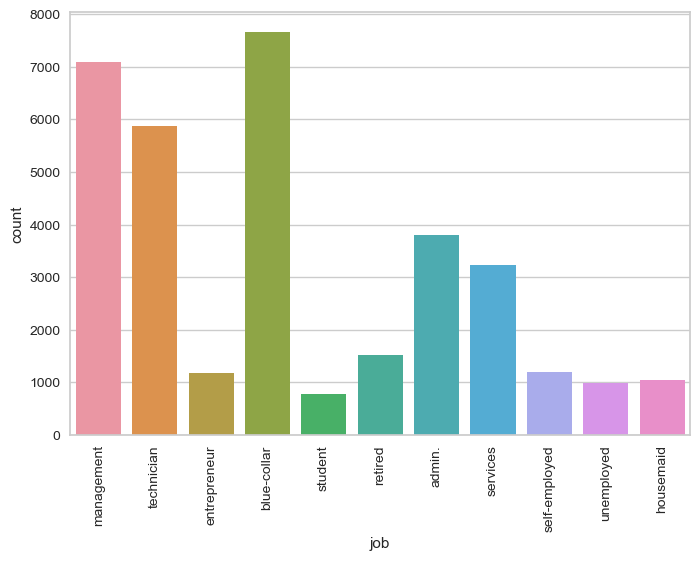

In [43]:
s=df_lab[(df_lab['kmean_full']==0)&(df_lab['y']=='no')]
for i in ['default','housing','loan','marital','job']:
    sns.countplot(x=s[i])
    plt.xticks(rotation=90)
    plt.show()

In [44]:
df_lab[df_lab['kmean_full']==1].describe()

age       balance          day     duration     campaign  \
count  7002.000000   7002.000000  7002.000000  7002.000000  7002.000000   
mean     40.812768   1531.537989    14.004856   261.427592     2.096401   
std      11.088286   3114.365739     7.646842   237.147972     1.583099   
min      18.000000  -1884.000000     1.000000     1.000000     1.000000   
25%      33.000000    154.250000     7.000000   112.000000     1.000000   
50%      38.000000    572.500000    14.000000   195.000000     2.000000   
75%      47.000000   1692.500000    19.000000   326.000000     2.000000   
max      93.000000  81204.000000    31.000000  2184.000000    16.000000   

             pdays     previous     kmean_ab     kmean_dc  kmean_full  \
count  7002.000000  7002.000000  7002.000000  7002.000000      7002.0   
mean    249.878035     3.442873     0.766495     0.248358         1.0   
std     106.105865     4.891213     0.593160     0.649031         0.0   
min       1.000000     1.000000     0.000000     0.000000         1.0   
25%     176.000000     1.000000     0.000000     0.000000         1.0   
50%     247.000000     2.000000     1.000000     0.000000         1.0   
75%     339.750000     4.000000     1.000000     0.000000         1.0   
max     871.000000   275.000000     3.000000     2.000000         1.0   

         kmode_opt    kmean_pca  kproto_full  
count  7002.000000  7002.000000       7002.0  
mean      0.909883     0.983005          0.0  
std       1.355428     0.129262          0.0  
min       0.000000     0.000000          0.0  
25%       0.000000     1.000000          0.0  
50%       0.000000     1.000000          0.0  
75%       3.000000     1.000000          0.0  
max       3.000000     1.000000          0.0

In [45]:
df_lab[df_lab['kmean_full']==1].describe(include=object)

job  marital  education default housing  loan month     y
count          7002     7002       7002    7002    7002  7002  7002  7002
unique           11        3          3       2       2     2    12     2
top     blue-collar  married  secondary      no     yes    no   may    no
freq           1513     4052       3901    6949    4729  6000  2357  5518

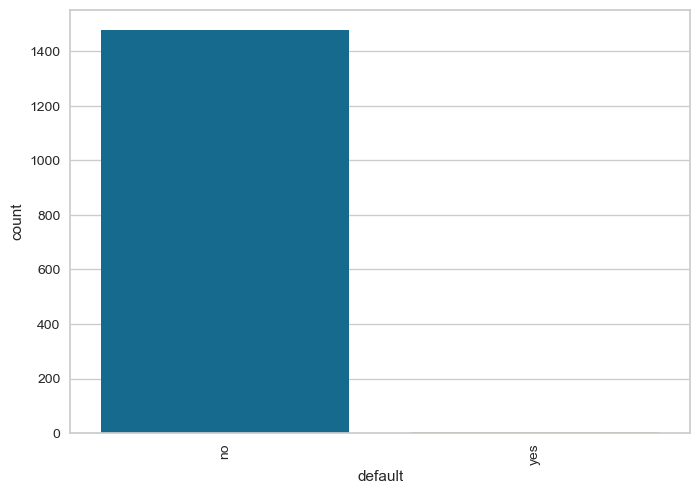

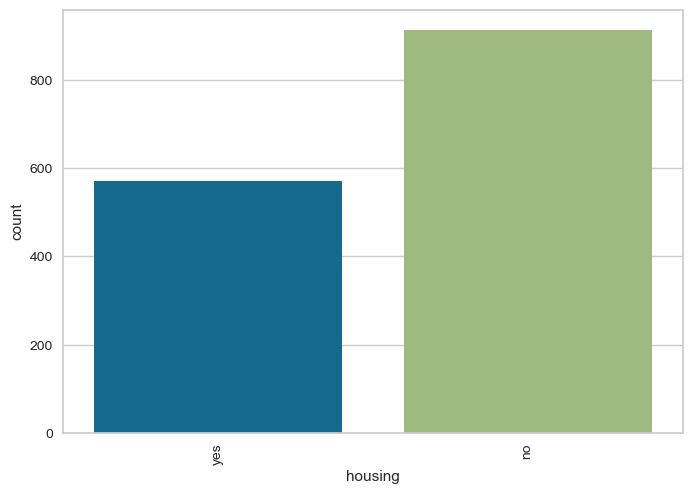

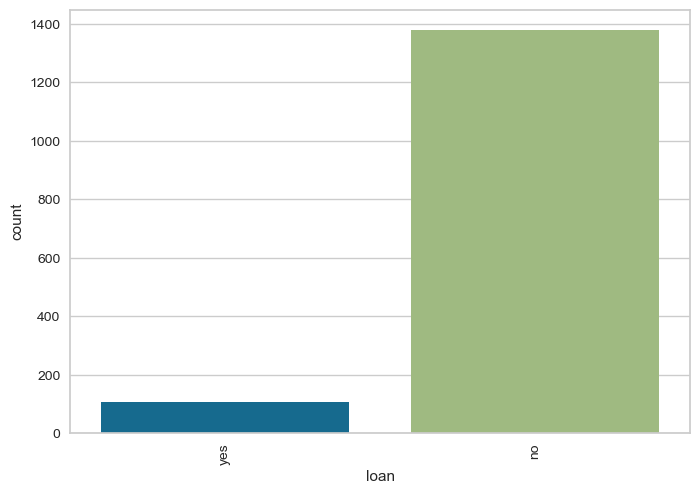

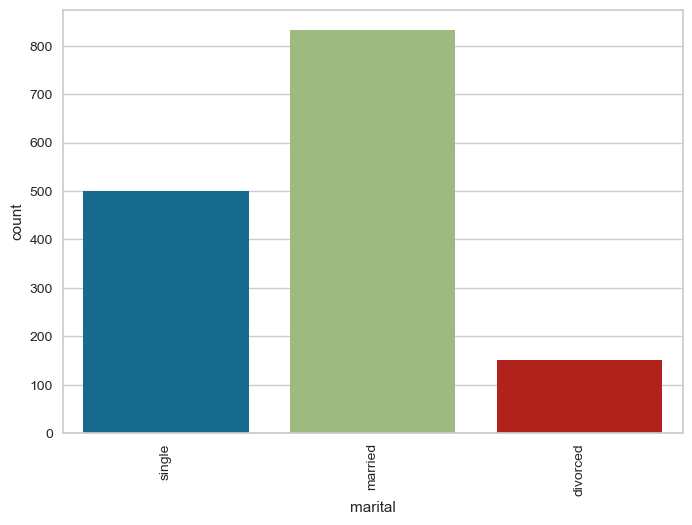

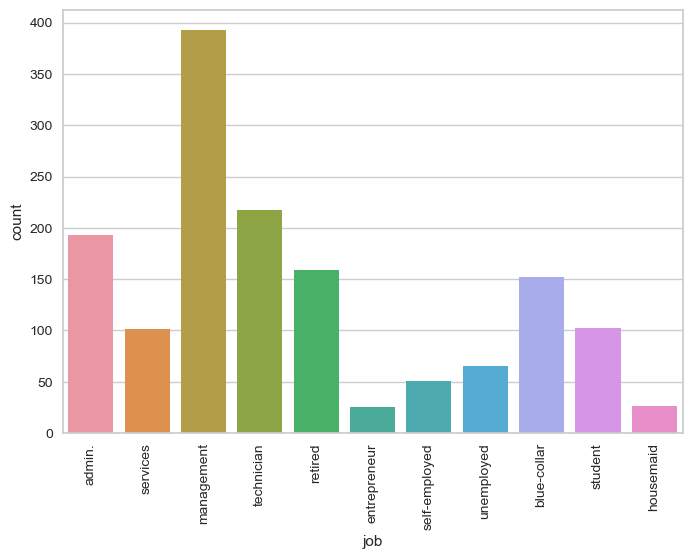

In [46]:
s=df_lab[(df_lab['kmean_full']==1)&(df_lab['y']=='yes')]
for i in ['default','housing','loan','marital','job']:
    sns.countplot(x=s[i])
    plt.xticks(rotation=90)
    plt.show()

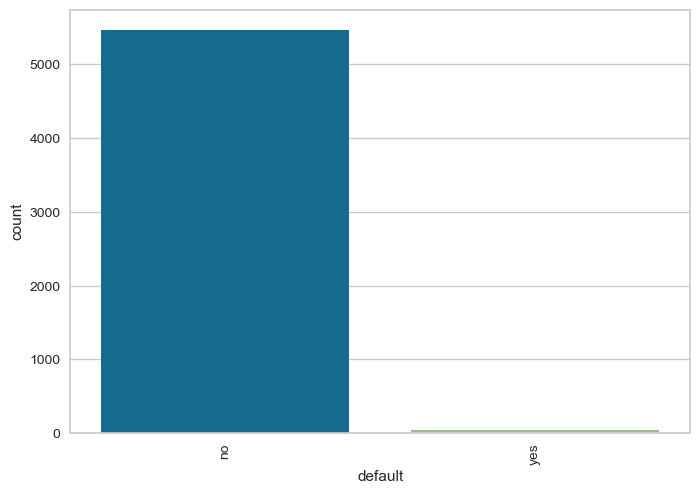

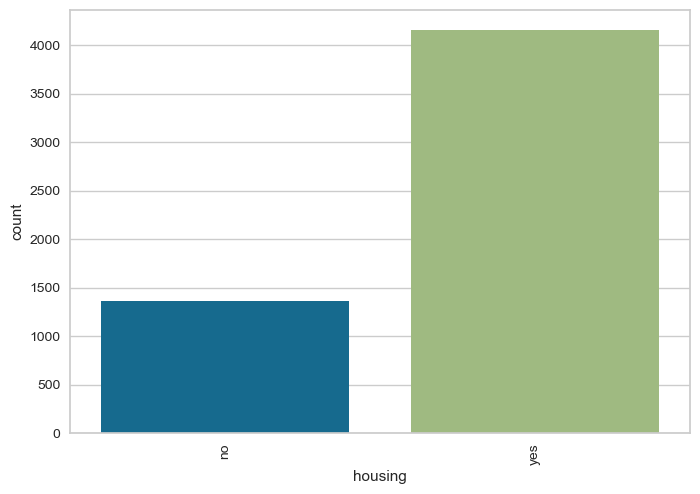

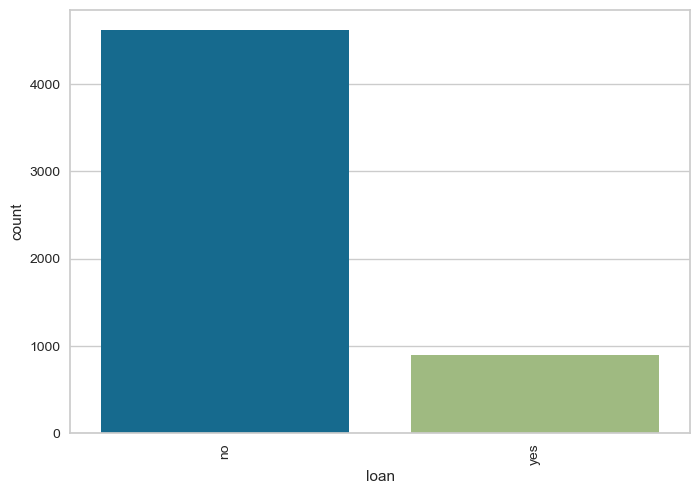

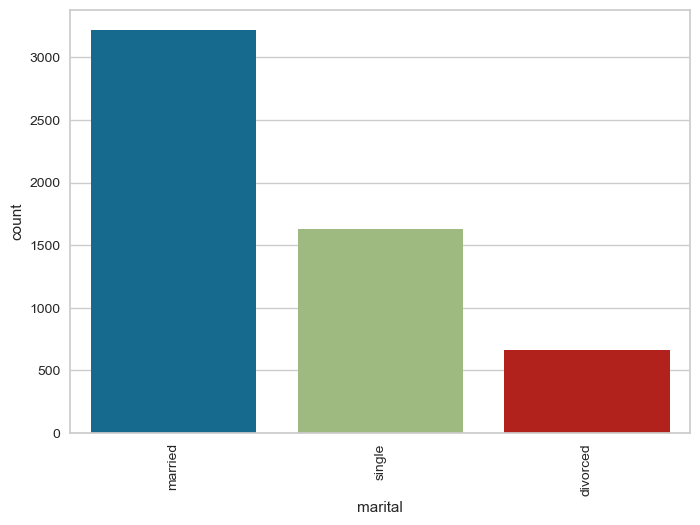

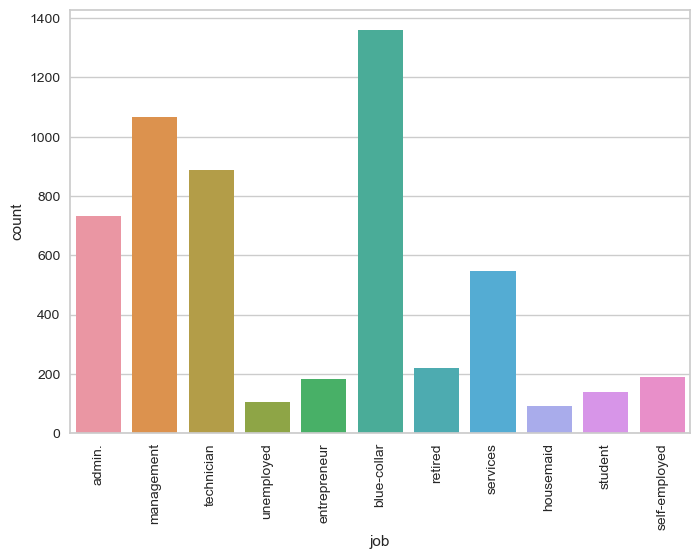

In [47]:
s=df_lab[(df_lab['kmean_full']==1)&(df_lab['y']=='no')]
for i in ['default','housing','loan','marital','job']:
    sns.countplot(x=s[i])
    plt.xticks(rotation=90)
    plt.show()

In [88]:
df_lab[df_lab['kmean_pca']==0].describe()

age        balance           day      duration      campaign  \
count  38167.000000   38167.000000  38167.000000  38167.000000  38167.000000   
mean      40.982970    1329.505201     16.170723    257.711872      2.888385   
std       10.524963    3026.353142      8.390026    261.528101      3.288319   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      59.000000      9.000000    102.000000      1.000000   
50%       39.000000     424.000000     17.000000    178.000000      2.000000   
75%       49.000000    1379.000000     22.000000    317.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous      kmean_ab      kmean_dc    kmean_full  \
count  38167.000000  38167.000000  38167.000000  38167.000000  38167.000000   
mean       1.937878      0.046873      0.720177      0.291456      0.003118   
std       17.785425      0.286152      0.595435      0.664682      0.055752   
min       -1.000000      0.000000      0.000000      0.000000      0.000000   
25%       -1.000000      0.000000      0.000000      0.000000      0.000000   
50%       -1.000000      0.000000      1.000000      0.000000      0.000000   
75%       -1.000000      0.000000      1.000000      0.000000      0.000000   
max      197.000000      5.000000      3.000000      2.000000      1.000000   

          kmode_opt  kmean_pca   kproto_full  
count  38167.000000    38167.0  38167.000000  
mean       1.249823        0.0      1.927188  
std        1.427297        0.0      0.872298  
min        0.000000        0.0      0.000000  
25%        0.000000        0.0      1.000000  
50%        0.000000        0.0      2.000000  
75%        3.000000        0.0      3.000000  
max        3.000000        0.0      3.000000

In [49]:
df_lab[df_lab['kmean_pca']==0].describe(include=object)

job  marital  education default housing   loan  month      y
count         38167    38167      38167   38167   38167  38167  38167  38167
unique           11        3          3       2       2      2     12      2
top     blue-collar  married  secondary      no     yes     no    may     no
freq           8240    23162      20749   37405   20423  31904  11384  34407

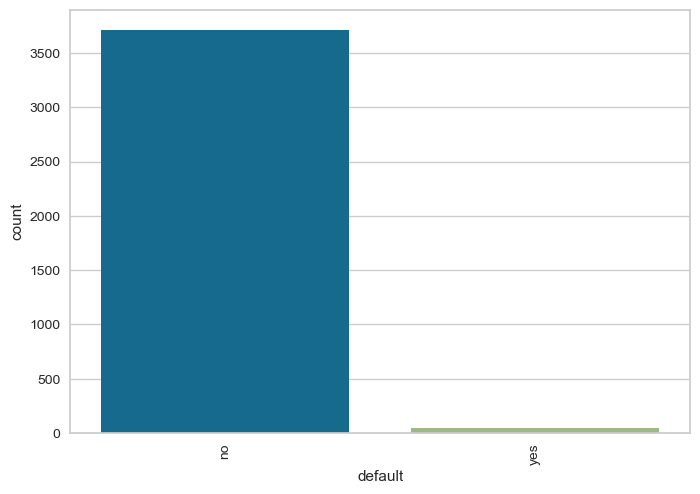

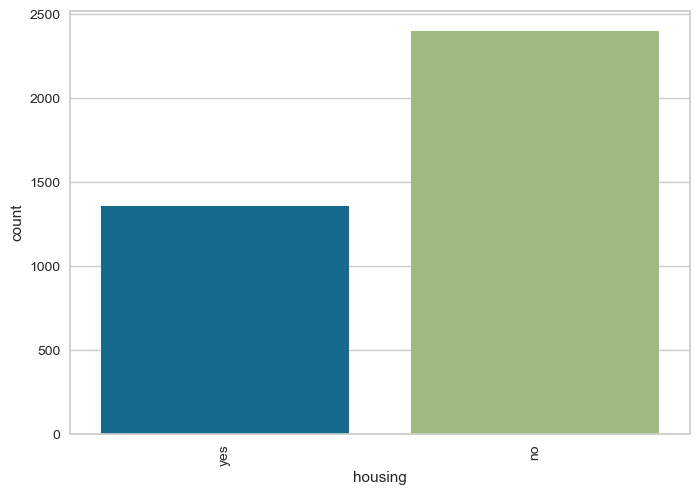

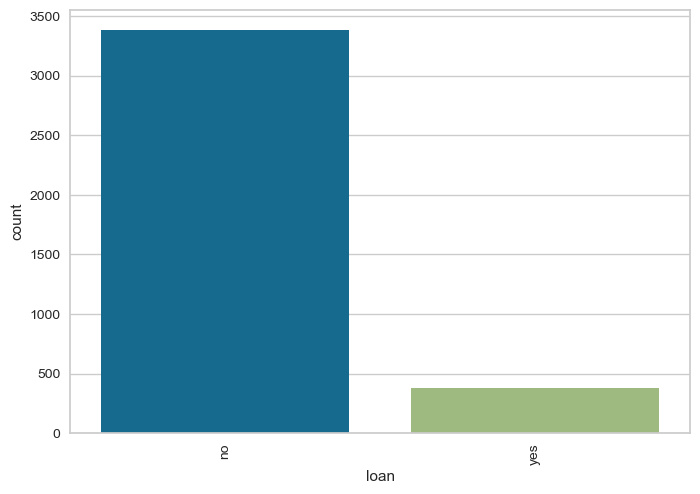

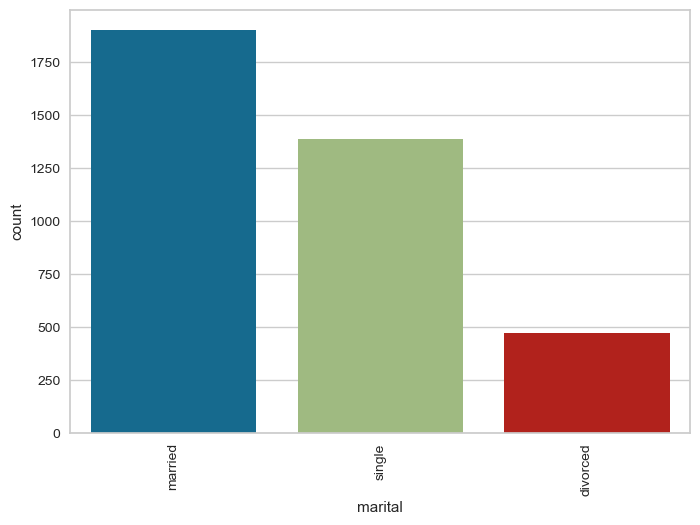

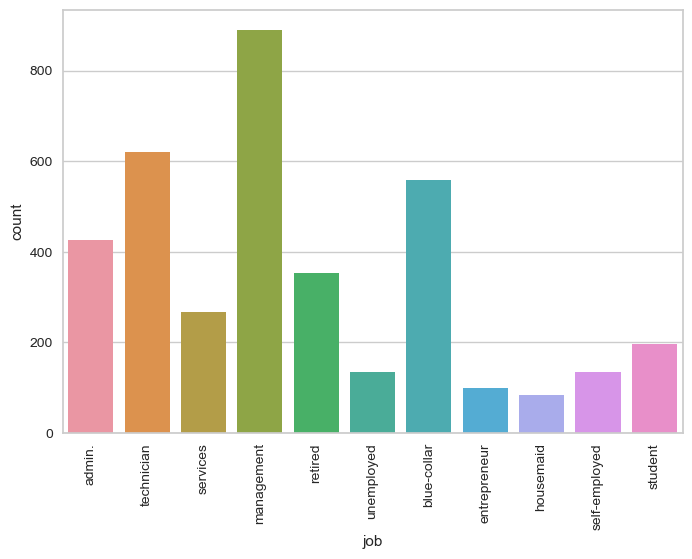

In [50]:
s=df_lab[(df_lab['kmean_pca']==0)&(df_lab['y']=='yes')]
for i in ['default','housing','loan','marital','job']:
    sns.countplot(x=s[i])
    plt.xticks(rotation=90)
    plt.show()

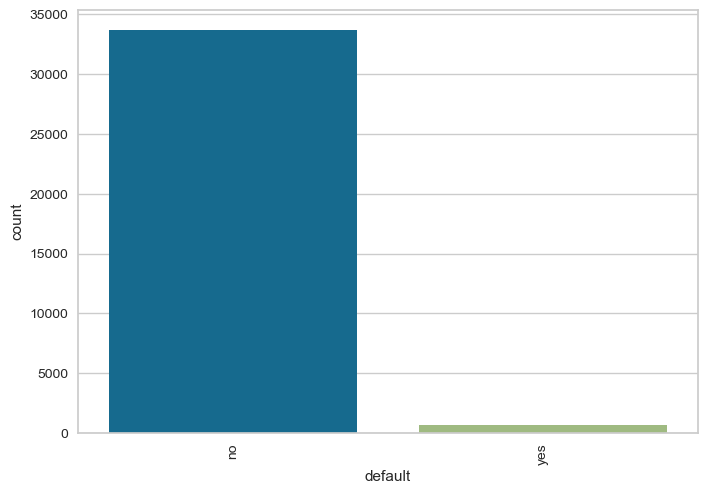

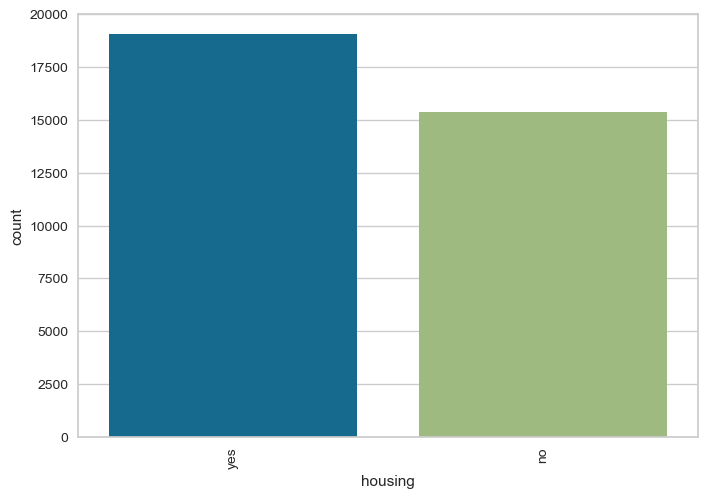

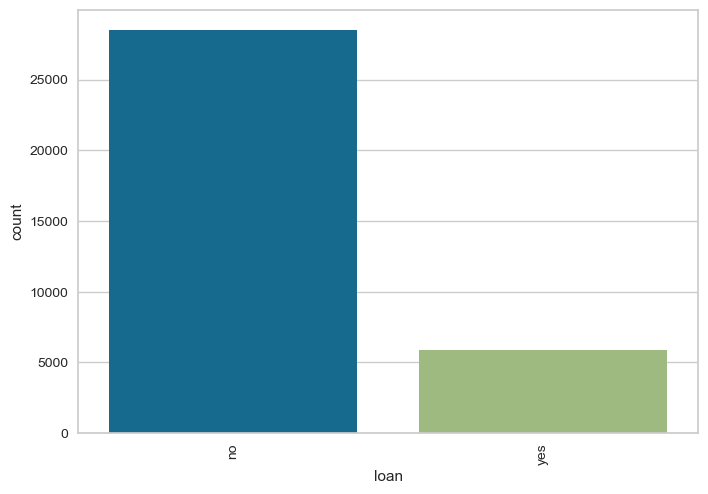

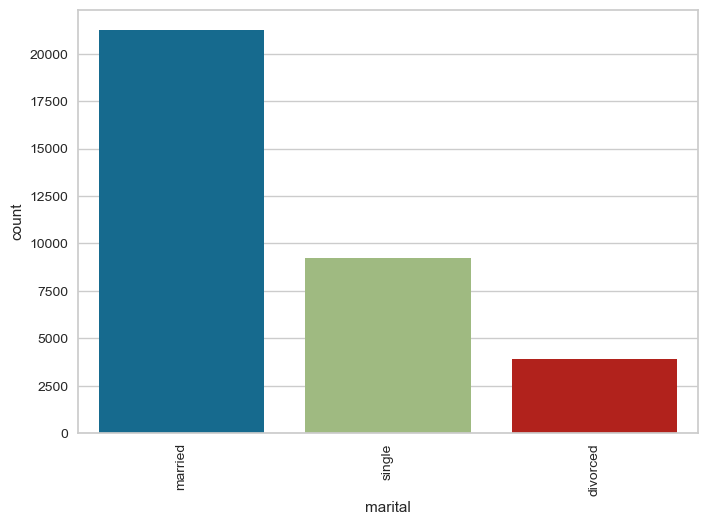

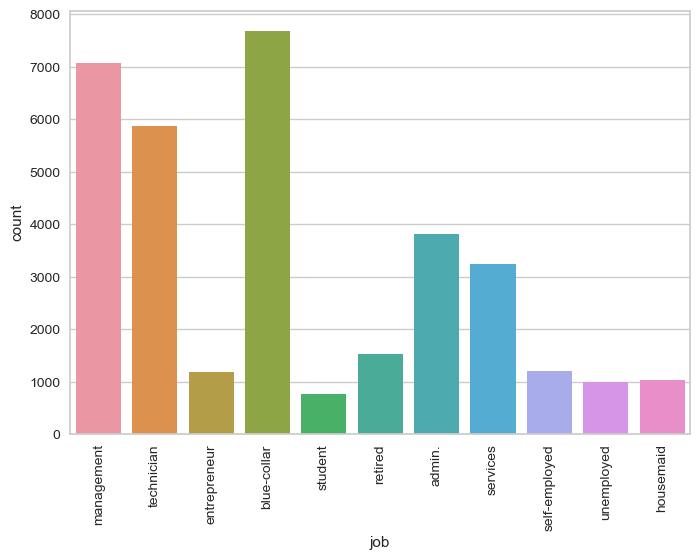

In [51]:
s=df_lab[(df_lab['kmean_pca']==0)&(df_lab['y']=='no')]
for i in ['default','housing','loan','marital','job']:
    sns.countplot(x=s[i])
    plt.xticks(rotation=90)
    plt.show()

In [52]:
df_lab[df_lab['kmean_pca']==1].describe()

age       balance          day     duration     campaign  \
count  7044.000000   7044.000000  7044.000000  7044.000000  7044.000000   
mean     40.682851   1539.815020    13.832482   260.607893     2.089012   
std      11.110596   3136.931123     7.651117   234.672207     1.572842   
min      18.000000  -1884.000000     1.000000     1.000000     1.000000   
25%      33.000000    154.000000     7.000000   112.750000     1.000000   
50%      38.000000    572.500000    14.000000   195.000000     2.000000   
75%      47.000000   1687.750000    19.000000   325.000000     2.000000   
max      93.000000  81204.000000    31.000000  2184.000000    16.000000   

             pdays     previous     kmean_ab     kmean_dc   kmean_full  \
count  7044.000000  7044.000000  7044.000000  7044.000000  7044.000000   
mean    247.504401     3.470755     0.771863     0.245031     0.977144   
std     108.295258     4.870042     0.592008     0.645551     0.149456   
min       1.000000     1.000000     0.000000     0.000000     0.000000   
25%     175.000000     1.000000     0.000000     0.000000     1.000000   
50%     246.000000     2.000000     1.000000     0.000000     1.000000   
75%     339.000000     4.000000     1.000000     0.000000     1.000000   
max     871.000000   275.000000     3.000000     2.000000     1.000000   

         kmode_opt  kmean_pca  kproto_full  
count  7044.000000     7044.0       7044.0  
mean      0.933419        1.0          0.0  
std       1.366200        0.0          0.0  
min       0.000000        1.0          0.0  
25%       0.000000        1.0          0.0  
50%       0.000000        1.0          0.0  
75%       3.000000        1.0          0.0  
max       3.000000        1.0          0.0

In [53]:
df_lab[df_lab['kmean_pca']==1].describe(include=object)

job  marital  education default housing  loan month     y
count         7044     7044       7044    7044    7044  7044  7044  7044
unique          11        3          3       2       2     2    12     2
top     management  married  secondary      no     yes    no   may    no
freq          1493     4052       3908    6991    4707  6063  2382  5515

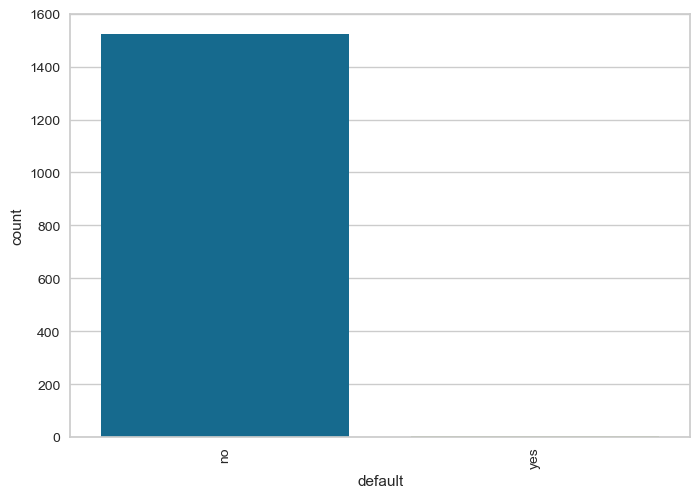

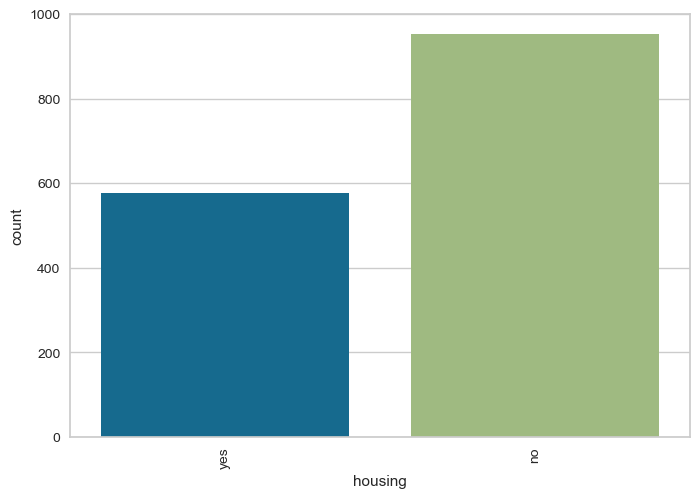

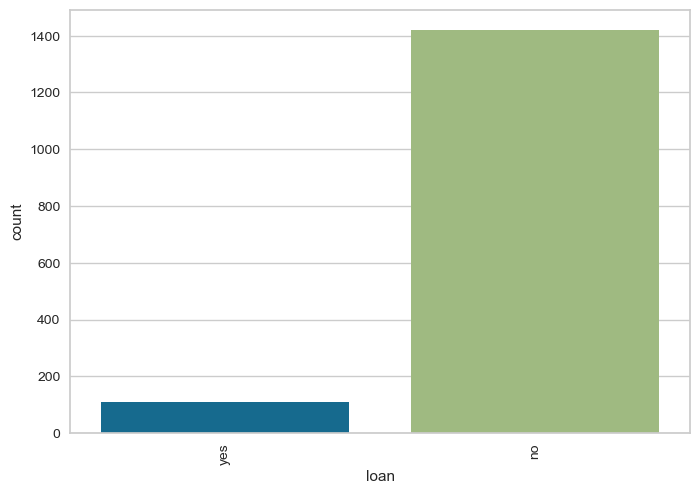

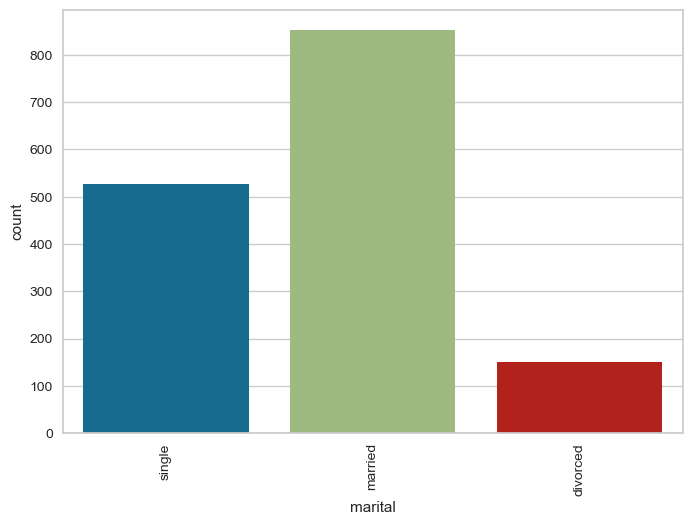

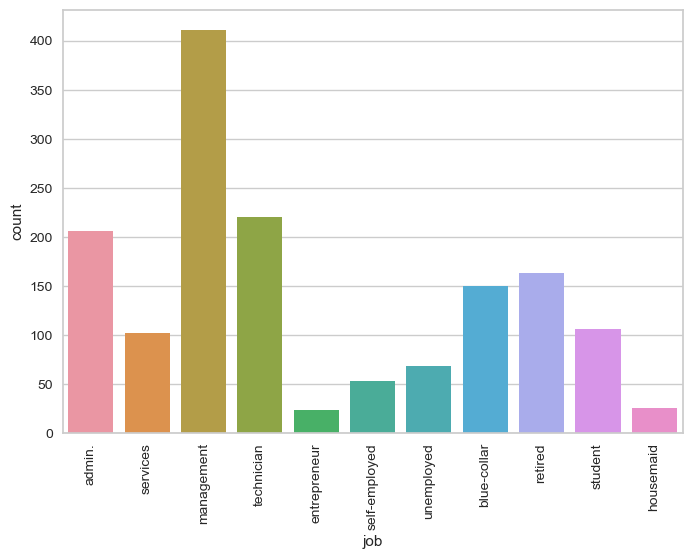

In [54]:
s=df_lab[(df_lab['kmean_pca']==1)&(df_lab['y']=='yes')]
for i in ['default','housing','loan','marital','job']:
    sns.countplot(x=s[i])
    plt.xticks(rotation=90)
    plt.show()

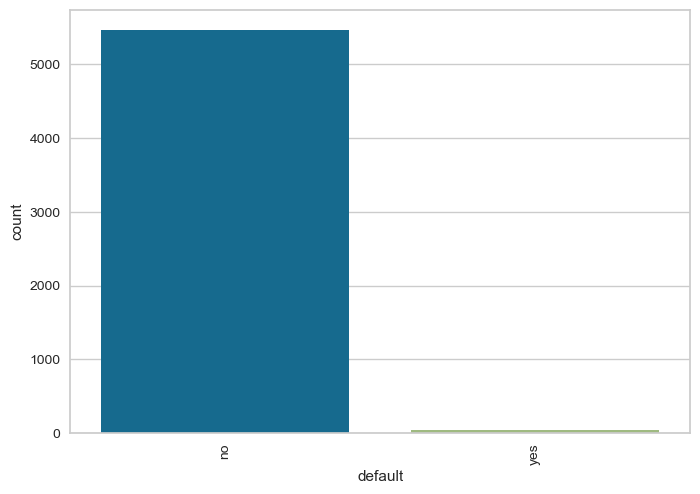

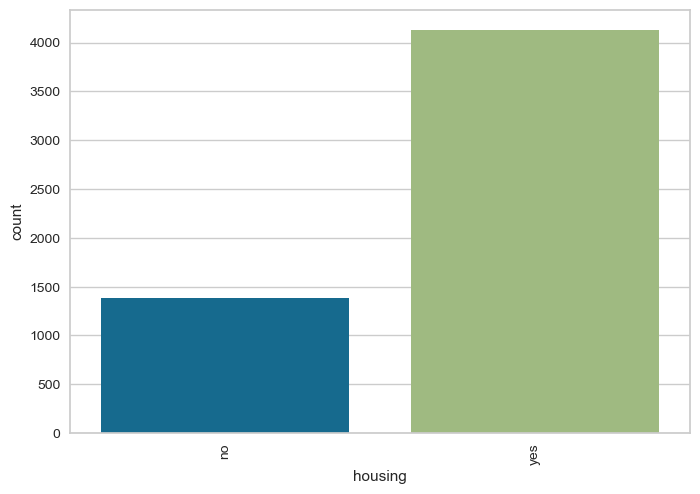

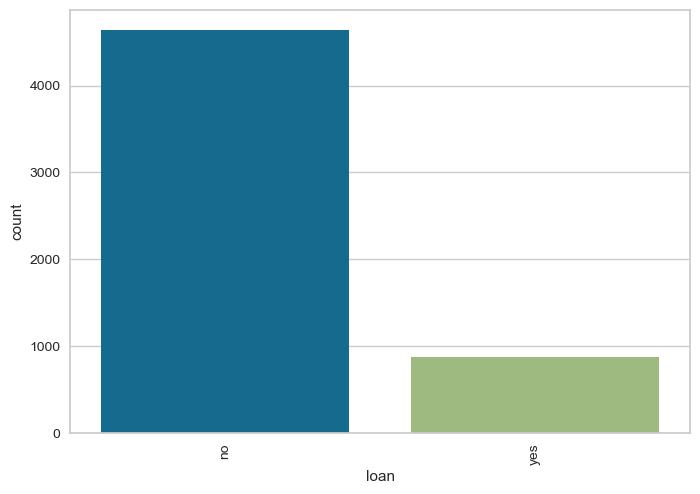

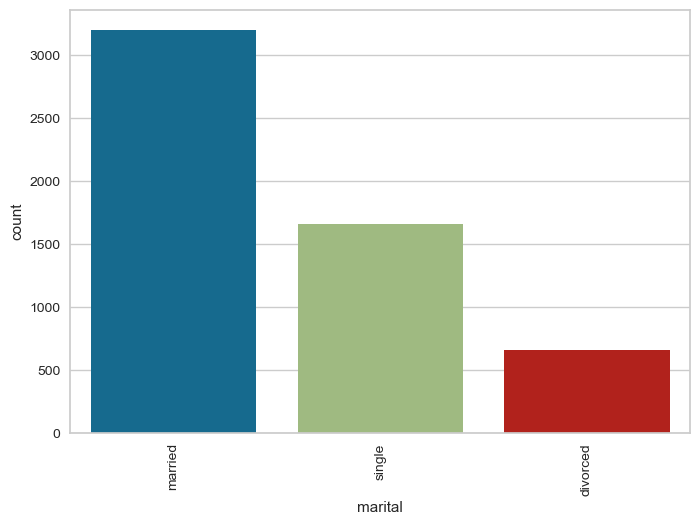

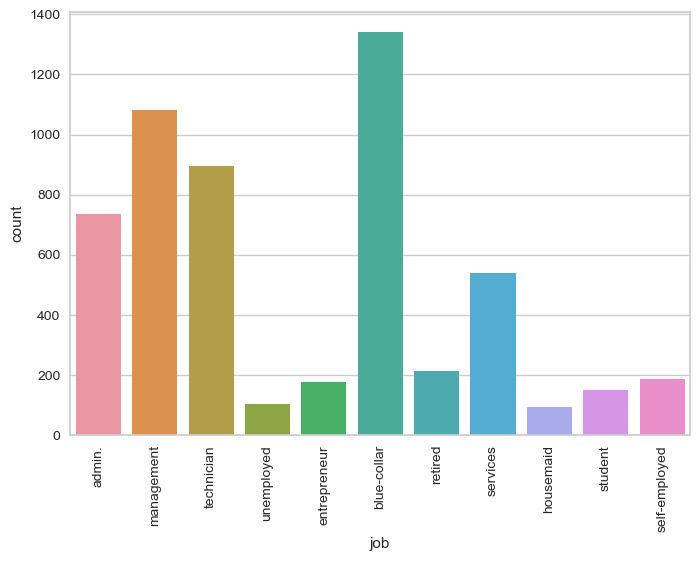

In [55]:
s=df_lab[(df_lab['kmean_pca']==1)&(df_lab['y']=='no')]
for i in ['default','housing','loan','marital','job']:
    sns.countplot(x=s[i])
    plt.xticks(rotation=90)
    plt.show()

In [56]:
df_lab[df_lab['kmode_opt']==0].describe()

age       balance           day      duration      campaign  \
count  25130.000000  25130.000000  25130.000000  25130.000000  25130.000000   
mean      39.175288   1175.103064     15.598249    259.331476      2.698488   
std        8.926807   2483.285761      8.026836    258.321907      3.140979   
min       20.000000  -4057.000000      1.000000      0.000000      1.000000   
25%       32.000000     62.000000      8.000000    103.000000      1.000000   
50%       38.000000    412.000000     15.000000    182.000000      2.000000   
75%       45.000000   1257.750000     21.000000    318.000000      3.000000   
max       78.000000  58544.000000     31.000000   4918.000000     63.000000   

              pdays      previous      kmean_ab      kmean_dc    kmean_full  \
count  25130.000000  25130.000000  25130.000000  25130.000000  25130.000000   
mean      51.312495      0.656665      0.782730      0.284282      0.188181   
std      113.862848      2.707428      0.550802      0.665192      0.390865   
min       -1.000000      0.000000      0.000000      0.000000      0.000000   
25%       -1.000000      0.000000      0.000000      0.000000      0.000000   
50%       -1.000000      0.000000      1.000000      0.000000      0.000000   
75%       -1.000000      0.000000      1.000000      0.000000      0.000000   
max      854.000000    275.000000      3.000000      2.000000      1.000000   

       kmode_opt     kmean_pca   kproto_full  
count    25130.0  25130.000000  25130.000000  
mean         0.0      0.187306      1.473498  
std          0.0      0.390165      1.032576  
min          0.0      0.000000      0.000000  
25%          0.0      0.000000      1.000000  
50%          0.0      0.000000      1.000000  
75%          0.0      0.000000      2.000000  
max          0.0      1.000000      3.000000

In [57]:
df_lab[df_lab['kmode_opt']==0].describe(include=object)

job  marital  education default housing   loan  month      y
count         25130    25130      25130   25130   25130  25130  25130  25130
unique           11        3          3       2       1      2     12      2
top     blue-collar  married  secondary      no     yes     no    may     no
freq           7048    15321      14689   24695   25130  20763  12076  23195

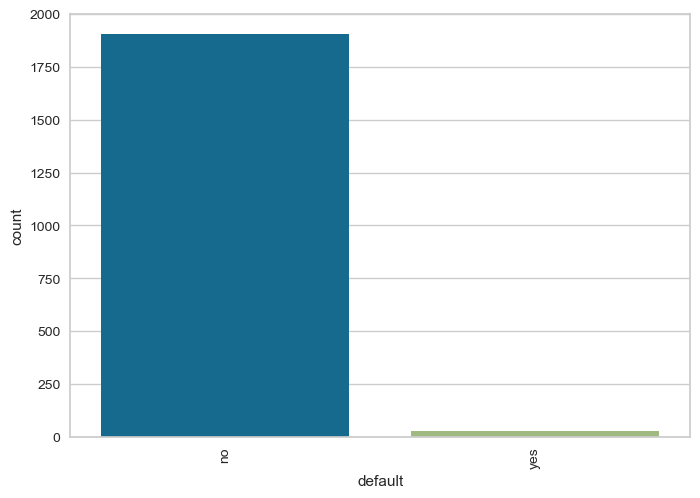

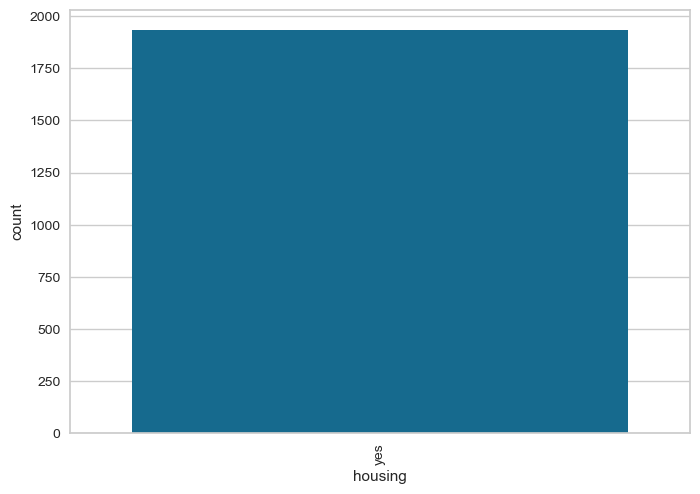

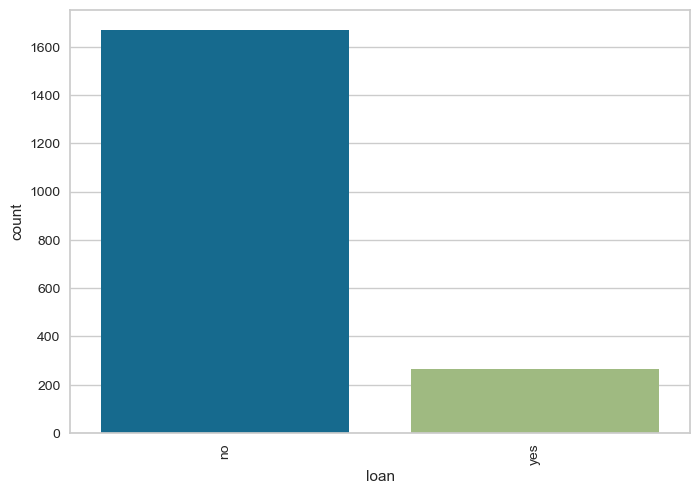

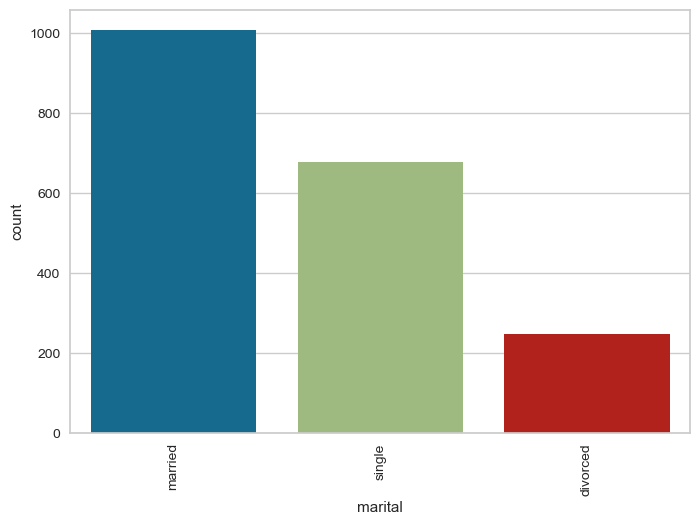

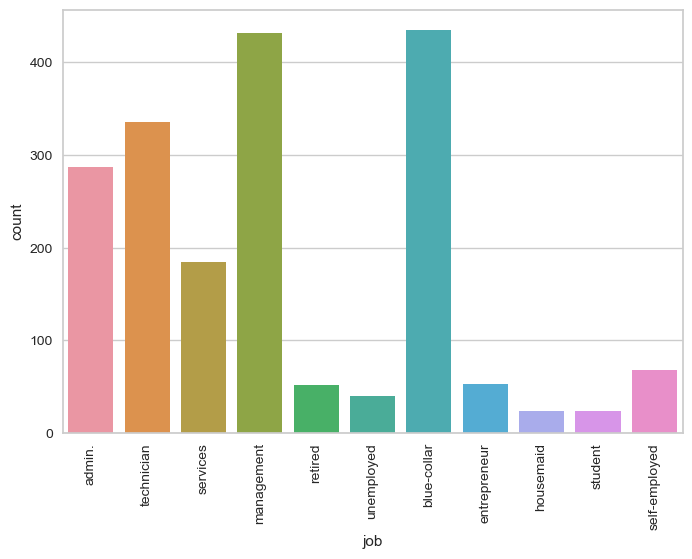

In [58]:
s=df_lab[(df_lab['kmode_opt']==0)&(df_lab['y']=='yes')]
for i in ['default','housing','loan','marital','job']:
    sns.countplot(x=s[i])
    plt.xticks(rotation=90)
    plt.show()

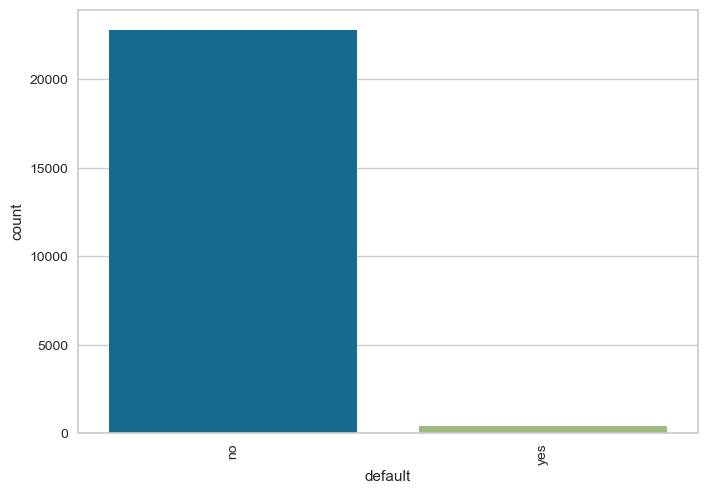

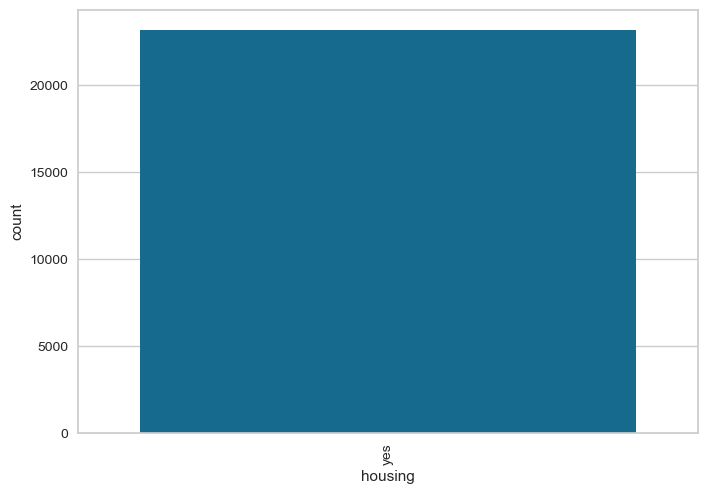

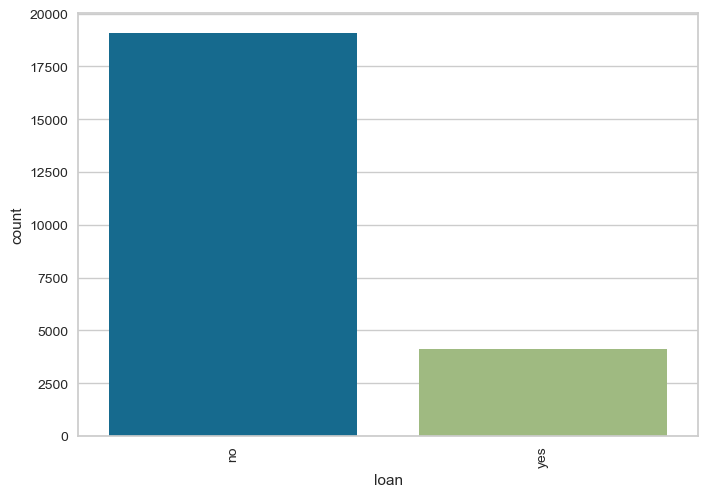

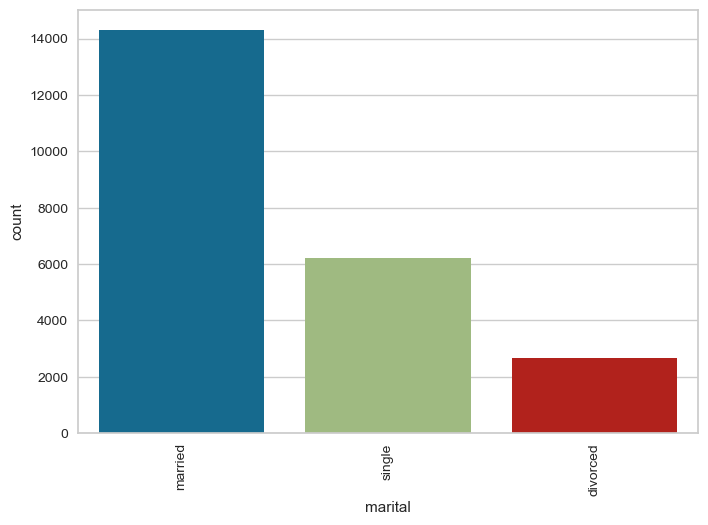

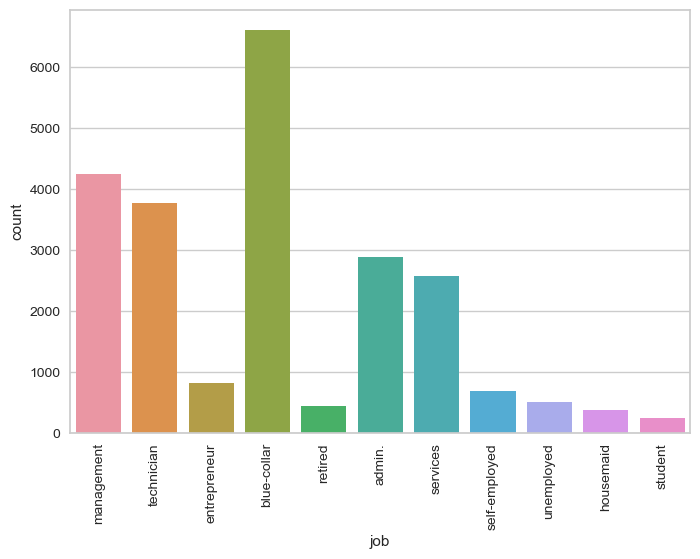

In [59]:
s=df_lab[(df_lab['kmode_opt']==0)&(df_lab['y']=='no')]
for i in ['default','housing','loan','marital','job']:
    sns.countplot(x=s[i])
    plt.xticks(rotation=90)
    plt.show()

In [60]:
df_lab[df_lab['kmode_opt']==1].describe()

age       balance          day     duration     campaign  \
count  2877.000000   2877.000000  2877.000000  2877.000000  2877.000000   
mean     42.417449    752.713243    16.093848   249.387209     2.980188   
std      10.454512   1980.329152     8.616877   254.098149     3.379347   
min      20.000000  -8019.000000     1.000000     4.000000     1.000000   
25%      33.000000      5.000000     8.000000   102.000000     1.000000   
50%      43.000000    230.000000    17.000000   171.000000     2.000000   
75%      52.000000    793.000000    23.000000   305.000000     3.000000   
max      72.000000  51439.000000    31.000000  3422.000000    36.000000   

             pdays     previous     kmean_ab     kmean_dc   kmean_full  \
count  2877.000000  2877.000000  2877.000000  2877.000000  2877.000000   
mean     16.828989     0.328120     0.559958     0.289538     0.076816   
std      66.614938     1.452332     0.555947     0.660271     0.266346   
min      -1.000000     0.000000     0.000000     0.000000     0.000000   
25%      -1.000000     0.000000     0.000000     0.000000     0.000000   
50%      -1.000000     0.000000     1.000000     0.000000     0.000000   
75%      -1.000000     0.000000     1.000000     0.000000     0.000000   
max     808.000000    29.000000     3.000000     2.000000     1.000000   

       kmode_opt    kmean_pca  kproto_full  
count     2877.0  2877.000000  2877.000000  
mean         1.0     0.074731     1.923531  
std          0.0     0.263002     0.992877  
min          1.0     0.000000     0.000000  
25%          1.0     0.000000     1.000000  
50%          1.0     0.000000     2.000000  
75%          1.0     0.000000     3.000000  
max          1.0     1.000000     3.000000

In [61]:
df_lab[df_lab['kmode_opt']==1].describe(include=object)

job  marital  education default housing  loan month     y
count          2877     2877       2877    2877    2877  2877  2877  2877
unique           11        3          3       2       1     1    12     2
top     blue-collar  married  secondary      no      no   yes   jul    no
freq            551     1689       1690    2709    2877  2877  1363  2658

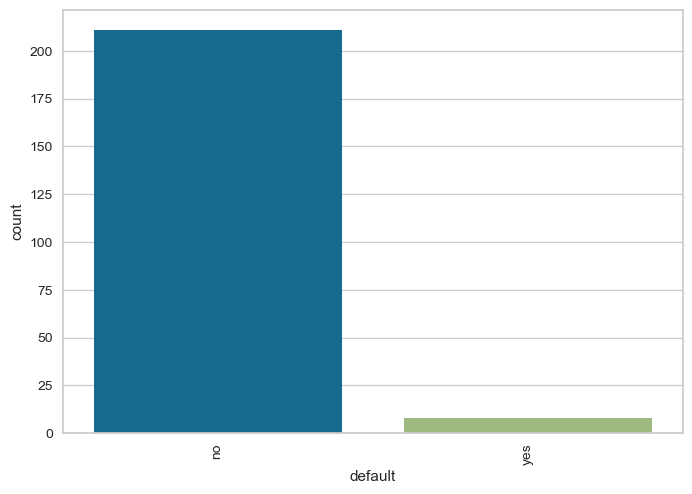

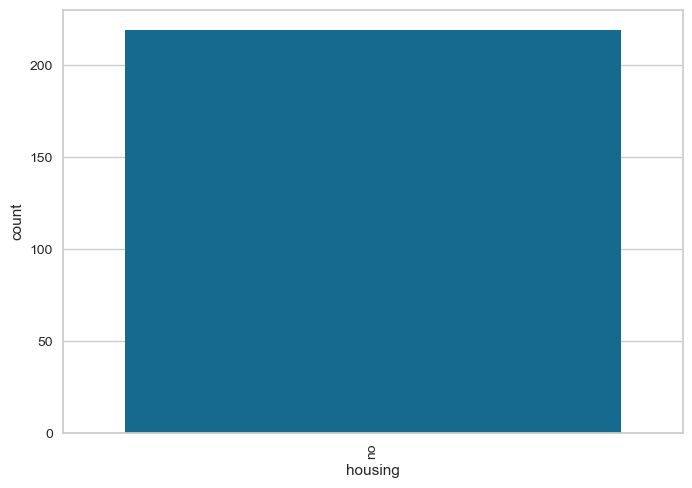

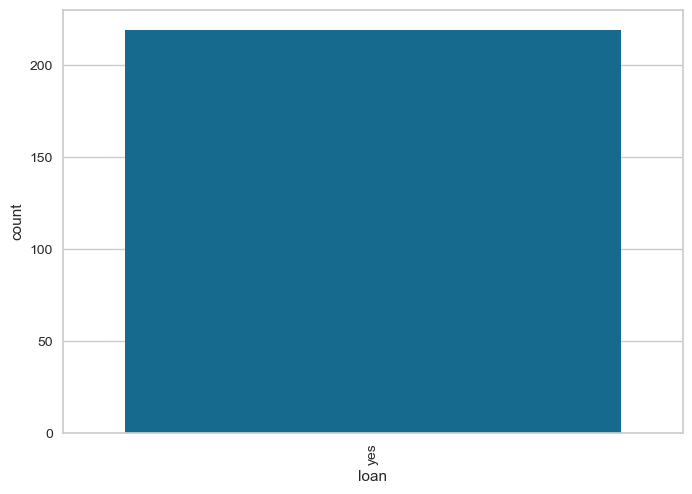

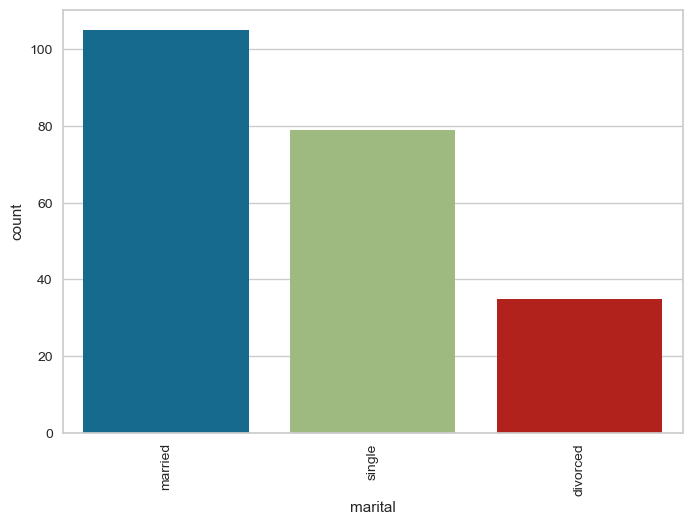

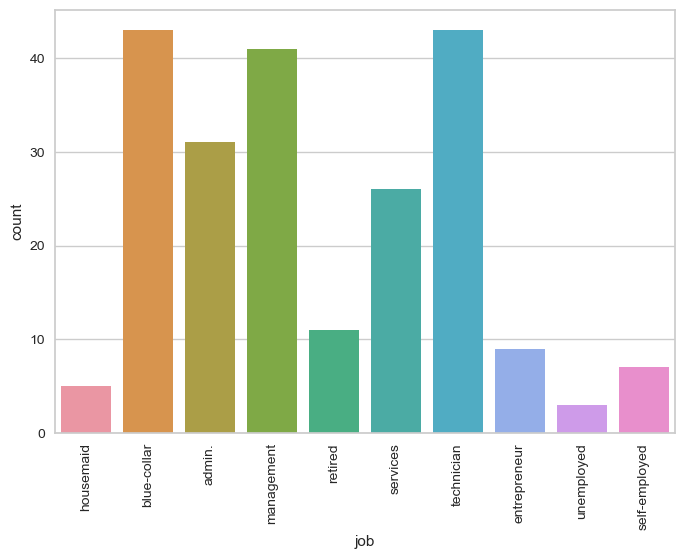

In [62]:
s=df_lab[(df_lab['kmode_opt']==1)&(df_lab['y']=='yes')]
for i in ['default','housing','loan','marital','job']:
    sns.countplot(x=s[i])
    plt.xticks(rotation=90)
    plt.show()

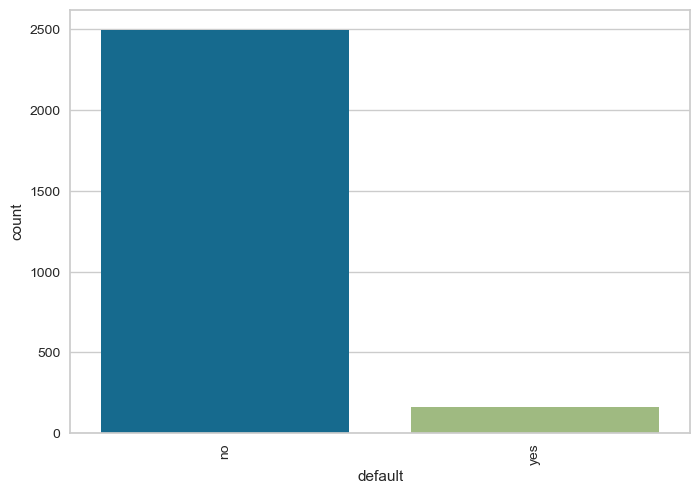

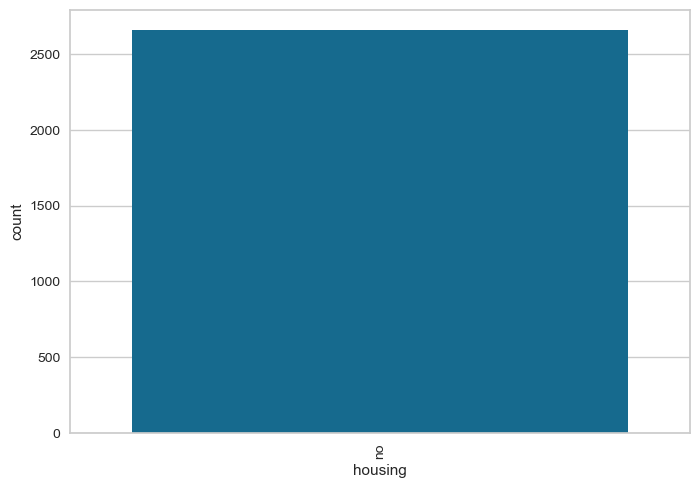

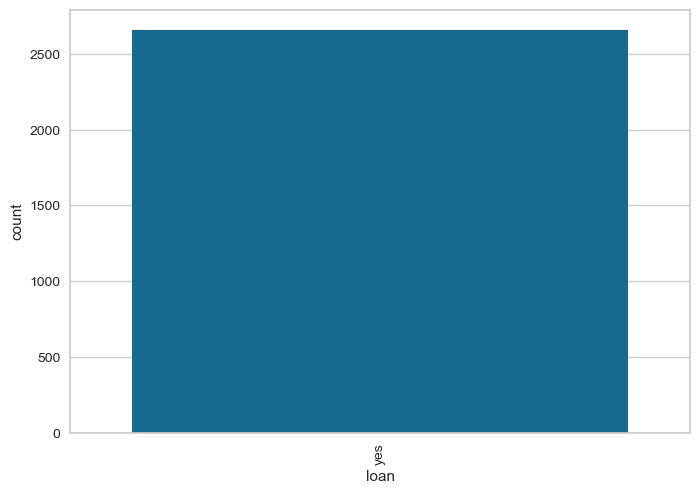

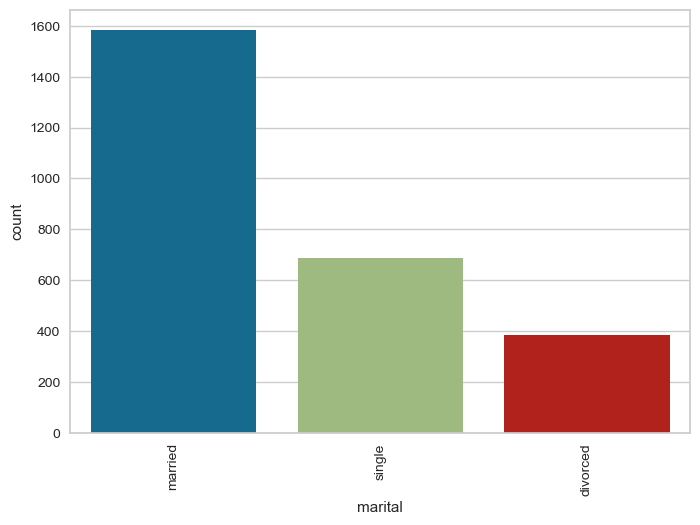

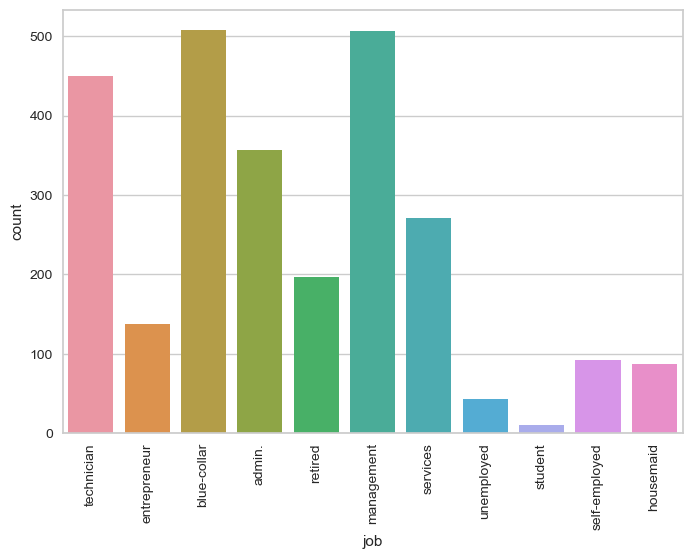

In [63]:
s=df_lab[(df_lab['kmode_opt']==1)&(df_lab['y']=='no')]
for i in ['default','housing','loan','marital','job']:
    sns.countplot(x=s[i])
    plt.xticks(rotation=90)
    plt.show()

In [64]:
df_lab[df_lab['kmode_opt']==2].describe()

age      balance         day     duration    campaign  \
count  212.000000   212.000000  212.000000   212.000000  212.000000   
mean    41.481132   -17.514151   17.495283   229.235849    3.231132   
std      8.913200   386.827190    8.616361   214.115177    3.179969   
min     21.000000 -1968.000000    2.000000     5.000000    1.000000   
25%     34.000000   -18.500000    9.000000    90.500000    1.000000   
50%     40.000000     0.000000   19.000000   151.500000    2.000000   
75%     48.000000    26.000000   25.250000   304.250000    4.000000   
max     60.000000  2262.000000   31.000000  1558.000000   22.000000   

            pdays    previous    kmean_ab    kmean_dc  kmean_full  kmode_opt  \
count  212.000000  212.000000  212.000000  212.000000  212.000000      212.0   
mean     5.858491    0.117925    0.608491    0.231132    0.028302        2.0   
std     37.655444    0.754299    0.489243    0.566332    0.166226        0.0   
min     -1.000000    0.000000    0.000000    0.000000    0.000000        2.0   
25%     -1.000000    0.000000    0.000000    0.000000    0.000000        2.0   
50%     -1.000000    0.000000    1.000000    0.000000    0.000000        2.0   
75%     -1.000000    0.000000    1.000000    0.000000    0.000000        2.0   
max    332.000000    8.000000    1.000000    2.000000    1.000000        2.0   

        kmean_pca  kproto_full  
count  212.000000   212.000000  
mean     0.028302     2.174528  
std      0.166226     0.904288  
min      0.000000     0.000000  
25%      0.000000     1.000000  
50%      0.000000     2.000000  
75%      0.000000     3.000000  
max      1.000000     3.000000

In [65]:
df_lab[df_lab['kmode_opt']==2].describe(include=object)

job  marital  education default housing loan month    y
count          212      212        212     212     212  212   212  212
unique          11        3          3       1       1    1     8    2
top     management  married  secondary     yes      no   no   aug   no
freq            44      118        124     212     212  212    63  197

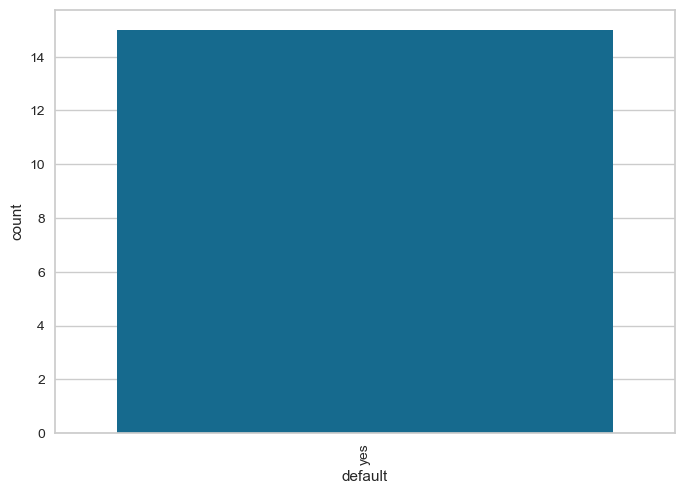

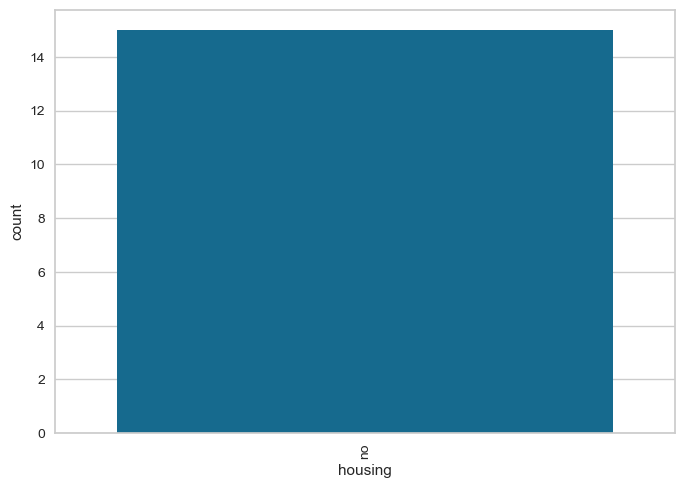

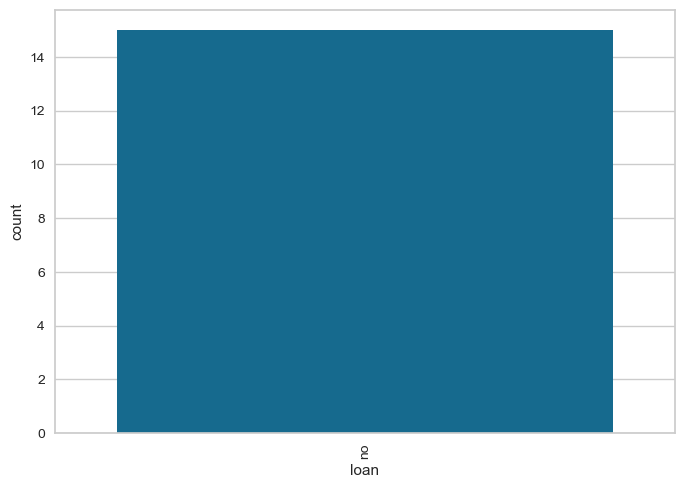

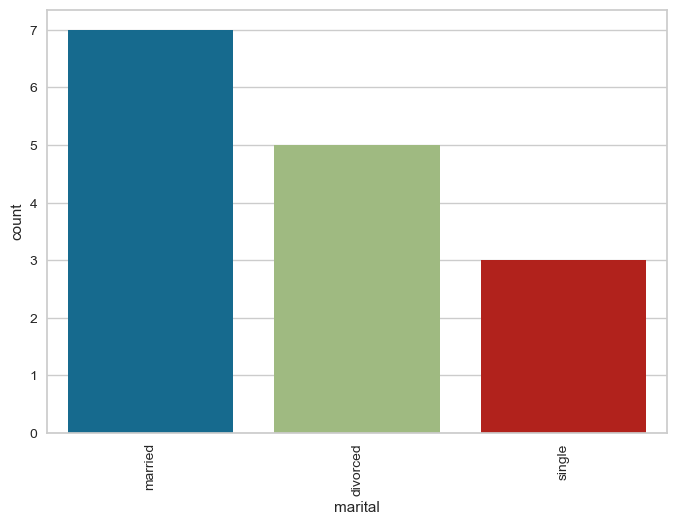

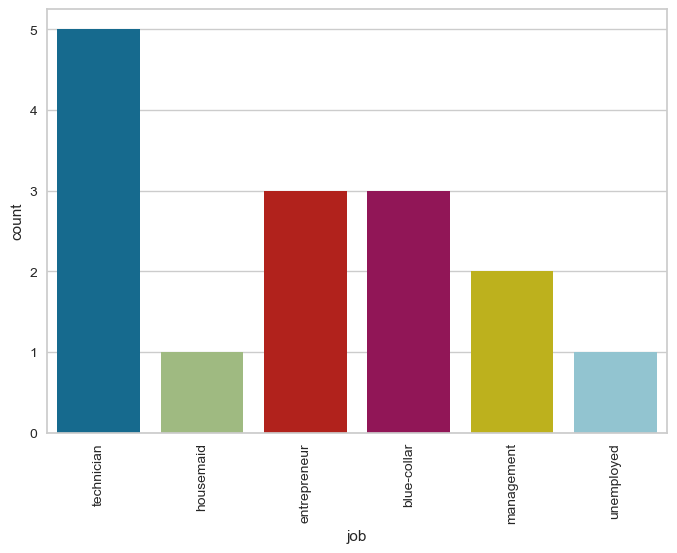

In [66]:
s=df_lab[(df_lab['kmode_opt']==2)&(df_lab['y']=='yes')]
for i in ['default','housing','loan','marital','job']:
    sns.countplot(x=s[i])
    plt.xticks(rotation=90)
    plt.show()

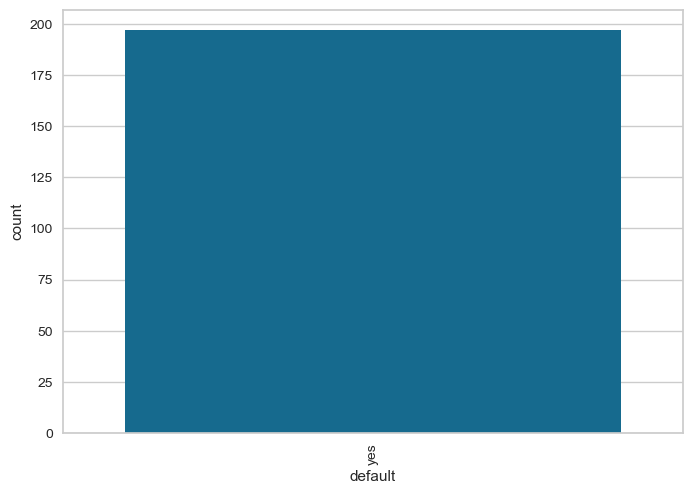

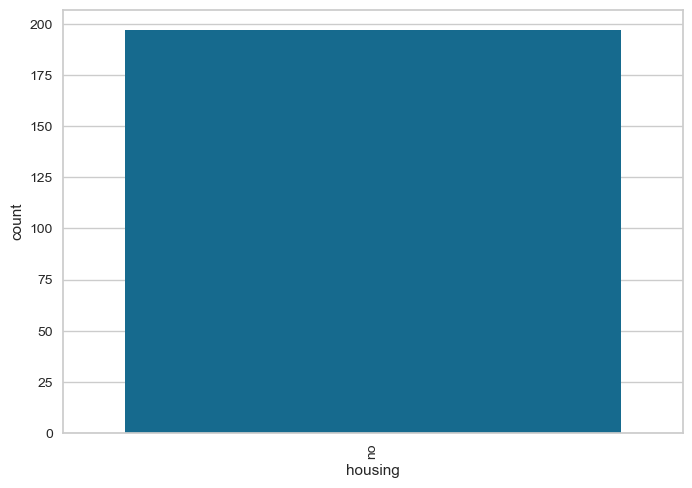

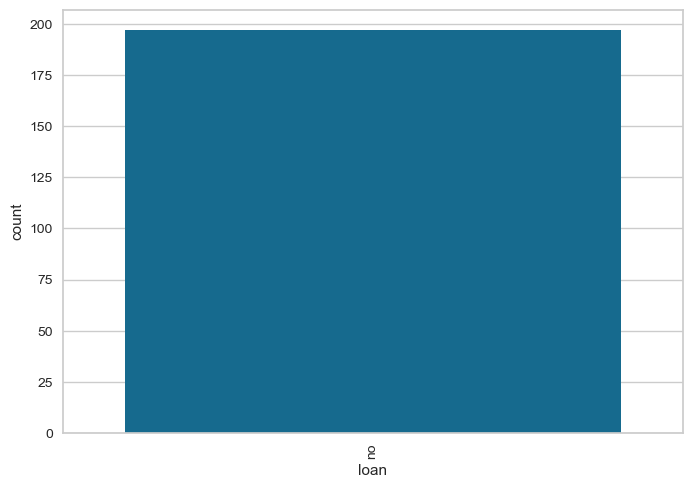

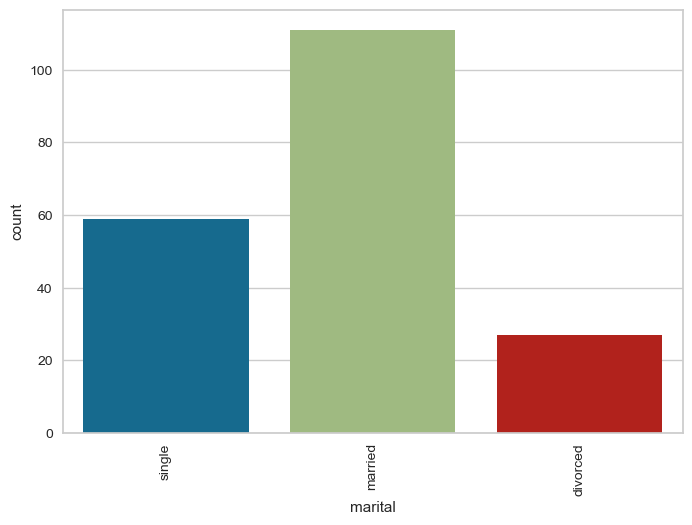

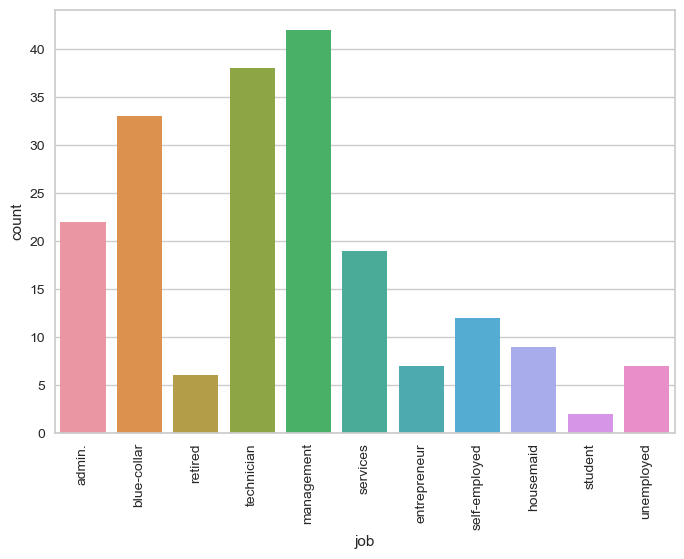

In [67]:
s=df_lab[(df_lab['kmode_opt']==2)&(df_lab['y']=='no')]
for i in ['default','housing','loan','marital','job']:
    sns.countplot(x=s[i])
    plt.xticks(rotation=90)
    plt.show()

In [68]:
df_lab[df_lab['kmode_opt']==3].describe()

age        balance           day      duration      campaign  \
count  16992.000000   16992.000000  16992.000000  16992.000000  16992.000000   
mean      43.282898    1759.504414     16.044550    258.281897      2.818032   
std       12.337683    3819.048723      8.680327    257.395063      2.977970   
min       18.000000   -1415.000000      1.000000      0.000000      1.000000   
25%       33.000000     118.000000      8.000000    103.000000      1.000000   
50%       42.000000     597.000000     17.000000    179.000000      2.000000   
75%       52.000000    1920.750000     22.000000    323.000000      3.000000   
max       95.000000  102127.000000     31.000000   3881.000000     41.000000   

              pdays      previous      kmean_ab      kmean_dc    kmean_full  \
count  16992.000000  16992.000000  16992.000000  16992.000000  16992.000000   
mean      28.145127      0.515890      0.677613      0.283898      0.120410   
std       79.363222      1.698991      0.653218      0.658536      0.325449   
min       -1.000000      0.000000      0.000000      0.000000      0.000000   
25%       -1.000000      0.000000      0.000000      0.000000      0.000000   
50%       -1.000000      0.000000      1.000000      0.000000      0.000000   
75%       -1.000000      0.000000      1.000000      0.000000      0.000000   
max      871.000000     37.000000      3.000000      2.000000      1.000000   

       kmode_opt     kmean_pca   kproto_full  
count    16992.0  16992.000000  16992.000000  
mean         3.0      0.124529      1.796787  
std          0.0      0.330194      1.082966  
min          3.0      0.000000      0.000000  
25%          3.0      0.000000      1.000000  
50%          3.0      0.000000      2.000000  
75%          3.0      0.000000      3.000000  
max          3.0      1.000000      3.000000

In [69]:
df_lab[df_lab['kmode_opt']==3].describe(include=object)

job  marital  education default housing   loan  month      y
count        16992    16992      16992   16992   16992  16992  16992  16992
unique          11        3          3       1       1      1     12      2
top     management  married  secondary      no      no     no    aug     no
freq          4189    10086       8154   16992   16992  16992   4690  13872

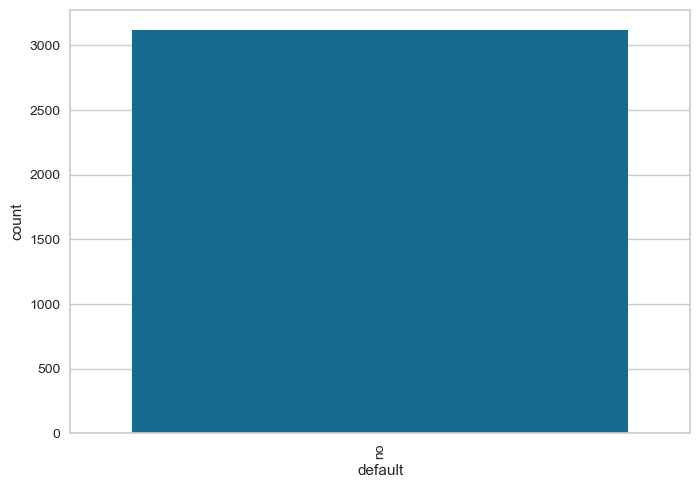

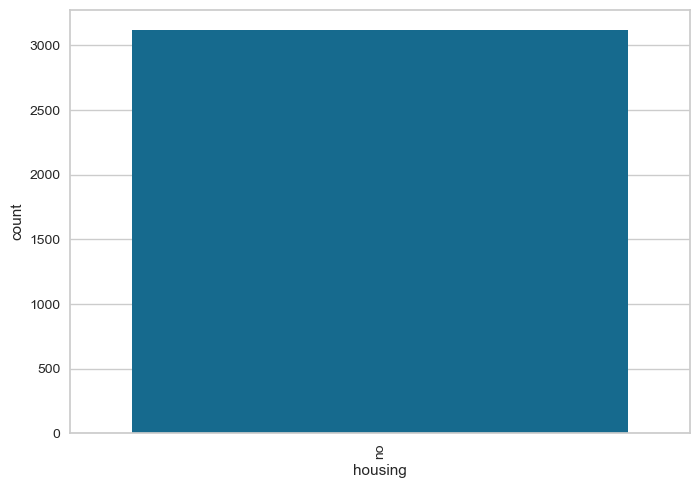

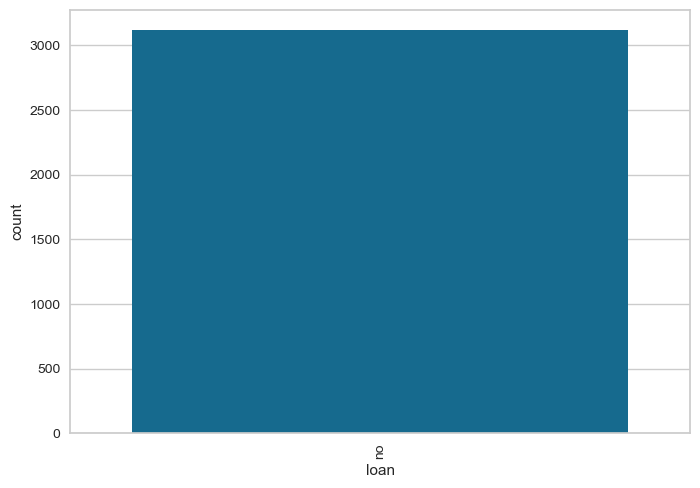

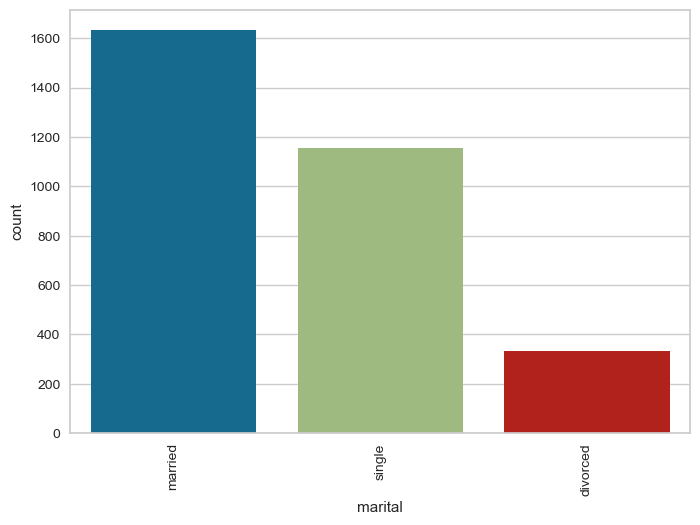

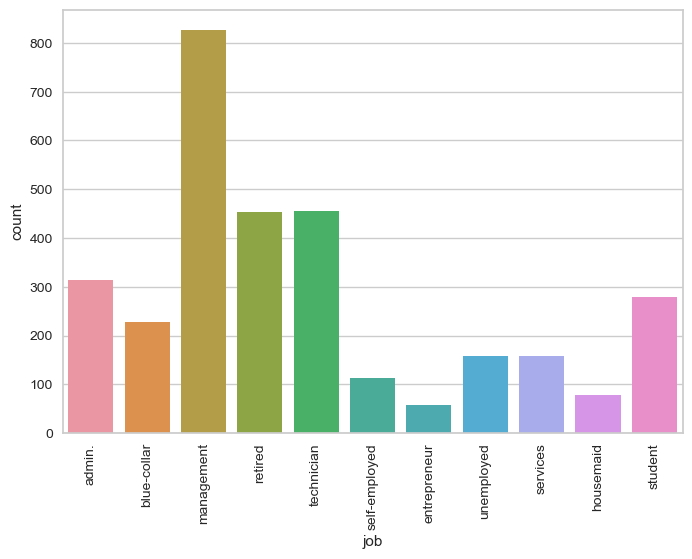

In [70]:
s=df_lab[(df_lab['kmode_opt']==3)&(df_lab['y']=='yes')]
for i in ['default','housing','loan','marital','job']:
    sns.countplot(x=s[i])
    plt.xticks(rotation=90)
    plt.show()

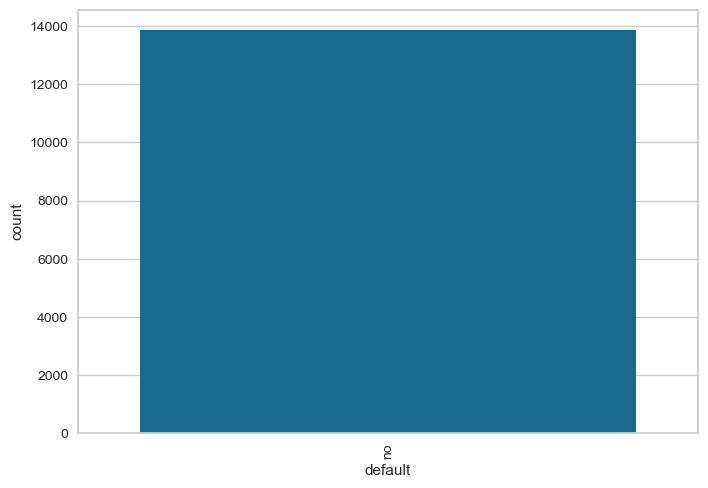

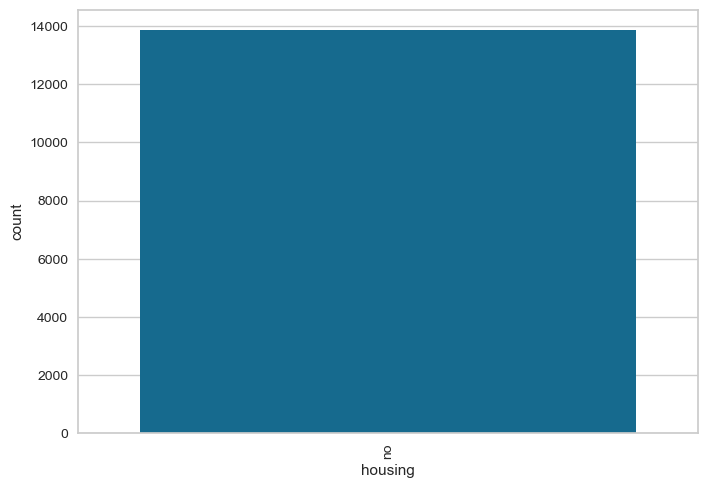

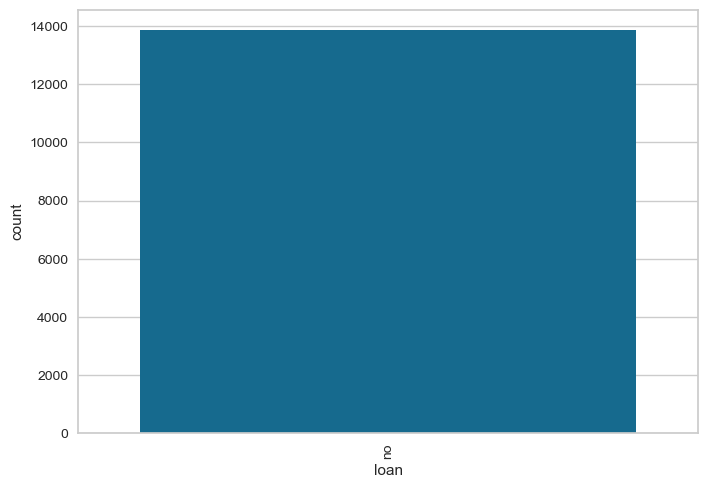

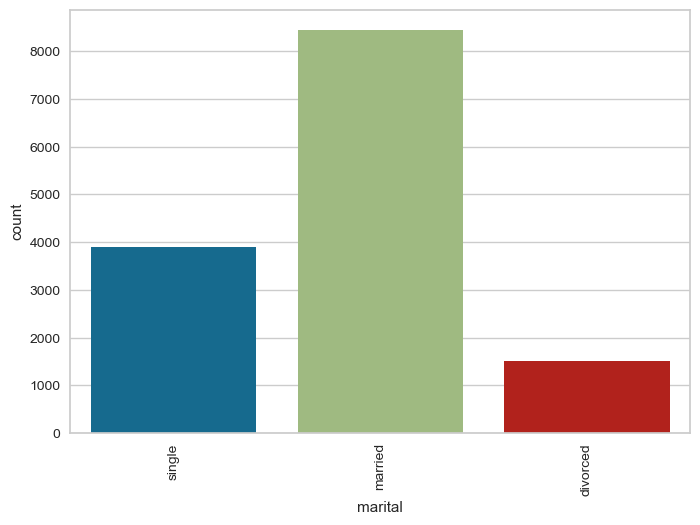

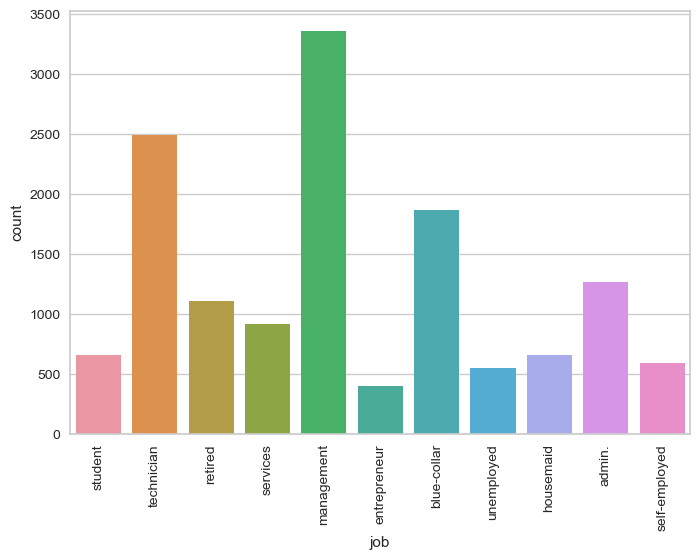

In [71]:
s=df_lab[(df_lab['kmode_opt']==3)&(df_lab['y']=='no')]
for i in ['default','housing','loan','marital','job']:
    sns.countplot(x=s[i])
    plt.xticks(rotation=90)
    plt.show()

In [72]:
df_lab[df_lab['kproto_full']==0].describe()

age       balance          day     duration     campaign  \
count  8257.000000   8257.000000  8257.000000  8257.000000  8257.000000   
mean     40.953131   1556.880102    14.289209   260.118687     2.056195   
std      11.425180   3060.593186     7.919176   235.208105     1.561169   
min      18.000000  -1884.000000     1.000000     1.000000     1.000000   
25%      33.000000    168.000000     7.000000   113.000000     1.000000   
50%      38.000000    602.000000    14.000000   193.000000     2.000000   
75%      48.000000   1743.000000    20.000000   324.000000     2.000000   
max      93.000000  81204.000000    31.000000  2219.000000    16.000000   

             pdays     previous     kmean_ab     kmean_dc   kmean_full  \
count  8257.000000  8257.000000  8257.000000  8257.000000  8257.000000   
mean    224.577692     3.177546     0.761536     0.243188     0.848008   
std     115.344035     4.560820     0.597907     0.643400     0.359035   
min       1.000000     1.000000     0.000000     0.000000     0.000000   
25%     133.000000     1.000000     0.000000     0.000000     1.000000   
50%     194.000000     2.000000     1.000000     0.000000     1.000000   
75%     327.000000     4.000000     1.000000     0.000000     1.000000   
max     871.000000   275.000000     3.000000     2.000000     1.000000   

         kmode_opt    kmean_pca  kproto_full  
count  8257.000000  8257.000000       8257.0  
mean      1.064672     0.853094          0.0  
std       1.411619     0.354033          0.0  
min       0.000000     0.000000          0.0  
25%       0.000000     1.000000          0.0  
50%       0.000000     1.000000          0.0  
75%       3.000000     1.000000          0.0  
max       3.000000     1.000000          0.0

In [73]:
df_lab[df_lab['kproto_full']==0].describe(include=object)

job  marital  education default housing  loan month     y
count         8257     8257       8257    8257    8257  8257  8257  8257
unique          11        3          3       2       2     2    12     2
top     management  married  secondary      no     yes    no   may    no
freq          1826     4745       4490    8200    5142  7134  2514  6352

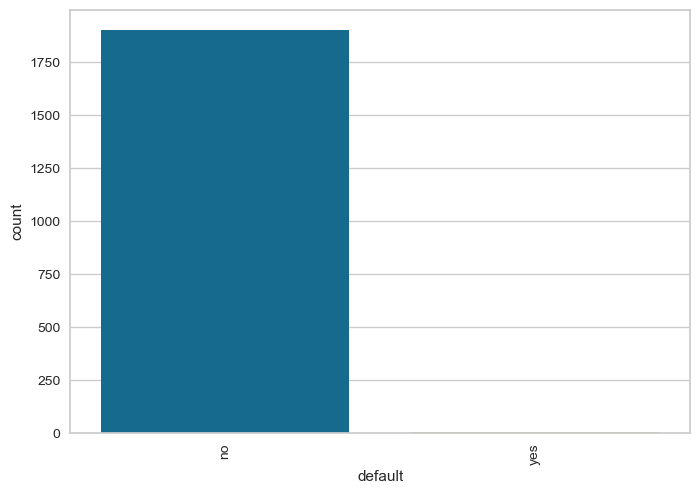

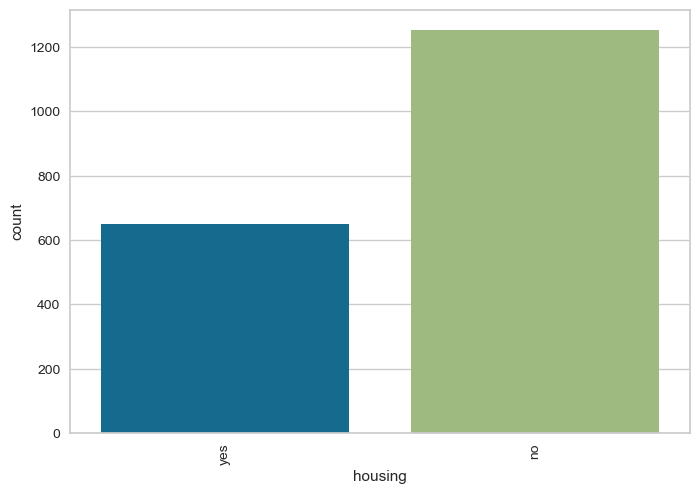

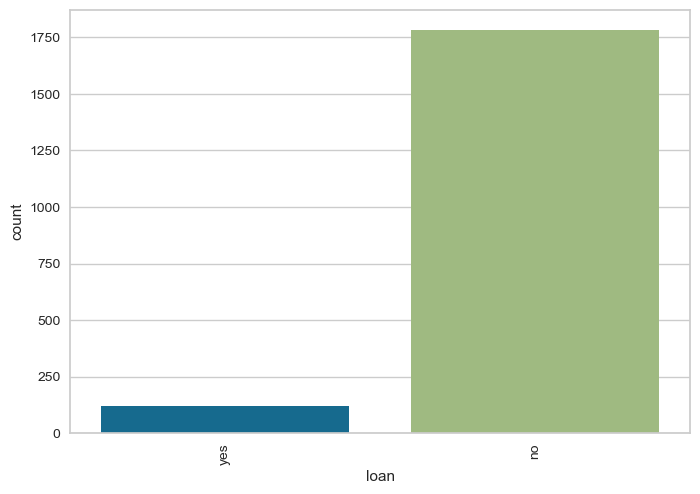

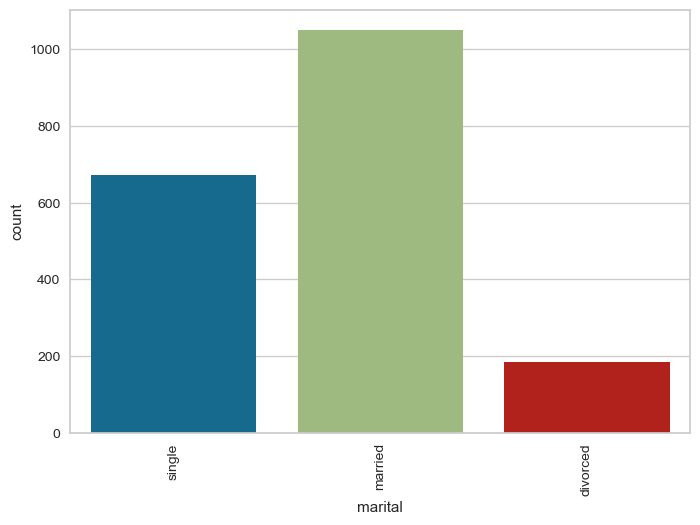

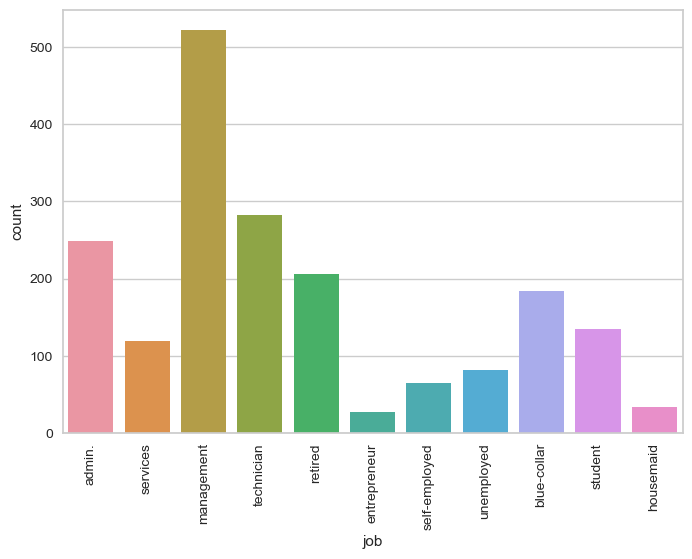

In [74]:
s=df_lab[(df_lab['kproto_full']==0)&(df_lab['y']=='yes')]
for i in ['default','housing','loan','marital','job']:
    sns.countplot(x=s[i])
    plt.xticks(rotation=90)
    plt.show()

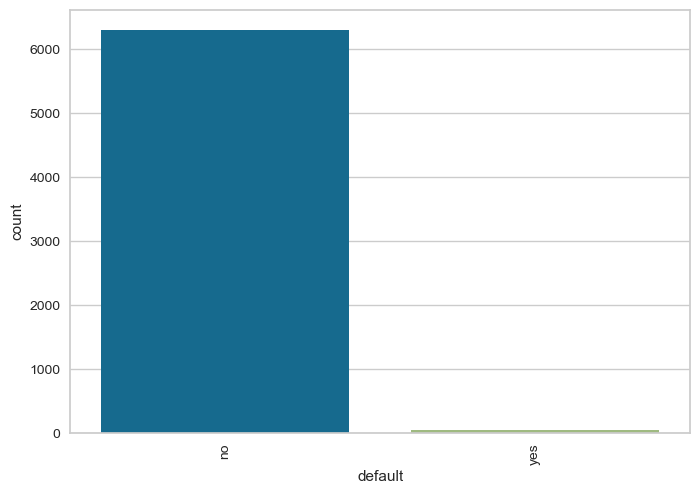

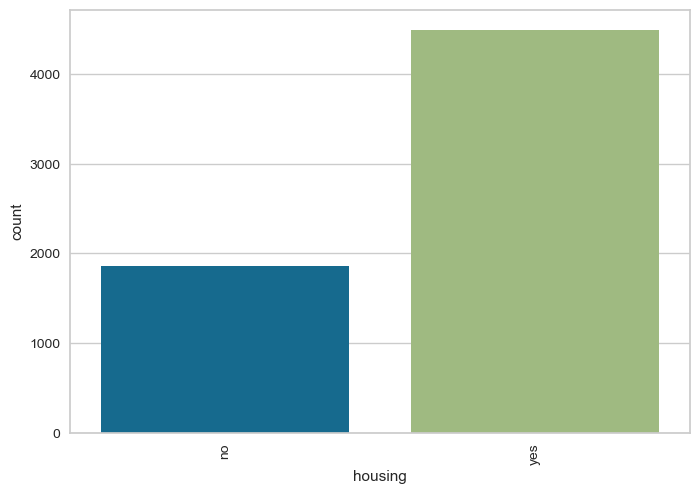

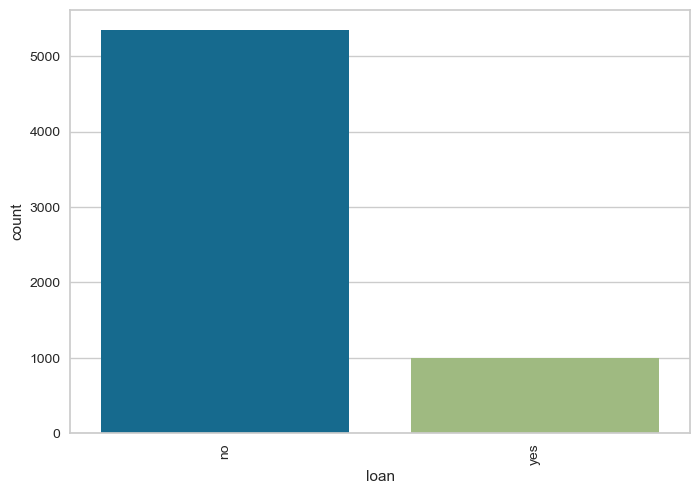

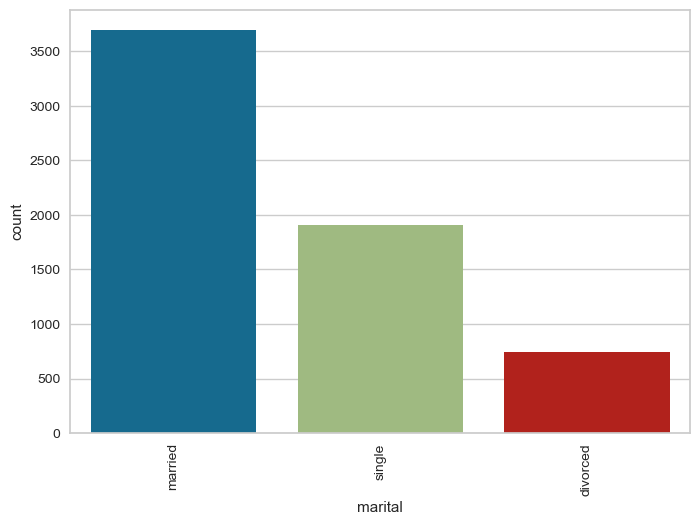

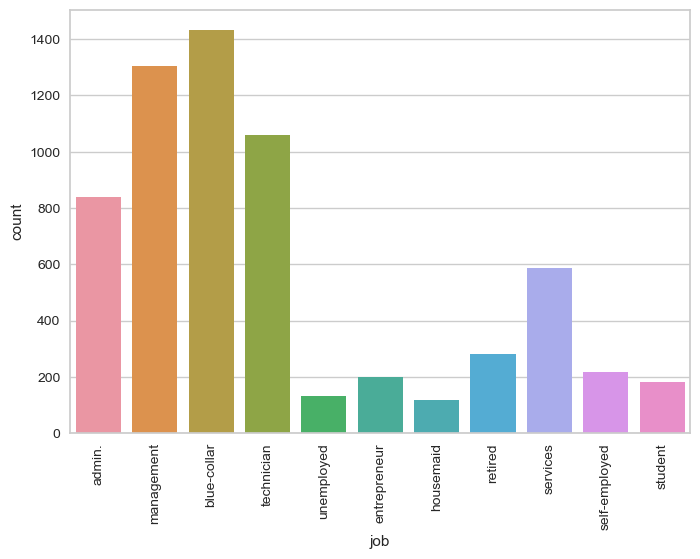

In [75]:
s=df_lab[(df_lab['kproto_full']==0)&(df_lab['y']=='no')]
for i in ['default','housing','loan','marital','job']:
    sns.countplot(x=s[i])
    plt.xticks(rotation=90)
    plt.show()

In [76]:
df_lab[df_lab['kproto_full']==1].describe()

age       balance           day      duration      campaign  \
count  12372.000000  12372.000000  12372.000000  12372.000000  12372.000000   
mean      31.427821    924.082929     15.910524    333.298497      1.892661   
std        4.362361   1888.086731      8.081600    305.418577      1.404217   
min       18.000000  -8019.000000      1.000000      4.000000      1.000000   
25%       28.000000     41.000000      9.000000    142.000000      1.000000   
50%       31.000000    335.000000     16.000000    240.000000      2.000000   
75%       34.000000   1011.000000     21.000000    411.000000      2.000000   
max       57.000000  36252.000000     31.000000   3785.000000     28.000000   

         pdays  previous      kmean_ab      kmean_dc  kmean_full  \
count  12372.0   12372.0  12372.000000  12372.000000     12372.0   
mean      -1.0       0.0      1.033705      0.376091         0.0   
std        0.0       0.0      0.211416      0.777640         0.0   
min       -1.0       0.0      0.000000      0.000000         0.0   
25%       -1.0       0.0      1.000000      0.000000         0.0   
50%       -1.0       0.0      1.000000      0.000000         0.0   
75%       -1.0       0.0      1.000000      0.000000         0.0   
max       -1.0       0.0      3.000000      2.000000         0.0   

          kmode_opt  kmean_pca  kproto_full  
count  12372.000000    12372.0      12372.0  
mean       0.923699        0.0          1.0  
std        1.339596        0.0          0.0  
min        0.000000        0.0          1.0  
25%        0.000000        0.0          1.0  
50%        0.000000        0.0          1.0  
75%        3.000000        0.0          1.0  
max        3.000000        0.0          1.0

In [77]:
df_lab[df_lab['kproto_full']==1].describe(include=object)

job marital  education default housing   loan  month      y
count         12372   12372      12372   12372   12372  12372  12372  12372
unique           11       3          3       2       2      2     12      2
top     blue-collar  single  secondary      no     yes     no    may     no
freq           2968    6589       7435   12075    8069  10253   5036  10698

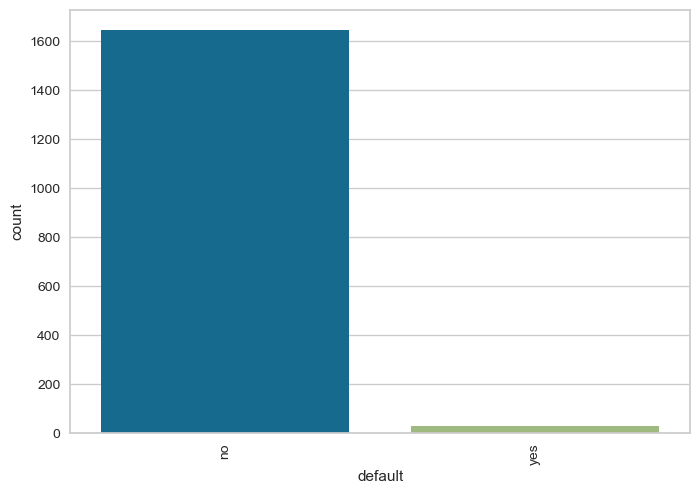

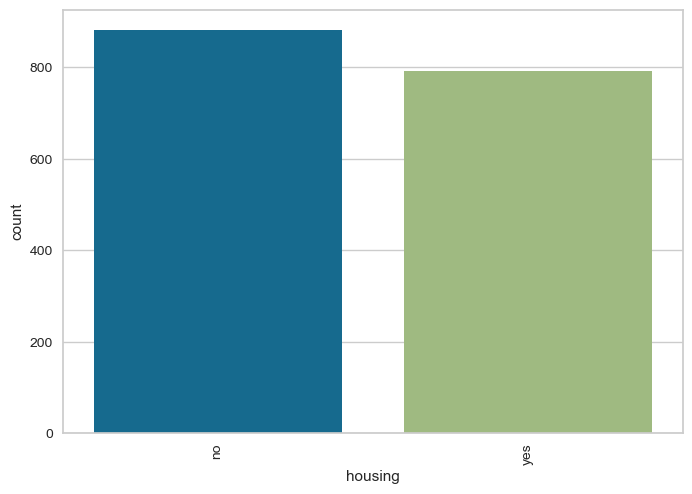

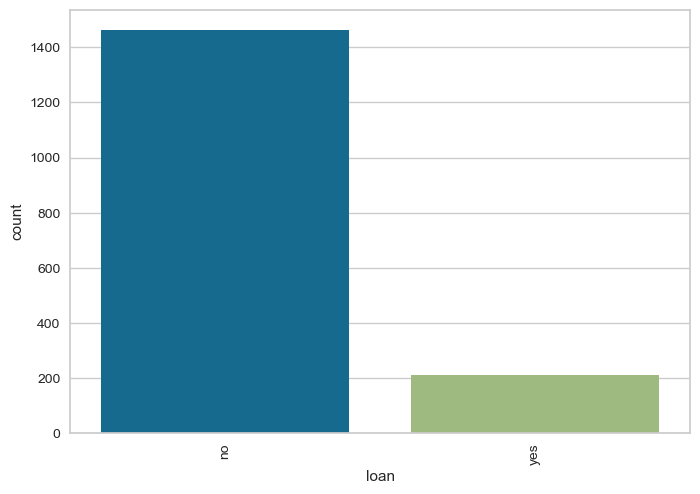

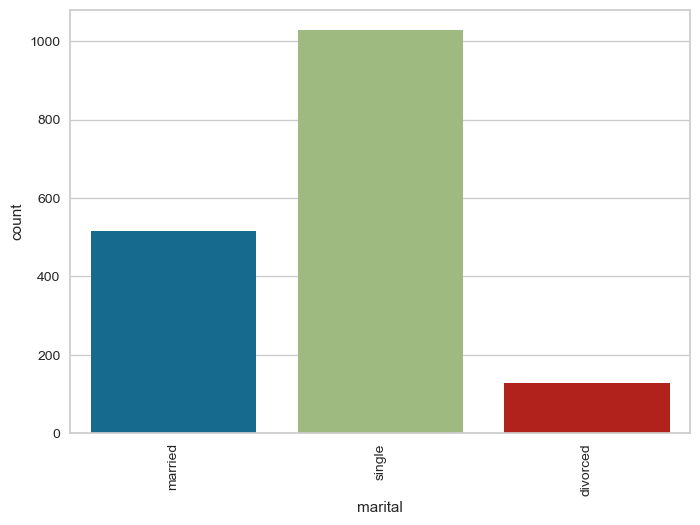

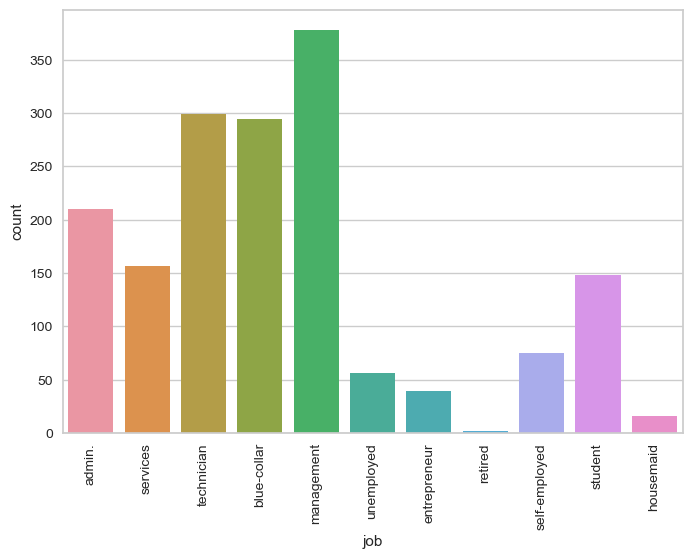

In [78]:
s=df_lab[(df_lab['kproto_full']==1)&(df_lab['y']=='yes')]
for i in ['default','housing','loan','marital','job']:
    sns.countplot(x=s[i])
    plt.xticks(rotation=90)
    plt.show()

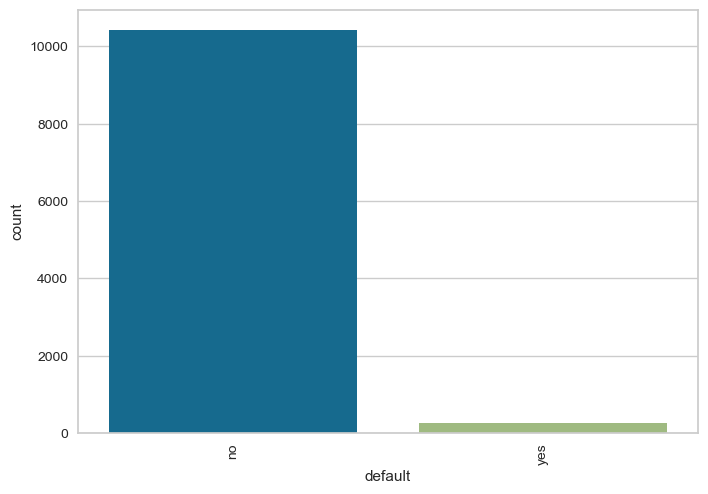

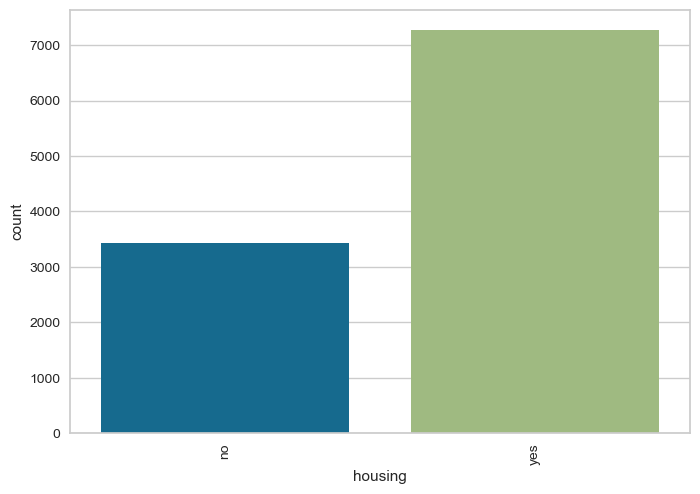

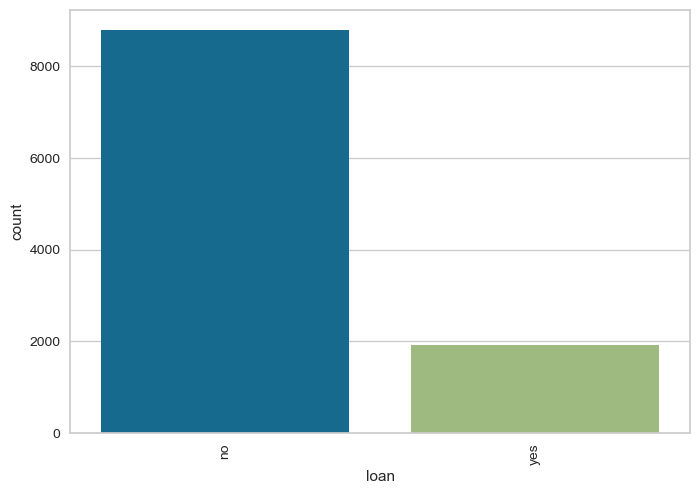

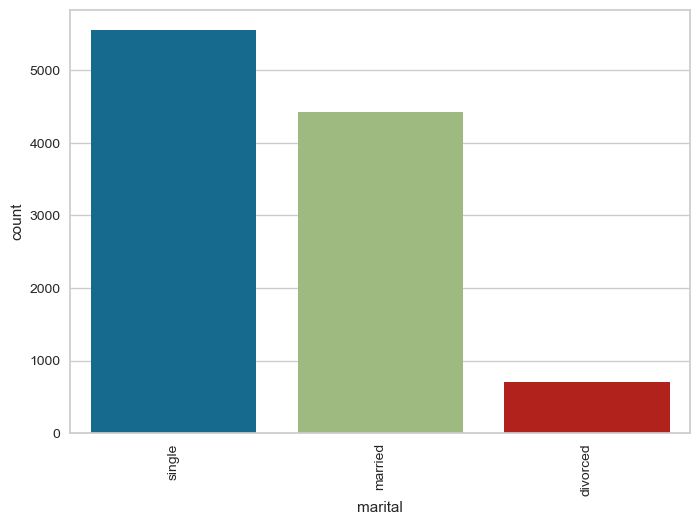

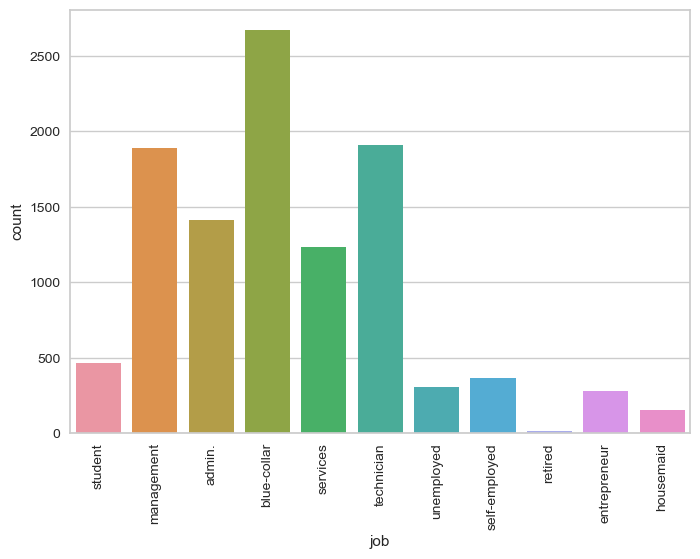

In [79]:
s=df_lab[(df_lab['kproto_full']==1)&(df_lab['y']=='no')]
for i in ['default','housing','loan','marital','job']:
    sns.countplot(x=s[i])
    plt.xticks(rotation=90)
    plt.show()

In [80]:
df_lab[df_lab['kproto_full']==2].describe()

age        balance           day      duration      campaign  \
count  12563.000000   12563.000000  12563.000000  12563.000000  12563.000000   
mean      48.316963    1852.741702     11.765820    267.680570      1.595638   
std        8.675132    4158.075841      7.201619    261.759463      0.941526   
min       26.000000   -1944.000000      1.000000      1.000000      1.000000   
25%       42.000000     109.000000      6.000000    112.000000      1.000000   
50%       47.000000     587.000000     11.000000    188.000000      1.000000   
75%       54.000000    1904.500000     17.000000    325.000000      2.000000   
max       95.000000  102127.000000     31.000000   4918.000000     13.000000   

         pdays  previous      kmean_ab      kmean_dc  kmean_full  \
count  12563.0   12563.0  12563.000000  12563.000000     12563.0   
mean      -1.0       0.0      0.496139      0.246597         0.0   
std        0.0       0.0      0.701657      0.656495         0.0   
min       -1.0       0.0      0.000000      0.000000         0.0   
25%       -1.0       0.0      0.000000      0.000000         0.0   
50%       -1.0       0.0      0.000000      0.000000         0.0   
75%       -1.0       0.0      1.000000      0.000000         0.0   
max       -1.0       0.0      3.000000      2.000000         0.0   

          kmode_opt  kmean_pca  kproto_full  
count  12563.000000    12563.0      12563.0  
mean       1.238000        0.0          2.0  
std        1.427614        0.0          0.0  
min        0.000000        0.0          2.0  
25%        0.000000        0.0          2.0  
50%        0.000000        0.0          2.0  
75%        3.000000        0.0          2.0  
max        3.000000        0.0          2.0

In [81]:
df_lab[df_lab['kproto_full']==2].describe(include=object)

job  marital  education default housing   loan  month      y
count         12563    12563      12563   12563   12563  12563  12563  12563
unique           11        3          3       2       2      2     12      2
top     blue-collar  married  secondary      no     yes     no    may     no
freq           2982     9239       6664   12379    6797  10568   3859  11306

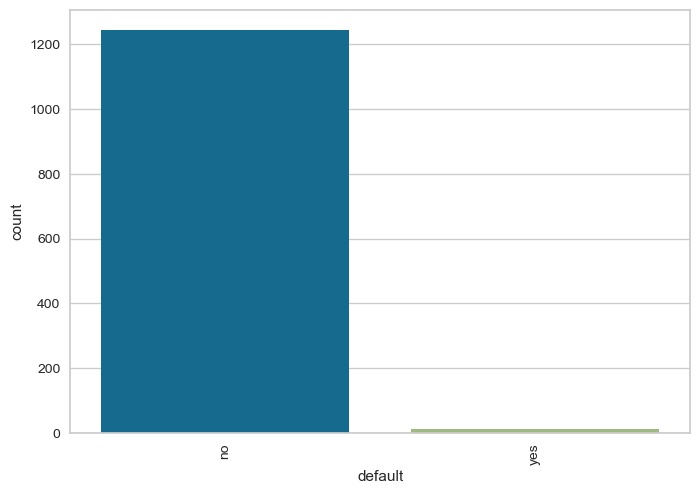

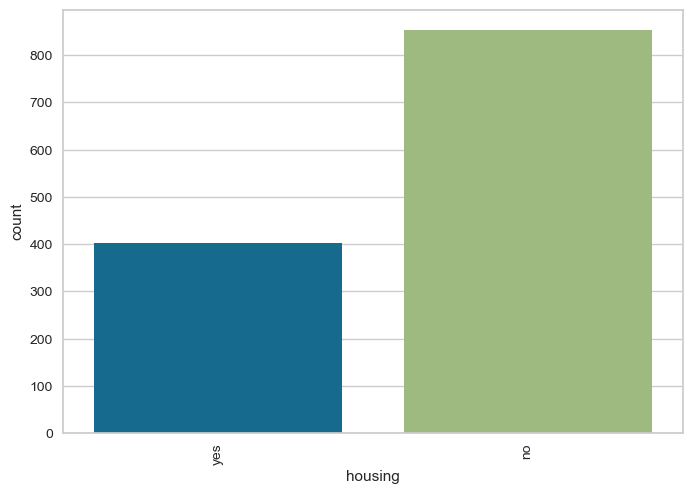

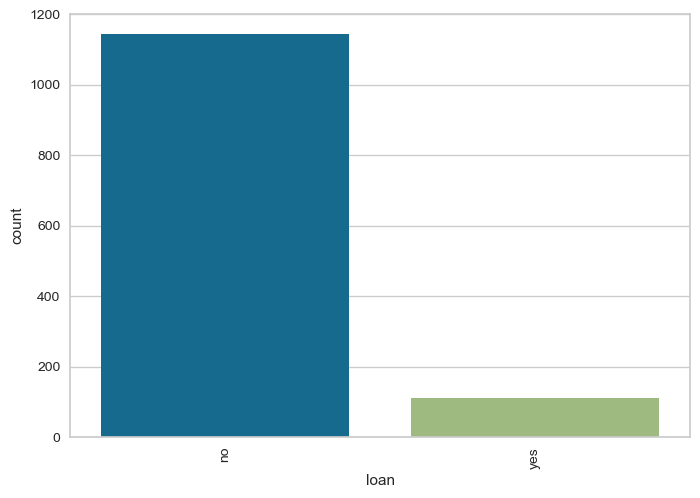

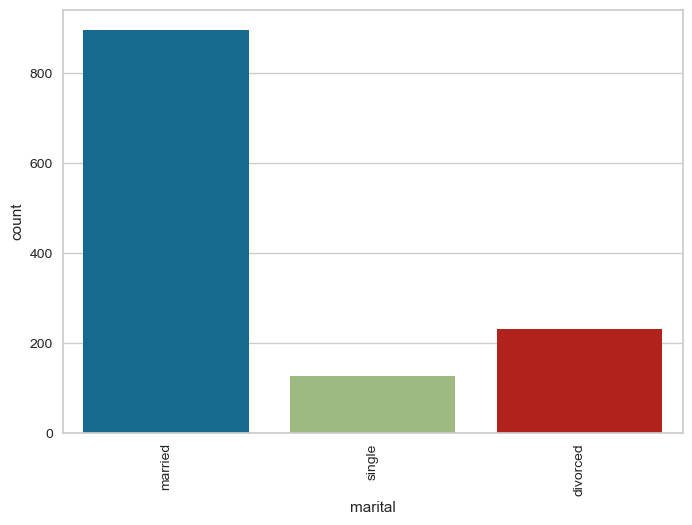

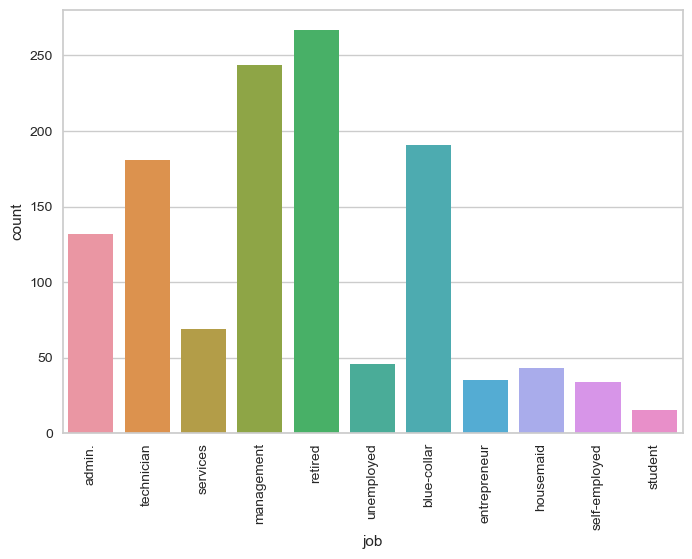

In [82]:
s=df_lab[(df_lab['kproto_full']==2)&(df_lab['y']=='yes')]
for i in ['default','housing','loan','marital','job']:
    sns.countplot(x=s[i])
    plt.xticks(rotation=90)
    plt.show()

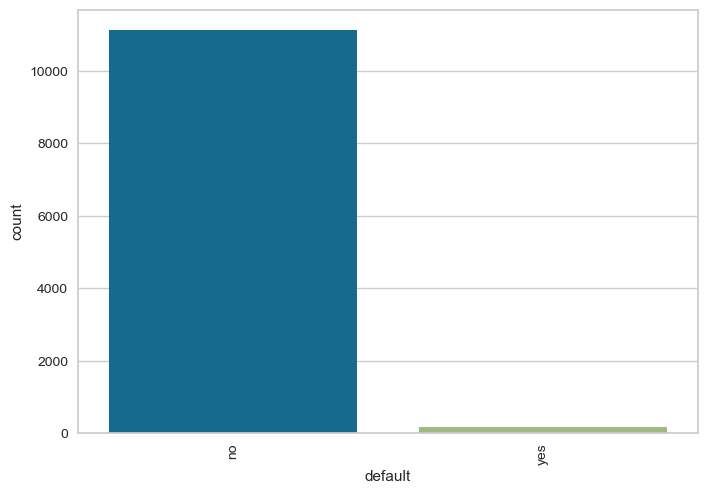

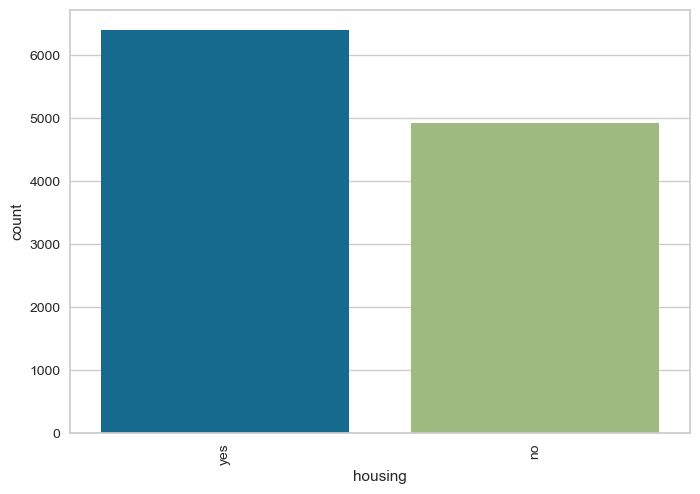

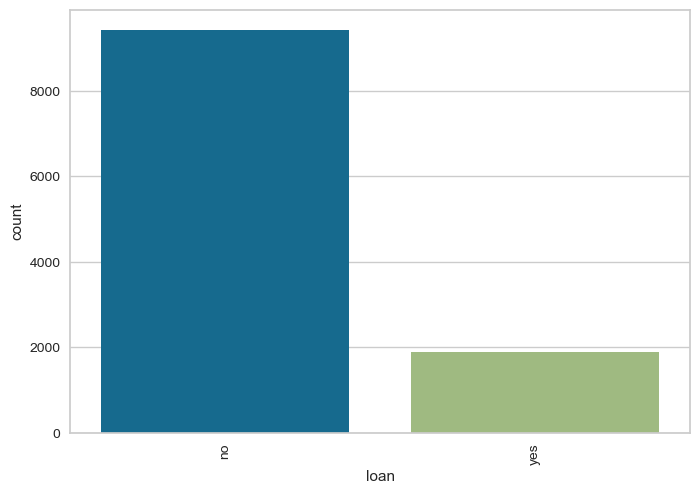

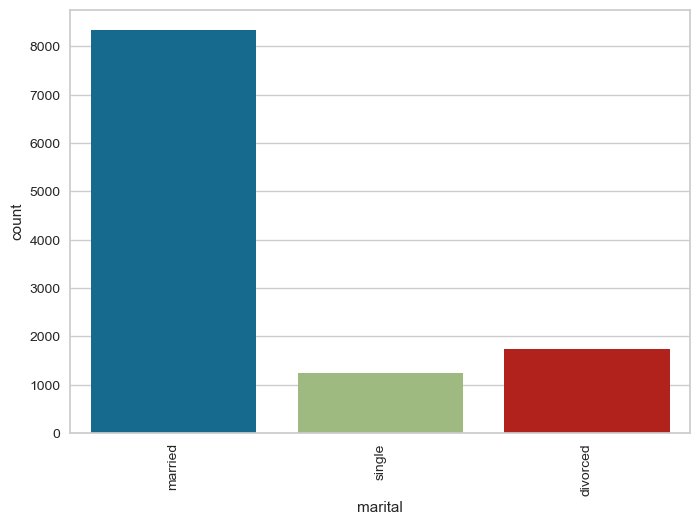

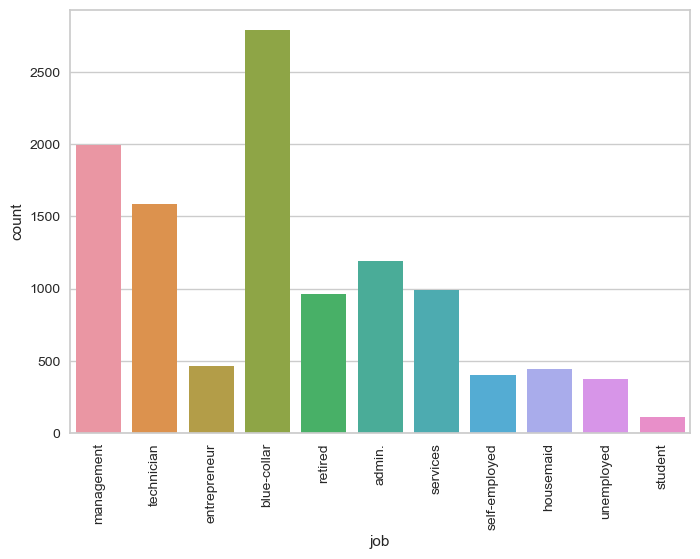

In [83]:
s=df_lab[(df_lab['kproto_full']==2)&(df_lab['y']=='no')]
for i in ['default','housing','loan','marital','job']:
    sns.countplot(x=s[i])
    plt.xticks(rotation=90)
    plt.show()

In [84]:
df_lab[df_lab['kproto_full']==3].describe()

age       balance           day      duration      campaign  \
count  12019.000000  12019.000000  12019.000000  12019.000000  12019.000000   
mean      42.997421   1166.966886     20.965055    169.529162      5.367834   
std        9.054572   2486.879157      7.124802    173.429928      4.705460   
min       20.000000  -4057.000000      1.000000      0.000000      1.000000   
25%       36.000000     31.000000     16.000000     69.000000      3.000000   
50%       42.000000    369.000000     21.000000    120.000000      4.000000   
75%       50.000000   1281.500000     28.000000    207.000000      6.000000   
max       95.000000  52527.000000     31.000000   2372.000000     63.000000   

         pdays  previous      kmean_ab      kmean_dc  kmean_full  \
count  12019.0   12019.0  12019.000000  12019.000000     12019.0   
mean      -1.0       0.0      0.633497      0.257176         0.0   
std        0.0       0.0      0.603600      0.528129         0.0   
min       -1.0       0.0      0.000000      0.000000         0.0   
25%       -1.0       0.0      0.000000      0.000000         0.0   
50%       -1.0       0.0      1.000000      0.000000         0.0   
75%       -1.0       0.0      1.000000      0.000000         0.0   
max       -1.0       0.0      3.000000      2.000000         0.0   

          kmode_opt  kmean_pca  kproto_full  
count  12019.000000    12019.0      12019.0  
mean       1.539646        0.0          3.0  
std        1.434713        0.0          0.0  
min        0.000000        0.0          3.0  
25%        0.000000        0.0          3.0  
50%        1.000000        0.0          3.0  
75%        3.000000        0.0          3.0  
max        3.000000        0.0          3.0

In [85]:
df_lab[df_lab['kproto_full']==3].describe(include=object)

job  marital  education default housing   loan  month      y
count        12019    12019      12019   12019   12019  12019  12019  12019
unique          11        3          3       2       2      2     12      2
top     management  married  secondary      no      no     no    aug     no
freq          3128     8286       6068   11742    6897  10012   3442  11566

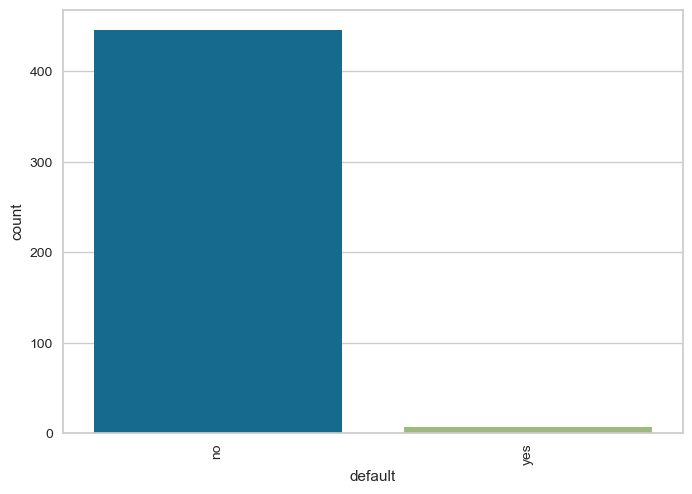

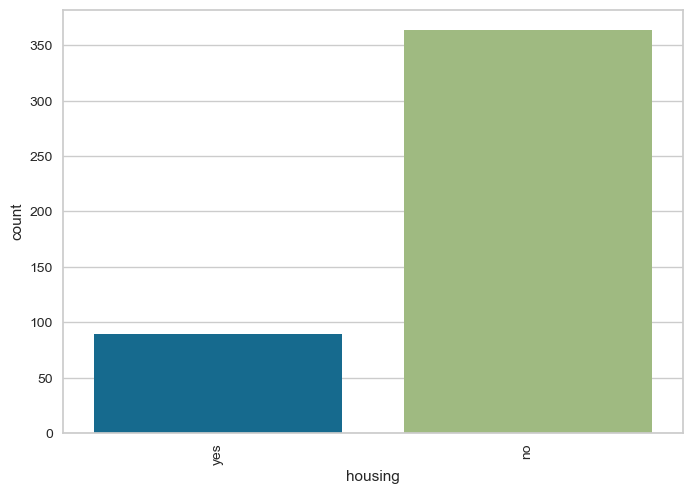

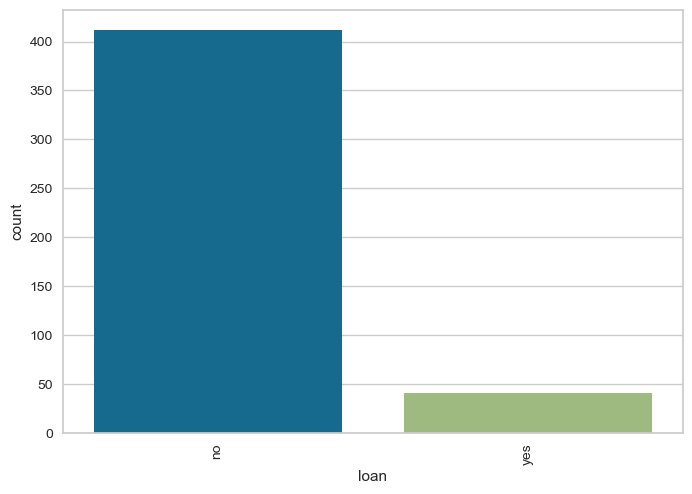

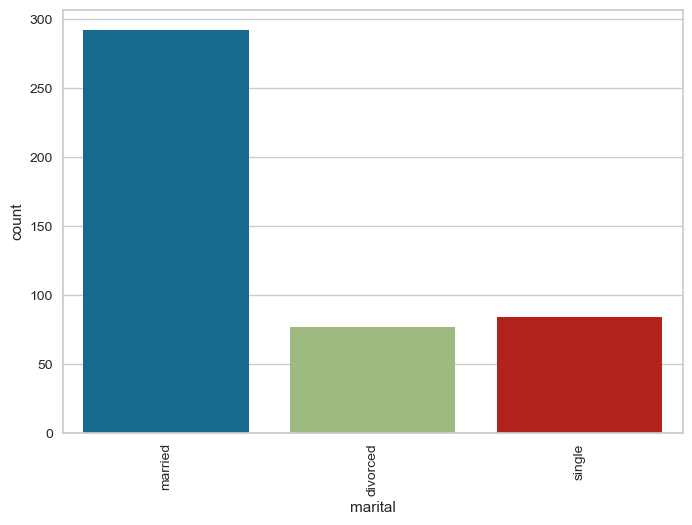

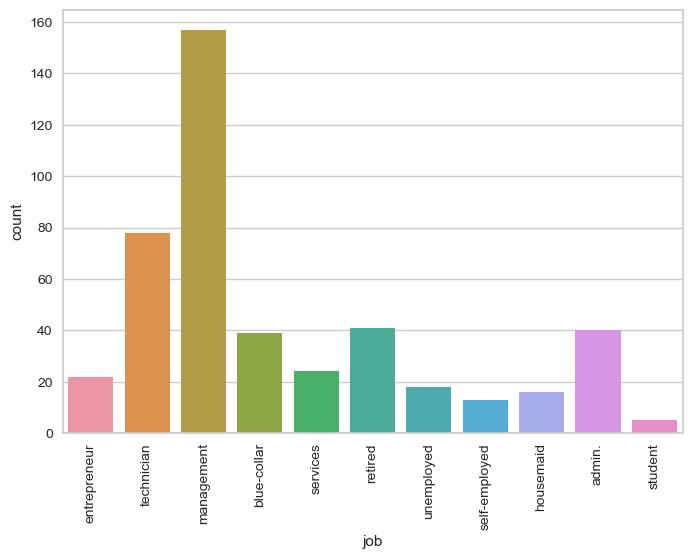

In [86]:
s=df_lab[(df_lab['kproto_full']==3)&(df_lab['y']=='yes')]
for i in ['default','housing','loan','marital','job']:
    sns.countplot(x=s[i])
    plt.xticks(rotation=90)
    plt.show()

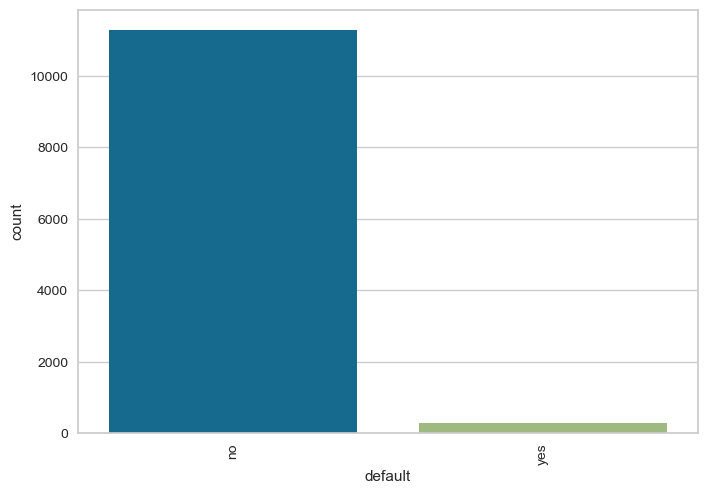

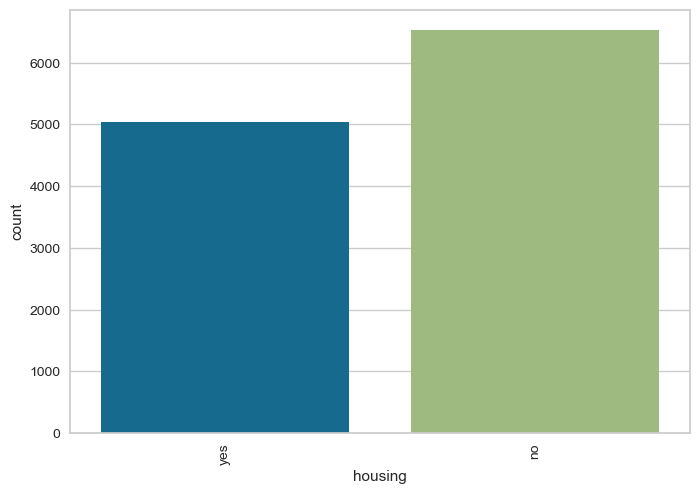

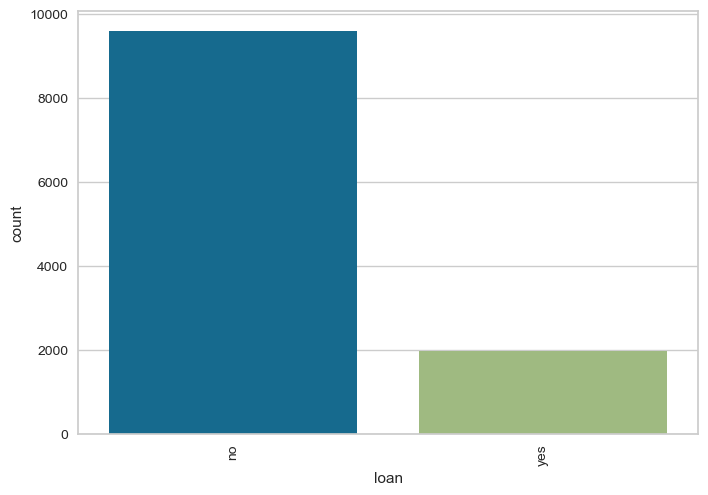

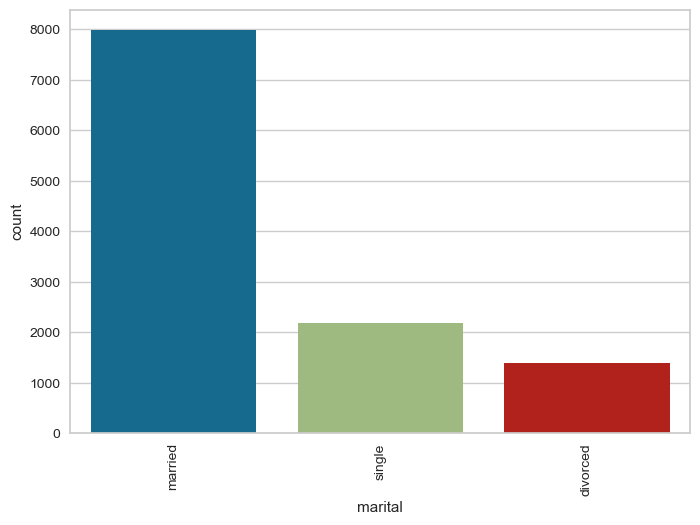

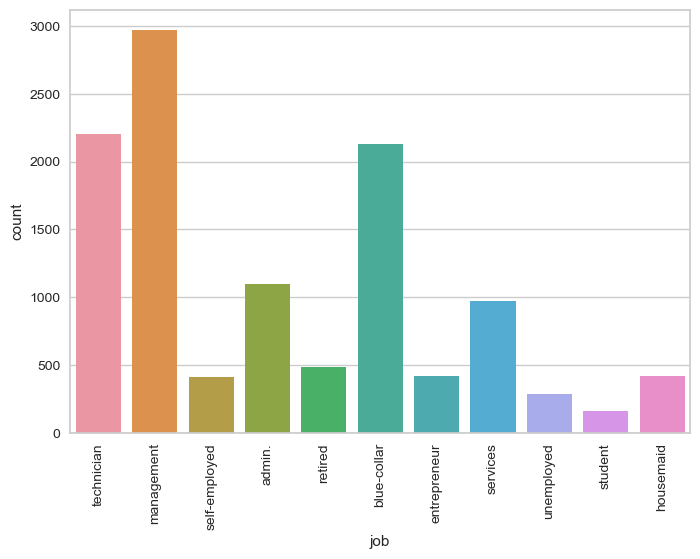

In [87]:
s=df_lab[(df_lab['kproto_full']==3)&(df_lab['y']=='no')]
for i in ['default','housing','loan','marital','job']:
    sns.countplot(x=s[i])
    plt.xticks(rotation=90)
    plt.show()